# Notebook for generating plots of trained agents

This code will load the results for the specified experiments, generate plots, and save them in the `experiments_dir` directory

In [1]:
import os
import random
import tempfile
from copy import deepcopy
from datetime import datetime

import click
import imgc_marl.envs.population as population
import numpy as np
import yaml
from imgc_marl.callbacks import (
    PopGoalLinesCallback,
    PopGoalLinesCommunicationCallback,
    PopGoalLinesNamingCallback,
    PopGoalLinesNamingCallback1Matrix,
)
from imgc_marl.evaluation import (
    communication_custom_eval_function,
    custom_eval_function,
)
from imgc_marl.models.basic_communication import BasicCommunicationNetwork
from imgc_marl.models.full_naming_game import FullNamingNetwork
from imgc_marl.models.full_naming_game_single_matrix import FullNamingNetwork1Matrix
from imgc_marl.policies.basic_communication import BasicCommunicationTrainer
from imgc_marl.policies.full_naming_game import FullNamingTrainer
from imgc_marl.policies.full_naming_game_single_matrix import FullNamingTrainer1Matrix
from imgc_marl.utils import keep_relevant_results
from ray.rllib.agents.ppo import DEFAULT_CONFIG, PPOTrainer
from ray.rllib.models import ModelCatalog
from ray.rllib.policy.policy import PolicySpec
from ray.tune.logger import UnifiedLogger, pretty_print
import torch
import matplotlib.pyplot as plt
import moviepy
import pandas as pd
import json

/home/elena/anaconda3/envs/imgc-marl/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
params = {'legend.fontsize': 6,
                  "figure.autolayout": True,
                  'font.size': 8,
                  'pdf.fonttype':42,
                  'ps.fonttype':42}
plt.rcParams.update(params)

cm = 1 / 2.54  # for converting inches to cm
fig_size = (10.48 * cm, 6 * cm)  # these dimensions chosen to fit in latex column
    

* Set the directory in which all the experiments to be plotted together are stored.
* Set the list of subdirs (experiments) you want to include in the plots

In [3]:

from imgc_marl.envs.population import PopGoalLinesEnv, PopLargeGoalLinesEnv
experiments_dir = "/media/elena/LaCie/aamas_2023/paper/insights"
list_of_experiments = ["naming_game_30msg_alpha10_temp30"]
# 3 landmarks
#config_file = "goal_lines_naming.yml"
config_file="large_goal_lines_2agents_naming_game_all_modified.yml"
environment = PopLargeGoalLinesEnv


In [4]:
with open(f"../scripts/configs/{config_file}", "r") as f:
    user_config = yaml.safe_load(f)
# General settings of the algorithm
config = deepcopy(DEFAULT_CONFIG)
config["num_workers"] = 0
config["framework"] = "torch"
use_communication = user_config.get("communication", False)

config["horizon"] = 300
config["rollout_fragment_length"] = config["horizon"]
config["env_config"] = user_config["env_config"]
config["train_batch_size"] = 60_000
config["sgd_minibatch_size"] = 10_000
config["lambda"] = 0.9
config["lr"] = 0.0003


nb_msg= 30

def policy_mapping_fn(agent_id):
    return agent_id


config["multiagent"] = {
    "policies": {
        f"agent_{i}": PolicySpec(
            policy_class=None, observation_space=None, action_space=None
        )
        for i in range(config["env_config"]["population_size"])
    },
    "policy_mapping_fn": policy_mapping_fn,
}

train_env = environment

ModelCatalog.register_custom_model("FullNamingNetwork1Matrix", FullNamingNetwork1Matrix)
number_of_goals = environment(config["env_config"]).goal_space_dim
config["model"] = {
    "custom_model": "FullNamingNetwork1Matrix",
    "custom_model_config": {
        "number_of_goals": number_of_goals,
        "train_matrix": user_config.get("train_matrix", False),
        "nb_msg":nb_msg,
    },
}
trainer = FullNamingTrainer1Matrix(
    config=config,
    env=train_env,
)


2022-10-28 20:00:11,003	WARNING deprecation.py:46 -- DeprecationWarning: `ray.rllib.agents.ppo.ppo.DEFAULT_CONFIG` has been deprecated. Use `ray.rllib.agents.ppo.ppo.PPOConfig(...)` instead. This will raise an error in the future!
2022-10-28 20:00:11,304	WARNING multi_agent_env.py:225 -- observation_space_sample() has not been implemented
2022-10-28 20:00:11,305	WARNING multi_agent_env.py:137 -- observation_space_contains() has not been implemented
2022-10-28 20:00:11,305	WARNING multi_agent_env.py:137 -- observation_space_contains() has not been implemented
2022-10-28 20:00:11,306	WARNING multi_agent_env.py:137 -- observation_space_contains() has not been implemented
2022-10-28 20:00:11,306	WARNING multi_agent_env.py:193 -- action_space_sample() has not been implemented
2022-10-28 20:00:11,306	WARNING multi_agent_env.py:161 -- action_space_contains() has not been implemented
2022-10-28 20:00:11,308	WARNING multi_agent_env.py:137 -- observation_space_contains() has not been implemented

In [5]:
from itertools import combinations

goals= np.eye(6, dtype=np.uint8).tolist()
goals += (
    np.array(list(combinations(goals, 2))).sum(1).tolist()
)
goals=np.array(goals)
#goals=goals[6:]
print(goals)



gl=0
goal=""
for b in goals[gl]:
    goal=goal+str(b)
print(goal)



for experiment in list_of_experiments:
        subdir = os.path.join(experiments_dir, experiment)
        print(subdir)
        print((os.listdir(subdir)))





[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [1 0 0 1 0 0]
 [1 0 0 0 1 0]
 [1 0 0 0 0 1]
 [0 1 1 0 0 0]
 [0 1 0 1 0 0]
 [0 1 0 0 1 0]
 [0 1 0 0 0 1]
 [0 0 1 1 0 0]
 [0 0 1 0 1 0]
 [0 0 1 0 0 1]
 [0 0 0 1 1 0]
 [0 0 0 1 0 1]
 [0 0 0 0 1 1]]
100000
/media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30
['train-448230_0.slurm.err', 'train-448230_3.slurm.out', '2022-10-26_12-23-36tnspdchd', '2022-10-26_12-23-36y1qela3f', 'train-448230_4.slurm.out', '2022-10-26_12-23-361jzdlx2z', 'train-448230_1.slurm.out', 'train-448230_1.slurm.err', 'train-448230_2.slurm.err', 'train-448230_4.slurm.err', 'train-448230_2.slurm.out', '2022-10-26_12-23-36pt_blwdm', '2022-10-26_12-23-36xdrwb902', 'train-448230_3.slurm.err', 'train-448230_0.slurm.out']


In [6]:
list_align_big=[]
results = {}
for gl in range(21):
    print("##############")
    print(gl)
    goal=""
    for b in goals[gl]:
        goal=goal+str(b)
    
    list_align=[]
    results_goal={}
    for experiment in list_of_experiments:
        subdir = os.path.join(experiments_dir, experiment)
        eval_reward = pd.DataFrame()
        train_reward = pd.DataFrame()
        episode_len = pd.DataFrame()
        alignment = pd.DataFrame()
        train_x = []
        eval_x = []
        ctr=0
        for j, experiment_name in enumerate(os.listdir(subdir)):
            list_align_expe=[]

            #print(subdir+"/"+experiment_name)
            if(os.path.isdir(subdir+"/"+experiment_name)):

                ctr+=1
                if(experiment_name=="2022-10-26_12-23-36xdrwb902" ):



                        r = []
                        r_t = []
                        l = []
                        x_ = []
                        a = []
                        y_ = []
                        result_raw = open(os.path.join(subdir, experiment_name, "result.json"), "r")

                        for result in result_raw:
                            dump = json.loads(result)

                            a.append(dump["custom_metrics"].get("goal_alignment_mean"))
                            y_.append(dump["timesteps_total"])
                            r_t.append(dump["custom_metrics"]["reward for goal "+goal+"_mean"])

                            metrics = dump.get("evaluation")

                            if metrics is not None:
                                custom = metrics.get("custom_metrics")
                                x_.append(dump["timesteps_total"])

                                r.append(custom["reward for goal "+goal+"_mean"])
                                l.append(metrics["episode_len_mean"])

                        eval_reward = pd.concat(
                            [eval_reward, pd.DataFrame(r)], ignore_index=True, axis=1
                        )
                        episode_len = pd.concat(
                            [episode_len, pd.DataFrame(l)], ignore_index=True, axis=1
                        )
                        alignment = pd.concat([alignment, pd.DataFrame(a)], ignore_index=True, axis=1)
                        train_reward = pd.concat(
                            [train_reward, pd.DataFrame(r_t)], ignore_index=True, axis=1
                        )


                        if len(x_) > len(eval_x):
                            eval_x = x_
                        if len(y_) > len(train_x):
                            train_x = y_


                        imgs = []
                        checkpoints_dir=subdir+"/"+experiment_name
                        for checkpoint_dir in sorted(os.listdir(checkpoints_dir)):
                            if os.path.isdir(os.path.join(checkpoints_dir, checkpoint_dir)):
                                checkpoint_file = sorted(
                                    os.listdir(os.path.join(checkpoints_dir, checkpoint_dir))
                                )[1]
                                print(checkpoint_file)
                                trainer.restore(os.path.join(checkpoints_dir, checkpoint_dir, checkpoint_file))
                                agent_0 = trainer.get_policy("agent_0").model
                                agent_1 = trainer.get_policy("agent_1").model
                                with torch.no_grad():
                                    agent_0_matrix = agent_0._matrix.numpy()
                                    agent_1_matrix = agent_1._matrix.numpy()

                                # compute alignement for goal
                                #0 leader
                                msg=np.argmax(agent_0_matrix[gl])
                                g2=np.argmax(agent_1_matrix[:,msg])
                                #1 leader
                                msg=np.argmax(agent_1_matrix[gl])
                                g2b=np.argmax(agent_0_matrix[:,msg])

                                if(g2==gl and g2b==gl):
                                    list_align_expe.append(1)
                                elif(g2==gl or g2b==gl):
                                    list_align_expe.append(0.5)
                                else:
                                    list_align_expe.append(0)
                        list_align.append(list_align_expe)





        

        results_goal[experiment] = {
            "eval_reward": eval_reward,
            "train_reward": train_reward,
            "episode_len": episode_len,
            "alignment": alignment,
            "train_x": train_x,
            "eval_x": eval_x,
        }
        list_align_big.append(list_align)
    results[str(gl)]=results_goal

##############
0
checkpoint-10


2022-10-28 20:00:18,496	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:00:18,497	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}


checkpoint-20


2022-10-28 20:00:19,061	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:00:19,062	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}


checkpoint-30


2022-10-28 20:00:19,305	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000030/checkpoint-30
2022-10-28 20:00:19,307	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 1714.2614316940308, '_episodes_total': 3914}


checkpoint-40


2022-10-28 20:00:19,819	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000040/checkpoint-40
2022-10-28 20:00:19,821	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 2225.5988500118256, '_episodes_total': 5496}


checkpoint-50


2022-10-28 20:00:20,161	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000050/checkpoint-50
2022-10-28 20:00:20,163	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 50, '_timesteps_total': None, '_time_total': 2695.905735731125, '_episodes_total': 7424}
2022-10-28 20:00:20,289	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000060/checkpoint-60
2022-10-28 20:00:20,291	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 60, '_timesteps_total': None, '_time_total': 3169.307232618332, '_episodes_total': 9636}


checkpoint-60
checkpoint-70


2022-10-28 20:00:20,417	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000070/checkpoint-70
2022-10-28 20:00:20,419	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 70, '_timesteps_total': None, '_time_total': 3624.6292712688446, '_episodes_total': 11805}
2022-10-28 20:00:20,557	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000080/checkpoint-80
2022-10-28 20:00:20,560	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 80, '_timesteps_total': None, '_time_total': 4074.4181802272797, '_episodes_total': 14450}


checkpoint-80
checkpoint-90


2022-10-28 20:00:20,737	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-28 20:00:20,738	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-28 20:00:20,901	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-28 20:00:20,903	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}


checkpoint-100
checkpoint-110


2022-10-28 20:00:21,016	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000110/checkpoint-110
2022-10-28 20:00:21,021	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 110, '_timesteps_total': None, '_time_total': 5375.544846773148, '_episodes_total': 25291}
2022-10-28 20:00:21,176	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000120/checkpoint-120
2022-10-28 20:00:21,177	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 120, '_timesteps_total': None, '_time_total': 5810.747559547424, '_episodes_total': 30629}


checkpoint-120
checkpoint-130


2022-10-28 20:00:21,309	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000130/checkpoint-130
2022-10-28 20:00:21,312	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 130, '_timesteps_total': None, '_time_total': 6233.476268529892, '_episodes_total': 35920}
2022-10-28 20:00:21,451	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000140/checkpoint-140
2022-10-28 20:00:21,454	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 140, '_timesteps_total': None, '_time_total': 6666.722411155701, '_episodes_total': 41402}


checkpoint-140
checkpoint-150


2022-10-28 20:00:21,590	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000150/checkpoint-150
2022-10-28 20:00:21,592	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 150, '_timesteps_total': None, '_time_total': 7116.494745492935, '_episodes_total': 48485}
2022-10-28 20:00:21,701	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000160/checkpoint-160
2022-10-28 20:00:21,702	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 160, '_timesteps_total': None, '_time_total': 7565.359086990356, '_episodes_total': 56573}


checkpoint-160
checkpoint-170


2022-10-28 20:00:21,838	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000170/checkpoint-170
2022-10-28 20:00:21,839	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 170, '_timesteps_total': None, '_time_total': 8015.448036432266, '_episodes_total': 64936}
2022-10-28 20:00:21,963	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-28 20:00:21,963	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}


checkpoint-180
checkpoint-190


2022-10-28 20:00:22,082	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-28 20:00:22,083	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-28 20:00:22,270	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000200/checkpoint-200
2022-10-28 20:00:22,273	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 9341.24713420868, '_episodes_total': 90172}


checkpoint-200
checkpoint-210


2022-10-28 20:00:22,444	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000210/checkpoint-210
2022-10-28 20:00:22,447	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 210, '_timesteps_total': None, '_time_total': 9790.189731121063, '_episodes_total': 99127}
2022-10-28 20:00:22,591	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000220/checkpoint-220
2022-10-28 20:00:22,592	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 220, '_timesteps_total': None, '_time_total': 10231.838762044907, '_episodes_total': 107962}


checkpoint-220
checkpoint-230


2022-10-28 20:00:22,720	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000230/checkpoint-230
2022-10-28 20:00:22,722	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 230, '_timesteps_total': None, '_time_total': 10661.717410087585, '_episodes_total': 117099}
2022-10-28 20:00:22,903	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000240/checkpoint-240
2022-10-28 20:00:22,904	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 240, '_timesteps_total': None, '_time_total': 11093.056695699692, '_episodes_total': 126169}


checkpoint-240
checkpoint-250


2022-10-28 20:00:23,048	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000250/checkpoint-250
2022-10-28 20:00:23,049	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 250, '_timesteps_total': None, '_time_total': 11520.40463757515, '_episodes_total': 135292}
2022-10-28 20:00:23,200	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000260/checkpoint-260
2022-10-28 20:00:23,201	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 260, '_timesteps_total': None, '_time_total': 11950.342010498047, '_episodes_total': 144725}


checkpoint-260
checkpoint-270


2022-10-28 20:00:23,344	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-28 20:00:23,344	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-28 20:00:23,459	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-28 20:00:23,461	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_episodes_total': 163833}


checkpoint-280
checkpoint-290


2022-10-28 20:00:23,648	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000290/checkpoint-290
2022-10-28 20:00:23,649	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 290, '_timesteps_total': None, '_time_total': 13251.09267783165, '_episodes_total': 173575}
2022-10-28 20:00:23,795	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000300/checkpoint-300
2022-10-28 20:00:23,795	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 300, '_timesteps_total': None, '_time_total': 13681.847102165222, '_episodes_total': 183179}


checkpoint-300
checkpoint-310


2022-10-28 20:00:23,944	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000310/checkpoint-310
2022-10-28 20:00:23,946	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 310, '_timesteps_total': None, '_time_total': 14115.795295715332, '_episodes_total': 193002}
2022-10-28 20:00:24,079	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000320/checkpoint-320
2022-10-28 20:00:24,081	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 320, '_timesteps_total': None, '_time_total': 14545.808118104935, '_episodes_total': 202902}


checkpoint-320
checkpoint-330


2022-10-28 20:00:24,252	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000330/checkpoint-330
2022-10-28 20:00:24,253	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 330, '_timesteps_total': None, '_time_total': 14975.122828722, '_episodes_total': 212661}
2022-10-28 20:00:24,430	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000340/checkpoint-340
2022-10-28 20:00:24,432	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 340, '_timesteps_total': None, '_time_total': 15414.43281674385, '_episodes_total': 222248}


checkpoint-340
checkpoint-350


2022-10-28 20:00:24,626	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-28 20:00:24,627	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_episodes_total': 231839}
2022-10-28 20:00:24,807	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000360/checkpoint-360
2022-10-28 20:00:24,808	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 360, '_timesteps_total': None, '_time_total': 16316.89421749115, '_episodes_total': 241466}


checkpoint-360
checkpoint-370


2022-10-28 20:00:24,945	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000370/checkpoint-370
2022-10-28 20:00:24,947	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 370, '_timesteps_total': None, '_time_total': 16771.63481783867, '_episodes_total': 251164}
2022-10-28 20:00:25,131	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000380/checkpoint-380
2022-10-28 20:00:25,132	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 380, '_timesteps_total': None, '_time_total': 17230.681396961212, '_episodes_total': 260924}


checkpoint-380
checkpoint-390


2022-10-28 20:00:25,296	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000390/checkpoint-390
2022-10-28 20:00:25,298	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 390, '_timesteps_total': None, '_time_total': 17689.469063282013, '_episodes_total': 270838}
2022-10-28 20:00:25,431	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000400/checkpoint-400
2022-10-28 20:00:25,432	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 400, '_timesteps_total': None, '_time_total': 18144.13463950157, '_episodes_total': 280886}


checkpoint-400
checkpoint-410


2022-10-28 20:00:25,581	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000410/checkpoint-410
2022-10-28 20:00:25,584	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 410, '_timesteps_total': None, '_time_total': 18599.36267066002, '_episodes_total': 290596}
2022-10-28 20:00:25,719	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000420/checkpoint-420
2022-10-28 20:00:25,719	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 420, '_timesteps_total': None, '_time_total': 19056.196438074112, '_episodes_total': 300300}


checkpoint-420
checkpoint-430


2022-10-28 20:00:25,915	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000430/checkpoint-430
2022-10-28 20:00:25,916	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 430, '_timesteps_total': None, '_time_total': 19516.149500846863, '_episodes_total': 310112}
2022-10-28 20:00:26,083	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000440/checkpoint-440
2022-10-28 20:00:26,084	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_episodes_total': 319913}


checkpoint-440
checkpoint-450


2022-10-28 20:00:26,229	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-28 20:00:26,231	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}
2022-10-28 20:00:26,346	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000460/checkpoint-460
2022-10-28 20:00:26,347	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 460, '_timesteps_total': None, '_time_total': 20884.589118003845, '_episodes_total': 339699}


checkpoint-460
checkpoint-470


2022-10-28 20:00:26,485	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000470/checkpoint-470
2022-10-28 20:00:26,488	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 470, '_timesteps_total': None, '_time_total': 21358.719168663025, '_episodes_total': 351636}
2022-10-28 20:00:26,614	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000480/checkpoint-480
2022-10-28 20:00:26,614	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 480, '_timesteps_total': None, '_time_total': 21840.230192422867, '_episodes_total': 364067}


checkpoint-480
checkpoint-490


2022-10-28 20:00:26,782	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000490/checkpoint-490
2022-10-28 20:00:26,784	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 490, '_timesteps_total': None, '_time_total': 22320.792739391327, '_episodes_total': 376491}
2022-10-28 20:00:26,953	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000500/checkpoint-500
2022-10-28 20:00:26,954	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 500, '_timesteps_total': None, '_time_total': 22798.7103805542, '_episodes_total': 389121}


checkpoint-500
checkpoint-510


2022-10-28 20:00:27,113	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000510/checkpoint-510
2022-10-28 20:00:27,115	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 510, '_timesteps_total': None, '_time_total': 23275.845554113388, '_episodes_total': 401687}
2022-10-28 20:00:27,254	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000520/checkpoint-520
2022-10-28 20:00:27,255	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 520, '_timesteps_total': None, '_time_total': 23759.25702905655, '_episodes_total': 414335}


checkpoint-520
checkpoint-530


2022-10-28 20:00:27,444	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000530/checkpoint-530
2022-10-28 20:00:27,445	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 530, '_timesteps_total': None, '_time_total': 24241.154473543167, '_episodes_total': 426900}
2022-10-28 20:00:27,604	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000540/checkpoint-540
2022-10-28 20:00:27,606	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 540, '_timesteps_total': None, '_time_total': 24722.03997540474, '_episodes_total': 439557}


checkpoint-540
checkpoint-550


2022-10-28 20:00:27,773	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000550/checkpoint-550
2022-10-28 20:00:27,775	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 550, '_timesteps_total': None, '_time_total': 25205.393687963486, '_episodes_total': 452335}
2022-10-28 20:00:27,924	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000560/checkpoint-560
2022-10-28 20:00:27,925	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 560, '_timesteps_total': None, '_time_total': 25689.266727924347, '_episodes_total': 465165}


checkpoint-560
checkpoint-570


2022-10-28 20:00:28,101	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000570/checkpoint-570
2022-10-28 20:00:28,104	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 570, '_timesteps_total': None, '_time_total': 26174.13937520981, '_episodes_total': 478172}
2022-10-28 20:00:28,258	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000580/checkpoint-580
2022-10-28 20:00:28,258	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 580, '_timesteps_total': None, '_time_total': 26660.479135751724, '_episodes_total': 491370}


checkpoint-580
checkpoint-590


2022-10-28 20:00:28,386	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000590/checkpoint-590
2022-10-28 20:00:28,390	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 590, '_timesteps_total': None, '_time_total': 27142.082161426544, '_episodes_total': 503938}
2022-10-28 20:00:28,548	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000600/checkpoint-600
2022-10-28 20:00:28,549	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 600, '_timesteps_total': None, '_time_total': 27626.241879463196, '_episodes_total': 516702}


checkpoint-600
checkpoint-610


2022-10-28 20:00:28,710	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000610/checkpoint-610
2022-10-28 20:00:28,713	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 610, '_timesteps_total': None, '_time_total': 28109.178033828735, '_episodes_total': 529690}
2022-10-28 20:00:28,867	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000620/checkpoint-620
2022-10-28 20:00:28,867	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 620, '_timesteps_total': None, '_time_total': 28588.40437078476, '_episodes_total': 542216}


checkpoint-620
checkpoint-630


2022-10-28 20:00:28,992	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000630/checkpoint-630
2022-10-28 20:00:28,994	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 630, '_timesteps_total': None, '_time_total': 29070.06625175476, '_episodes_total': 554945}
2022-10-28 20:00:29,148	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000640/checkpoint-640
2022-10-28 20:00:29,151	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 640, '_timesteps_total': None, '_time_total': 29555.123955011368, '_episodes_total': 567906}


checkpoint-640
checkpoint-650


2022-10-28 20:00:29,311	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000650/checkpoint-650
2022-10-28 20:00:29,312	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 650, '_timesteps_total': None, '_time_total': 30039.74010848999, '_episodes_total': 580856}
2022-10-28 20:00:29,473	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000660/checkpoint-660
2022-10-28 20:00:29,474	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 660, '_timesteps_total': None, '_time_total': 30523.806118011475, '_episodes_total': 593526}


checkpoint-660
checkpoint-670


2022-10-28 20:00:29,659	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000670/checkpoint-670
2022-10-28 20:00:29,660	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 670, '_timesteps_total': None, '_time_total': 31007.92929172516, '_episodes_total': 606388}
2022-10-28 20:00:29,794	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000680/checkpoint-680
2022-10-28 20:00:29,796	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 680, '_timesteps_total': None, '_time_total': 31488.564970254898, '_episodes_total': 619034}


checkpoint-680
checkpoint-690


2022-10-28 20:00:29,956	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000690/checkpoint-690
2022-10-28 20:00:29,959	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 690, '_timesteps_total': None, '_time_total': 31972.780712127686, '_episodes_total': 631953}
2022-10-28 20:00:30,128	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000700/checkpoint-700
2022-10-28 20:00:30,129	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 700, '_timesteps_total': None, '_time_total': 32455.189427375793, '_episodes_total': 644950}


checkpoint-700
checkpoint-710


2022-10-28 20:00:30,285	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000710/checkpoint-710
2022-10-28 20:00:30,286	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 710, '_timesteps_total': None, '_time_total': 32940.19856715202, '_episodes_total': 657737}
2022-10-28 20:00:30,460	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000720/checkpoint-720
2022-10-28 20:00:30,461	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 720, '_timesteps_total': None, '_time_total': 33422.85766577721, '_episodes_total': 670731}


checkpoint-720
checkpoint-730


2022-10-28 20:00:30,601	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000730/checkpoint-730
2022-10-28 20:00:30,603	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 730, '_timesteps_total': None, '_time_total': 33906.309943675995, '_episodes_total': 683607}
2022-10-28 20:00:30,750	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000740/checkpoint-740
2022-10-28 20:00:30,751	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 740, '_timesteps_total': None, '_time_total': 34388.71226859093, '_episodes_total': 696530}


checkpoint-740
checkpoint-750


2022-10-28 20:00:30,918	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000750/checkpoint-750
2022-10-28 20:00:30,919	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 750, '_timesteps_total': None, '_time_total': 34872.4340569973, '_episodes_total': 709501}
2022-10-28 20:00:31,070	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000760/checkpoint-760
2022-10-28 20:00:31,070	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 760, '_timesteps_total': None, '_time_total': 35357.40018606186, '_episodes_total': 722658}


checkpoint-760
checkpoint-770


2022-10-28 20:00:31,234	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000770/checkpoint-770
2022-10-28 20:00:31,235	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 770, '_timesteps_total': None, '_time_total': 35840.535315036774, '_episodes_total': 735677}
2022-10-28 20:00:31,370	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000780/checkpoint-780
2022-10-28 20:00:31,375	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 780, '_timesteps_total': None, '_time_total': 36322.463002204895, '_episodes_total': 748566}


checkpoint-780
checkpoint-790


2022-10-28 20:00:31,560	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000790/checkpoint-790
2022-10-28 20:00:31,563	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 790, '_timesteps_total': None, '_time_total': 36805.00196814537, '_episodes_total': 761325}
2022-10-28 20:00:31,735	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000800/checkpoint-800
2022-10-28 20:00:31,736	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 800, '_timesteps_total': None, '_time_total': 37286.339324474335, '_episodes_total': 774137}


checkpoint-800
checkpoint-810


2022-10-28 20:00:31,864	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000810/checkpoint-810
2022-10-28 20:00:31,865	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 810, '_timesteps_total': None, '_time_total': 37770.629980802536, '_episodes_total': 787014}
2022-10-28 20:00:32,016	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000820/checkpoint-820
2022-10-28 20:00:32,016	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 820, '_timesteps_total': None, '_time_total': 38252.02303314209, '_episodes_total': 799715}


checkpoint-820
checkpoint-830


2022-10-28 20:00:32,138	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000830/checkpoint-830
2022-10-28 20:00:32,139	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 830, '_timesteps_total': None, '_time_total': 38733.23220062256, '_episodes_total': 812448}
2022-10-28 20:00:32,285	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000840/checkpoint-840
2022-10-28 20:00:32,287	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 840, '_timesteps_total': None, '_time_total': 39213.190016031265, '_episodes_total': 825159}


checkpoint-840
checkpoint-850


2022-10-28 20:00:32,472	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000850/checkpoint-850
2022-10-28 20:00:32,474	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 850, '_timesteps_total': None, '_time_total': 39695.0671210289, '_episodes_total': 837962}
2022-10-28 20:00:32,622	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000860/checkpoint-860
2022-10-28 20:00:32,625	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 860, '_timesteps_total': None, '_time_total': 40178.64378118515, '_episodes_total': 850743}


checkpoint-860
checkpoint-870


2022-10-28 20:00:32,805	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000870/checkpoint-870
2022-10-28 20:00:32,808	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 870, '_timesteps_total': None, '_time_total': 40657.50393986702, '_episodes_total': 863282}
2022-10-28 20:00:32,952	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000880/checkpoint-880
2022-10-28 20:00:32,953	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 880, '_timesteps_total': None, '_time_total': 41139.941808223724, '_episodes_total': 876156}


checkpoint-880
checkpoint-890


2022-10-28 20:00:33,110	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000890/checkpoint-890
2022-10-28 20:00:33,113	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 890, '_timesteps_total': None, '_time_total': 41623.053601026535, '_episodes_total': 889160}
2022-10-28 20:00:33,267	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000900/checkpoint-900
2022-10-28 20:00:33,268	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 900, '_timesteps_total': None, '_time_total': 42101.415840148926, '_episodes_total': 901733}


checkpoint-900
checkpoint-910


2022-10-28 20:00:33,418	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000910/checkpoint-910
2022-10-28 20:00:33,420	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 910, '_timesteps_total': None, '_time_total': 42575.94420003891, '_episodes_total': 914051}
2022-10-28 20:00:33,589	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000920/checkpoint-920
2022-10-28 20:00:33,590	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 920, '_timesteps_total': None, '_time_total': 43054.28740811348, '_episodes_total': 926614}


checkpoint-920
checkpoint-930


2022-10-28 20:00:33,769	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000930/checkpoint-930
2022-10-28 20:00:33,771	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 930, '_timesteps_total': None, '_time_total': 43535.3245677948, '_episodes_total': 939106}
2022-10-28 20:00:33,897	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000940/checkpoint-940
2022-10-28 20:00:33,898	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 940, '_timesteps_total': None, '_time_total': 44003.95981049538, '_episodes_total': 951239}


checkpoint-940
checkpoint-950


2022-10-28 20:00:34,047	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000950/checkpoint-950
2022-10-28 20:00:34,048	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 950, '_timesteps_total': None, '_time_total': 44476.495874881744, '_episodes_total': 963530}
2022-10-28 20:00:34,186	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000960/checkpoint-960
2022-10-28 20:00:34,187	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 960, '_timesteps_total': None, '_time_total': 44952.10176420212, '_episodes_total': 975960}


checkpoint-960
checkpoint-970


2022-10-28 20:00:34,355	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000970/checkpoint-970
2022-10-28 20:00:34,357	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 970, '_timesteps_total': None, '_time_total': 45428.95184922218, '_episodes_total': 988356}
2022-10-28 20:00:34,530	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000980/checkpoint-980
2022-10-28 20:00:34,533	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 980, '_timesteps_total': None, '_time_total': 45903.46217417717, '_episodes_total': 1000807}


checkpoint-980
checkpoint-990


2022-10-28 20:00:34,689	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000990/checkpoint-990
2022-10-28 20:00:34,690	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 990, '_timesteps_total': None, '_time_total': 46376.458451509476, '_episodes_total': 1013018}
2022-10-28 20:00:34,841	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_001000/checkpoint-1000
2022-10-28 20:00:34,841	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 1000, '_timesteps_total': None, '_time_total': 46849.9216094017, '_episodes_total': 1025411}


checkpoint-1000
##############
1


2022-10-28 20:00:37,854	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:00:37,854	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}


checkpoint-10
checkpoint-20


2022-10-28 20:00:37,983	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:00:37,986	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-28 20:00:38,156	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000030/checkpoint-30
2022-10-28 20:00:38,157	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 1714.2614316940308, '_episodes_total': 3914}


checkpoint-30
checkpoint-40


2022-10-28 20:00:38,335	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000040/checkpoint-40
2022-10-28 20:00:38,337	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 2225.5988500118256, '_episodes_total': 5496}
2022-10-28 20:00:38,488	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000050/checkpoint-50
2022-10-28 20:00:38,490	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 50, '_timesteps_total': None, '_time_total': 2695.905735731125, '_episodes_total': 7424}


checkpoint-50
checkpoint-60


2022-10-28 20:00:38,619	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000060/checkpoint-60
2022-10-28 20:00:38,621	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 60, '_timesteps_total': None, '_time_total': 3169.307232618332, '_episodes_total': 9636}
2022-10-28 20:00:38,769	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000070/checkpoint-70
2022-10-28 20:00:38,772	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 70, '_timesteps_total': None, '_time_total': 3624.6292712688446, '_episodes_total': 11805}


checkpoint-70
checkpoint-80


2022-10-28 20:00:38,905	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000080/checkpoint-80
2022-10-28 20:00:38,908	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 80, '_timesteps_total': None, '_time_total': 4074.4181802272797, '_episodes_total': 14450}
2022-10-28 20:00:39,079	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-28 20:00:39,080	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}


checkpoint-90
checkpoint-100


2022-10-28 20:00:39,242	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-28 20:00:39,245	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-28 20:00:39,389	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000110/checkpoint-110
2022-10-28 20:00:39,390	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 110, '_timesteps_total': None, '_time_total': 5375.544846773148, '_episodes_total': 25291}


checkpoint-110
checkpoint-120


2022-10-28 20:00:39,545	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000120/checkpoint-120
2022-10-28 20:00:39,546	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 120, '_timesteps_total': None, '_time_total': 5810.747559547424, '_episodes_total': 30629}
2022-10-28 20:00:39,689	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000130/checkpoint-130
2022-10-28 20:00:39,691	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 130, '_timesteps_total': None, '_time_total': 6233.476268529892, '_episodes_total': 35920}


checkpoint-130
checkpoint-140


2022-10-28 20:00:39,806	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000140/checkpoint-140
2022-10-28 20:00:39,807	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 140, '_timesteps_total': None, '_time_total': 6666.722411155701, '_episodes_total': 41402}
2022-10-28 20:00:39,926	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000150/checkpoint-150
2022-10-28 20:00:39,926	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 150, '_timesteps_total': None, '_time_total': 7116.494745492935, '_episodes_total': 48485}


checkpoint-150
checkpoint-160


2022-10-28 20:00:40,055	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000160/checkpoint-160
2022-10-28 20:00:40,058	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 160, '_timesteps_total': None, '_time_total': 7565.359086990356, '_episodes_total': 56573}
2022-10-28 20:00:40,186	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000170/checkpoint-170
2022-10-28 20:00:40,188	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 170, '_timesteps_total': None, '_time_total': 8015.448036432266, '_episodes_total': 64936}
2022-10-28 20:00:40,223	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-170
checkpoint-180
checkpoint-190


2022-10-28 20:00:40,274	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-28 20:00:40,275	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-28 20:00:40,315	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000200/checkpoint-200
2022-10-28 20:00:40,316	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 9341.24713420868, '_episodes_total': 90172}
2022-10-28 20:00:40,348	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp

checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250


2022-10-28 20:00:40,518	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000250/checkpoint-250
2022-10-28 20:00:40,519	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 250, '_timesteps_total': None, '_time_total': 11520.40463757515, '_episodes_total': 135292}
2022-10-28 20:00:40,569	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000260/checkpoint-260
2022-10-28 20:00:40,571	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 260, '_timesteps_total': None, '_time_total': 11950.342010498047, '_episodes_total': 144725}
2022-10-28 20:00:40,606	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-260
checkpoint-270
checkpoint-280
checkpoint-290
checkpoint-300


2022-10-28 20:00:40,748	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000300/checkpoint-300
2022-10-28 20:00:40,751	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 300, '_timesteps_total': None, '_time_total': 13681.847102165222, '_episodes_total': 183179}
2022-10-28 20:00:40,779	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000310/checkpoint-310
2022-10-28 20:00:40,784	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 310, '_timesteps_total': None, '_time_total': 14115.795295715332, '_episodes_total': 193002}
2022-10-28 20:00:40,815	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350


2022-10-28 20:00:40,956	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-28 20:00:40,957	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_episodes_total': 231839}
2022-10-28 20:00:41,002	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000360/checkpoint-360
2022-10-28 20:00:41,003	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 360, '_timesteps_total': None, '_time_total': 16316.89421749115, '_episodes_total': 241466}
2022-10-28 20:00:41,038	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400


2022-10-28 20:00:41,161	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000400/checkpoint-400
2022-10-28 20:00:41,162	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 400, '_timesteps_total': None, '_time_total': 18144.13463950157, '_episodes_total': 280886}
2022-10-28 20:00:41,215	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000410/checkpoint-410
2022-10-28 20:00:41,218	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 410, '_timesteps_total': None, '_time_total': 18599.36267066002, '_episodes_total': 290596}
2022-10-28 20:00:41,256	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440
checkpoint-450


2022-10-28 20:00:41,379	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-28 20:00:41,382	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}
2022-10-28 20:00:41,421	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000460/checkpoint-460
2022-10-28 20:00:41,423	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 460, '_timesteps_total': None, '_time_total': 20884.589118003845, '_episodes_total': 339699}
2022-10-28 20:00:41,465	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500


2022-10-28 20:00:41,614	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000500/checkpoint-500
2022-10-28 20:00:41,617	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 500, '_timesteps_total': None, '_time_total': 22798.7103805542, '_episodes_total': 389121}
2022-10-28 20:00:41,664	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000510/checkpoint-510
2022-10-28 20:00:41,666	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 510, '_timesteps_total': None, '_time_total': 23275.845554113388, '_episodes_total': 401687}
2022-10-28 20:00:41,709	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-510
checkpoint-520
checkpoint-530
checkpoint-540
checkpoint-550


2022-10-28 20:00:41,836	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000550/checkpoint-550
2022-10-28 20:00:41,837	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 550, '_timesteps_total': None, '_time_total': 25205.393687963486, '_episodes_total': 452335}
2022-10-28 20:00:41,875	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000560/checkpoint-560
2022-10-28 20:00:41,881	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 560, '_timesteps_total': None, '_time_total': 25689.266727924347, '_episodes_total': 465165}
2022-10-28 20:00:41,930	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-560
checkpoint-570
checkpoint-580
checkpoint-590
checkpoint-600
checkpoint-610


2022-10-28 20:00:42,081	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000610/checkpoint-610
2022-10-28 20:00:42,084	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 610, '_timesteps_total': None, '_time_total': 28109.178033828735, '_episodes_total': 529690}
2022-10-28 20:00:42,119	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000620/checkpoint-620
2022-10-28 20:00:42,123	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 620, '_timesteps_total': None, '_time_total': 28588.40437078476, '_episodes_total': 542216}
2022-10-28 20:00:42,153	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-620
checkpoint-630
checkpoint-640
checkpoint-650
checkpoint-660
checkpoint-670


2022-10-28 20:00:42,325	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000670/checkpoint-670
2022-10-28 20:00:42,326	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 670, '_timesteps_total': None, '_time_total': 31007.92929172516, '_episodes_total': 606388}
2022-10-28 20:00:42,367	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000680/checkpoint-680
2022-10-28 20:00:42,371	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 680, '_timesteps_total': None, '_time_total': 31488.564970254898, '_episodes_total': 619034}
2022-10-28 20:00:42,410	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-680
checkpoint-690
checkpoint-700
checkpoint-710
checkpoint-720


2022-10-28 20:00:42,535	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000720/checkpoint-720
2022-10-28 20:00:42,537	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 720, '_timesteps_total': None, '_time_total': 33422.85766577721, '_episodes_total': 670731}
2022-10-28 20:00:42,571	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000730/checkpoint-730
2022-10-28 20:00:42,572	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 730, '_timesteps_total': None, '_time_total': 33906.309943675995, '_episodes_total': 683607}
2022-10-28 20:00:42,618	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-730
checkpoint-740
checkpoint-750
checkpoint-760
checkpoint-770


2022-10-28 20:00:42,749	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000770/checkpoint-770
2022-10-28 20:00:42,752	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 770, '_timesteps_total': None, '_time_total': 35840.535315036774, '_episodes_total': 735677}
2022-10-28 20:00:42,796	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000780/checkpoint-780
2022-10-28 20:00:42,797	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 780, '_timesteps_total': None, '_time_total': 36322.463002204895, '_episodes_total': 748566}
2022-10-28 20:00:42,827	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-780
checkpoint-790
checkpoint-800
checkpoint-810
checkpoint-820
checkpoint-830


2022-10-28 20:00:42,977	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000830/checkpoint-830
2022-10-28 20:00:42,978	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 830, '_timesteps_total': None, '_time_total': 38733.23220062256, '_episodes_total': 812448}
2022-10-28 20:00:42,999	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000840/checkpoint-840
2022-10-28 20:00:43,001	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 840, '_timesteps_total': None, '_time_total': 39213.190016031265, '_episodes_total': 825159}
2022-10-28 20:00:43,026	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-840
checkpoint-850
checkpoint-860
checkpoint-870
checkpoint-880
checkpoint-890
checkpoint-900


2022-10-28 20:00:43,197	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000900/checkpoint-900
2022-10-28 20:00:43,201	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 900, '_timesteps_total': None, '_time_total': 42101.415840148926, '_episodes_total': 901733}
2022-10-28 20:00:43,242	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000910/checkpoint-910
2022-10-28 20:00:43,245	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 910, '_timesteps_total': None, '_time_total': 42575.94420003891, '_episodes_total': 914051}
2022-10-28 20:00:43,281	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-910
checkpoint-920
checkpoint-930
checkpoint-940
checkpoint-950


2022-10-28 20:00:43,407	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 950, '_timesteps_total': None, '_time_total': 44476.495874881744, '_episodes_total': 963530}
2022-10-28 20:00:43,443	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000960/checkpoint-960
2022-10-28 20:00:43,444	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 960, '_timesteps_total': None, '_time_total': 44952.10176420212, '_episodes_total': 975960}
2022-10-28 20:00:43,481	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000970/checkpoint-970
2022-10-28 20:00:43,482	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 970, '_timesteps_total': None, '_time_total': 45428.95184922218, '_e

checkpoint-960
checkpoint-970
checkpoint-980
checkpoint-990
checkpoint-1000
##############
2


2022-10-28 20:00:45,607	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:00:45,608	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-28 20:00:45,620	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:00:45,621	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-28 20:00:45,636	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90
checkpoint-100


2022-10-28 20:00:45,826	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-28 20:00:45,829	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-28 20:00:45,876	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000110/checkpoint-110
2022-10-28 20:00:45,877	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 110, '_timesteps_total': None, '_time_total': 5375.544846773148, '_episodes_total': 25291}
2022-10-28 20:00:45,916	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150


2022-10-28 20:00:46,045	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000150/checkpoint-150
2022-10-28 20:00:46,047	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 150, '_timesteps_total': None, '_time_total': 7116.494745492935, '_episodes_total': 48485}
2022-10-28 20:00:46,087	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000160/checkpoint-160
2022-10-28 20:00:46,089	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 160, '_timesteps_total': None, '_time_total': 7565.359086990356, '_episodes_total': 56573}
2022-10-28 20:00:46,127	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-160
checkpoint-170
checkpoint-180
checkpoint-190
checkpoint-200
checkpoint-210


2022-10-28 20:00:46,254	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000210/checkpoint-210
2022-10-28 20:00:46,254	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 210, '_timesteps_total': None, '_time_total': 9790.189731121063, '_episodes_total': 99127}
2022-10-28 20:00:46,276	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000220/checkpoint-220
2022-10-28 20:00:46,277	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 220, '_timesteps_total': None, '_time_total': 10231.838762044907, '_episodes_total': 107962}
2022-10-28 20:00:46,302	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270
checkpoint-280
checkpoint-290
checkpoint-300


2022-10-28 20:00:46,474	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000300/checkpoint-300
2022-10-28 20:00:46,476	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 300, '_timesteps_total': None, '_time_total': 13681.847102165222, '_episodes_total': 183179}
2022-10-28 20:00:46,515	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000310/checkpoint-310
2022-10-28 20:00:46,518	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 310, '_timesteps_total': None, '_time_total': 14115.795295715332, '_episodes_total': 193002}
2022-10-28 20:00:46,570	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350


2022-10-28 20:00:46,687	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-28 20:00:46,689	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_episodes_total': 231839}
2022-10-28 20:00:46,714	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000360/checkpoint-360
2022-10-28 20:00:46,715	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 360, '_timesteps_total': None, '_time_total': 16316.89421749115, '_episodes_total': 241466}
2022-10-28 20:00:46,735	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420


2022-10-28 20:00:46,903	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000420/checkpoint-420
2022-10-28 20:00:46,905	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 420, '_timesteps_total': None, '_time_total': 19056.196438074112, '_episodes_total': 300300}
2022-10-28 20:00:46,940	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000430/checkpoint-430
2022-10-28 20:00:46,942	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 430, '_timesteps_total': None, '_time_total': 19516.149500846863, '_episodes_total': 310112}
2022-10-28 20:00:46,985	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-430
checkpoint-440
checkpoint-450
checkpoint-460
checkpoint-470


2022-10-28 20:00:47,119	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000470/checkpoint-470
2022-10-28 20:00:47,129	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 470, '_timesteps_total': None, '_time_total': 21358.719168663025, '_episodes_total': 351636}
2022-10-28 20:00:47,172	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000480/checkpoint-480
2022-10-28 20:00:47,177	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 480, '_timesteps_total': None, '_time_total': 21840.230192422867, '_episodes_total': 364067}
2022-10-28 20:00:47,209	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520


2022-10-28 20:00:47,340	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000520/checkpoint-520
2022-10-28 20:00:47,345	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 520, '_timesteps_total': None, '_time_total': 23759.25702905655, '_episodes_total': 414335}
2022-10-28 20:00:47,389	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000530/checkpoint-530
2022-10-28 20:00:47,392	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 530, '_timesteps_total': None, '_time_total': 24241.154473543167, '_episodes_total': 426900}
2022-10-28 20:00:47,445	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-530
checkpoint-540
checkpoint-550
checkpoint-560
checkpoint-570


2022-10-28 20:00:47,568	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000570/checkpoint-570
2022-10-28 20:00:47,572	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 570, '_timesteps_total': None, '_time_total': 26174.13937520981, '_episodes_total': 478172}
2022-10-28 20:00:47,620	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000580/checkpoint-580
2022-10-28 20:00:47,622	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 580, '_timesteps_total': None, '_time_total': 26660.479135751724, '_episodes_total': 491370}
2022-10-28 20:00:47,671	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-580
checkpoint-590
checkpoint-600
checkpoint-610
checkpoint-620


2022-10-28 20:00:47,800	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000620/checkpoint-620
2022-10-28 20:00:47,803	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 620, '_timesteps_total': None, '_time_total': 28588.40437078476, '_episodes_total': 542216}
2022-10-28 20:00:47,838	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000630/checkpoint-630
2022-10-28 20:00:47,841	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 630, '_timesteps_total': None, '_time_total': 29070.06625175476, '_episodes_total': 554945}
2022-10-28 20:00:47,904	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-630
checkpoint-640
checkpoint-650
checkpoint-660


2022-10-28 20:00:48,013	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000660/checkpoint-660
2022-10-28 20:00:48,015	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 660, '_timesteps_total': None, '_time_total': 30523.806118011475, '_episodes_total': 593526}
2022-10-28 20:00:48,052	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000670/checkpoint-670
2022-10-28 20:00:48,055	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 670, '_timesteps_total': None, '_time_total': 31007.92929172516, '_episodes_total': 606388}
2022-10-28 20:00:48,106	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-670
checkpoint-680
checkpoint-690
checkpoint-700
checkpoint-710
checkpoint-720


2022-10-28 20:00:48,229	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000720/checkpoint-720
2022-10-28 20:00:48,232	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 720, '_timesteps_total': None, '_time_total': 33422.85766577721, '_episodes_total': 670731}
2022-10-28 20:00:48,260	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000730/checkpoint-730
2022-10-28 20:00:48,262	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 730, '_timesteps_total': None, '_time_total': 33906.309943675995, '_episodes_total': 683607}
2022-10-28 20:00:48,292	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-730
checkpoint-740
checkpoint-750
checkpoint-760
checkpoint-770
checkpoint-780
checkpoint-790


2022-10-28 20:00:48,457	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000790/checkpoint-790
2022-10-28 20:00:48,458	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 790, '_timesteps_total': None, '_time_total': 36805.00196814537, '_episodes_total': 761325}
2022-10-28 20:00:48,497	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000800/checkpoint-800
2022-10-28 20:00:48,499	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 800, '_timesteps_total': None, '_time_total': 37286.339324474335, '_episodes_total': 774137}
2022-10-28 20:00:48,552	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-800
checkpoint-810
checkpoint-820
checkpoint-830
checkpoint-840


2022-10-28 20:00:48,680	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000840/checkpoint-840
2022-10-28 20:00:48,683	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 840, '_timesteps_total': None, '_time_total': 39213.190016031265, '_episodes_total': 825159}
2022-10-28 20:00:48,732	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000850/checkpoint-850
2022-10-28 20:00:48,735	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 850, '_timesteps_total': None, '_time_total': 39695.0671210289, '_episodes_total': 837962}
2022-10-28 20:00:48,777	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-850
checkpoint-860
checkpoint-870
checkpoint-880
checkpoint-890


2022-10-28 20:00:48,909	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000890/checkpoint-890
2022-10-28 20:00:48,911	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 890, '_timesteps_total': None, '_time_total': 41623.053601026535, '_episodes_total': 889160}
2022-10-28 20:00:48,954	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000900/checkpoint-900
2022-10-28 20:00:48,955	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 900, '_timesteps_total': None, '_time_total': 42101.415840148926, '_episodes_total': 901733}
2022-10-28 20:00:48,978	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-900
checkpoint-910
checkpoint-920
checkpoint-930
checkpoint-940
checkpoint-950
checkpoint-960
checkpoint-970


2022-10-28 20:00:49,133	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000970/checkpoint-970
2022-10-28 20:00:49,134	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 970, '_timesteps_total': None, '_time_total': 45428.95184922218, '_episodes_total': 988356}
2022-10-28 20:00:49,160	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000980/checkpoint-980
2022-10-28 20:00:49,161	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 980, '_timesteps_total': None, '_time_total': 45903.46217417717, '_episodes_total': 1000807}
2022-10-28 20:00:49,192	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-980
checkpoint-990
checkpoint-1000
##############
3


2022-10-28 20:00:51,608	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:00:51,609	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-28 20:00:51,632	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:00:51,633	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-28 20:00:51,656	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60


2022-10-28 20:00:51,814	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000060/checkpoint-60
2022-10-28 20:00:51,816	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 60, '_timesteps_total': None, '_time_total': 3169.307232618332, '_episodes_total': 9636}
2022-10-28 20:00:51,866	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000070/checkpoint-70
2022-10-28 20:00:51,868	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 70, '_timesteps_total': None, '_time_total': 3624.6292712688446, '_episodes_total': 11805}
2022-10-28 20:00:51,924	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/

checkpoint-70
checkpoint-80
checkpoint-90
checkpoint-100


2022-10-28 20:00:52,025	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-28 20:00:52,031	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-28 20:00:52,077	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000110/checkpoint-110
2022-10-28 20:00:52,080	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 110, '_timesteps_total': None, '_time_total': 5375.544846773148, '_episodes_total': 25291}
2022-10-28 20:00:52,122	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150


2022-10-28 20:00:52,274	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000150/checkpoint-150
2022-10-28 20:00:52,276	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 150, '_timesteps_total': None, '_time_total': 7116.494745492935, '_episodes_total': 48485}
2022-10-28 20:00:52,332	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000160/checkpoint-160
2022-10-28 20:00:52,333	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 160, '_timesteps_total': None, '_time_total': 7565.359086990356, '_episodes_total': 56573}
2022-10-28 20:00:52,385	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-160
checkpoint-170
checkpoint-180
checkpoint-190


2022-10-28 20:00:52,483	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-28 20:00:52,489	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-28 20:00:52,539	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000200/checkpoint-200
2022-10-28 20:00:52,540	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 9341.24713420868, '_episodes_total': 90172}
2022-10-28 20:00:52,593	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp

checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230


2022-10-28 20:00:52,743	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000240/checkpoint-240
2022-10-28 20:00:52,744	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 240, '_timesteps_total': None, '_time_total': 11093.056695699692, '_episodes_total': 126169}
2022-10-28 20:00:52,796	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000250/checkpoint-250
2022-10-28 20:00:52,801	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 250, '_timesteps_total': None, '_time_total': 11520.40463757515, '_episodes_total': 135292}
2022-10-28 20:00:52,854	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270


2022-10-28 20:00:52,912	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-28 20:00:52,914	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-28 20:00:52,972	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-28 20:00:52,975	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_episodes_total': 163833}
2022-10-28 20:00:53,024	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-280
checkpoint-290
checkpoint-300


2022-10-28 20:00:53,127	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000300/checkpoint-300
2022-10-28 20:00:53,129	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 300, '_timesteps_total': None, '_time_total': 13681.847102165222, '_episodes_total': 183179}
2022-10-28 20:00:53,207	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000310/checkpoint-310
2022-10-28 20:00:53,211	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 310, '_timesteps_total': None, '_time_total': 14115.795295715332, '_episodes_total': 193002}
2022-10-28 20:00:53,310	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-310
checkpoint-320
checkpoint-330


2022-10-28 20:00:53,433	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000330/checkpoint-330
2022-10-28 20:00:53,436	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 330, '_timesteps_total': None, '_time_total': 14975.122828722, '_episodes_total': 212661}


checkpoint-340


2022-10-28 20:00:53,899	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000340/checkpoint-340
2022-10-28 20:00:53,900	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 340, '_timesteps_total': None, '_time_total': 15414.43281674385, '_episodes_total': 222248}
2022-10-28 20:00:53,944	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-28 20:00:53,946	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_episodes_total': 231839}
2022-10-28 20:00:53,995	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-350
checkpoint-360
checkpoint-370
checkpoint-380


2022-10-28 20:00:54,187	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000380/checkpoint-380
2022-10-28 20:00:54,191	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 380, '_timesteps_total': None, '_time_total': 17230.681396961212, '_episodes_total': 260924}
2022-10-28 20:00:54,284	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000390/checkpoint-390
2022-10-28 20:00:54,288	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 390, '_timesteps_total': None, '_time_total': 17689.469063282013, '_episodes_total': 270838}
2022-10-28 20:00:54,374	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-390
checkpoint-400
checkpoint-410


2022-10-28 20:00:54,559	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000410/checkpoint-410
2022-10-28 20:00:54,563	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 410, '_timesteps_total': None, '_time_total': 18599.36267066002, '_episodes_total': 290596}
2022-10-28 20:00:54,660	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000420/checkpoint-420
2022-10-28 20:00:54,662	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 420, '_timesteps_total': None, '_time_total': 19056.196438074112, '_episodes_total': 300300}
2022-10-28 20:00:54,717	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-420
checkpoint-430
checkpoint-440


2022-10-28 20:00:54,782	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000440/checkpoint-440
2022-10-28 20:00:54,784	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_episodes_total': 319913}
2022-10-28 20:00:54,846	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-28 20:00:54,851	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}
2022-10-28 20:00:54,927	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480


2022-10-28 20:00:55,031	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000480/checkpoint-480
2022-10-28 20:00:55,034	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 480, '_timesteps_total': None, '_time_total': 21840.230192422867, '_episodes_total': 364067}
2022-10-28 20:00:55,083	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000490/checkpoint-490
2022-10-28 20:00:55,086	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 490, '_timesteps_total': None, '_time_total': 22320.792739391327, '_episodes_total': 376491}
2022-10-28 20:00:55,138	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520


2022-10-28 20:00:55,287	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000530/checkpoint-530
2022-10-28 20:00:55,292	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 530, '_timesteps_total': None, '_time_total': 24241.154473543167, '_episodes_total': 426900}
2022-10-28 20:00:55,342	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000540/checkpoint-540
2022-10-28 20:00:55,344	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 540, '_timesteps_total': None, '_time_total': 24722.03997540474, '_episodes_total': 439557}
2022-10-28 20:00:55,403	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-530
checkpoint-540
checkpoint-550
checkpoint-560


2022-10-28 20:00:55,480	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000560/checkpoint-560
2022-10-28 20:00:55,484	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 560, '_timesteps_total': None, '_time_total': 25689.266727924347, '_episodes_total': 465165}
2022-10-28 20:00:55,538	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000570/checkpoint-570
2022-10-28 20:00:55,541	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 570, '_timesteps_total': None, '_time_total': 26174.13937520981, '_episodes_total': 478172}
2022-10-28 20:00:55,592	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-570
checkpoint-580
checkpoint-590
checkpoint-600


2022-10-28 20:00:55,709	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000600/checkpoint-600
2022-10-28 20:00:55,710	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 600, '_timesteps_total': None, '_time_total': 27626.241879463196, '_episodes_total': 516702}
2022-10-28 20:00:55,767	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000610/checkpoint-610
2022-10-28 20:00:55,769	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 610, '_timesteps_total': None, '_time_total': 28109.178033828735, '_episodes_total': 529690}
2022-10-28 20:00:55,834	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-610
checkpoint-620
checkpoint-630
checkpoint-640


2022-10-28 20:00:55,949	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000640/checkpoint-640
2022-10-28 20:00:55,951	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 640, '_timesteps_total': None, '_time_total': 29555.123955011368, '_episodes_total': 567906}
2022-10-28 20:00:56,000	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000650/checkpoint-650
2022-10-28 20:00:56,003	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 650, '_timesteps_total': None, '_time_total': 30039.74010848999, '_episodes_total': 580856}
2022-10-28 20:00:56,048	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-650
checkpoint-660
checkpoint-670
checkpoint-680


2022-10-28 20:00:56,158	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000680/checkpoint-680
2022-10-28 20:00:56,162	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 680, '_timesteps_total': None, '_time_total': 31488.564970254898, '_episodes_total': 619034}
2022-10-28 20:00:56,216	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000690/checkpoint-690
2022-10-28 20:00:56,218	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 690, '_timesteps_total': None, '_time_total': 31972.780712127686, '_episodes_total': 631953}
2022-10-28 20:00:56,277	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-690
checkpoint-700
checkpoint-710
checkpoint-720


2022-10-28 20:00:56,397	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000720/checkpoint-720
2022-10-28 20:00:56,400	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 720, '_timesteps_total': None, '_time_total': 33422.85766577721, '_episodes_total': 670731}
2022-10-28 20:00:56,457	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000730/checkpoint-730
2022-10-28 20:00:56,459	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 730, '_timesteps_total': None, '_time_total': 33906.309943675995, '_episodes_total': 683607}
2022-10-28 20:00:56,511	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-730
checkpoint-740
checkpoint-750
checkpoint-760


2022-10-28 20:00:56,628	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000760/checkpoint-760
2022-10-28 20:00:56,631	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 760, '_timesteps_total': None, '_time_total': 35357.40018606186, '_episodes_total': 722658}
2022-10-28 20:00:56,675	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000770/checkpoint-770
2022-10-28 20:00:56,679	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 770, '_timesteps_total': None, '_time_total': 35840.535315036774, '_episodes_total': 735677}
2022-10-28 20:00:56,726	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-770
checkpoint-780
checkpoint-790
checkpoint-800
checkpoint-810


2022-10-28 20:00:56,867	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000810/checkpoint-810
2022-10-28 20:00:56,870	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 810, '_timesteps_total': None, '_time_total': 37770.629980802536, '_episodes_total': 787014}
2022-10-28 20:00:56,918	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000820/checkpoint-820
2022-10-28 20:00:56,920	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 820, '_timesteps_total': None, '_time_total': 38252.02303314209, '_episodes_total': 799715}
2022-10-28 20:00:56,969	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-820
checkpoint-830
checkpoint-840
checkpoint-850


2022-10-28 20:00:57,086	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000850/checkpoint-850
2022-10-28 20:00:57,087	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 850, '_timesteps_total': None, '_time_total': 39695.0671210289, '_episodes_total': 837962}
2022-10-28 20:00:57,149	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000860/checkpoint-860
2022-10-28 20:00:57,151	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 860, '_timesteps_total': None, '_time_total': 40178.64378118515, '_episodes_total': 850743}
2022-10-28 20:00:57,228	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_te

checkpoint-860
checkpoint-870
checkpoint-880


2022-10-28 20:00:57,353	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000890/checkpoint-890
2022-10-28 20:00:57,356	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 890, '_timesteps_total': None, '_time_total': 41623.053601026535, '_episodes_total': 889160}
2022-10-28 20:00:57,407	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000900/checkpoint-900
2022-10-28 20:00:57,410	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 900, '_timesteps_total': None, '_time_total': 42101.415840148926, '_episodes_total': 901733}
2022-10-28 20:00:57,474	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-890
checkpoint-900
checkpoint-910
checkpoint-920


2022-10-28 20:00:57,530	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000920/checkpoint-920
2022-10-28 20:00:57,533	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 920, '_timesteps_total': None, '_time_total': 43054.28740811348, '_episodes_total': 926614}
2022-10-28 20:00:57,587	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000930/checkpoint-930
2022-10-28 20:00:57,590	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 930, '_timesteps_total': None, '_time_total': 43535.3245677948, '_episodes_total': 939106}
2022-10-28 20:00:57,634	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_te

checkpoint-930
checkpoint-940
checkpoint-950
checkpoint-960


2022-10-28 20:00:57,743	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000960/checkpoint-960
2022-10-28 20:00:57,745	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 960, '_timesteps_total': None, '_time_total': 44952.10176420212, '_episodes_total': 975960}
2022-10-28 20:00:57,797	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000970/checkpoint-970
2022-10-28 20:00:57,800	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 970, '_timesteps_total': None, '_time_total': 45428.95184922218, '_episodes_total': 988356}
2022-10-28 20:00:57,852	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-970
checkpoint-980
checkpoint-990
checkpoint-1000


2022-10-28 20:00:57,969	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_001000/checkpoint-1000
2022-10-28 20:00:57,971	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 1000, '_timesteps_total': None, '_time_total': 46849.9216094017, '_episodes_total': 1025411}


##############
4


2022-10-28 20:01:09,026	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:01:09,031	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}


checkpoint-10
checkpoint-20


2022-10-28 20:01:09,153	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:01:09,164	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-28 20:01:09,297	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000030/checkpoint-30
2022-10-28 20:01:09,303	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 1714.2614316940308, '_episodes_total': 3914}


checkpoint-30
checkpoint-40


2022-10-28 20:01:09,448	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000040/checkpoint-40
2022-10-28 20:01:09,459	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 2225.5988500118256, '_episodes_total': 5496}
2022-10-28 20:01:09,635	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000050/checkpoint-50
2022-10-28 20:01:09,643	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 50, '_timesteps_total': None, '_time_total': 2695.905735731125, '_episodes_total': 7424}


checkpoint-50
checkpoint-60


2022-10-28 20:01:09,910	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000060/checkpoint-60
2022-10-28 20:01:09,921	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 60, '_timesteps_total': None, '_time_total': 3169.307232618332, '_episodes_total': 9636}
2022-10-28 20:01:10,064	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000070/checkpoint-70
2022-10-28 20:01:10,069	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 70, '_timesteps_total': None, '_time_total': 3624.6292712688446, '_episodes_total': 11805}


checkpoint-70
checkpoint-80


2022-10-28 20:01:10,184	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000080/checkpoint-80
2022-10-28 20:01:10,188	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 80, '_timesteps_total': None, '_time_total': 4074.4181802272797, '_episodes_total': 14450}
2022-10-28 20:01:10,316	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-28 20:01:10,321	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}


checkpoint-90
checkpoint-100


2022-10-28 20:01:10,431	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-28 20:01:10,436	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-28 20:01:10,541	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000110/checkpoint-110
2022-10-28 20:01:10,546	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 110, '_timesteps_total': None, '_time_total': 5375.544846773148, '_episodes_total': 25291}


checkpoint-110
checkpoint-120


2022-10-28 20:01:10,664	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000120/checkpoint-120
2022-10-28 20:01:10,669	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 120, '_timesteps_total': None, '_time_total': 5810.747559547424, '_episodes_total': 30629}
2022-10-28 20:01:10,774	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000130/checkpoint-130
2022-10-28 20:01:10,779	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 130, '_timesteps_total': None, '_time_total': 6233.476268529892, '_episodes_total': 35920}
2022-10-28 20:01:10,871	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-130
checkpoint-140


2022-10-28 20:01:10,982	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000150/checkpoint-150
2022-10-28 20:01:10,986	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 150, '_timesteps_total': None, '_time_total': 7116.494745492935, '_episodes_total': 48485}
2022-10-28 20:01:11,037	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000160/checkpoint-160
2022-10-28 20:01:11,039	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 160, '_timesteps_total': None, '_time_total': 7565.359086990356, '_episodes_total': 56573}
2022-10-28 20:01:11,086	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180


2022-10-28 20:01:11,143	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-28 20:01:11,147	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-28 20:01:11,195	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-28 20:01:11,196	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-28 20:01:11,245	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230


2022-10-28 20:01:11,390	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000230/checkpoint-230
2022-10-28 20:01:11,393	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 230, '_timesteps_total': None, '_time_total': 10661.717410087585, '_episodes_total': 117099}
2022-10-28 20:01:11,431	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000240/checkpoint-240
2022-10-28 20:01:11,434	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 240, '_timesteps_total': None, '_time_total': 11093.056695699692, '_episodes_total': 126169}
2022-10-28 20:01:11,475	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270
checkpoint-280


2022-10-28 20:01:11,624	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-28 20:01:11,627	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_episodes_total': 163833}
2022-10-28 20:01:11,669	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000290/checkpoint-290
2022-10-28 20:01:11,672	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 290, '_timesteps_total': None, '_time_total': 13251.09267783165, '_episodes_total': 173575}
2022-10-28 20:01:11,725	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330


2022-10-28 20:01:11,858	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000330/checkpoint-330
2022-10-28 20:01:11,859	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 330, '_timesteps_total': None, '_time_total': 14975.122828722, '_episodes_total': 212661}
2022-10-28 20:01:11,901	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000340/checkpoint-340
2022-10-28 20:01:11,903	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 340, '_timesteps_total': None, '_time_total': 15414.43281674385, '_episodes_total': 222248}
2022-10-28 20:01:11,944	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-340
checkpoint-350
checkpoint-360
checkpoint-370
checkpoint-380


2022-10-28 20:01:12,079	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000380/checkpoint-380
2022-10-28 20:01:12,080	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 380, '_timesteps_total': None, '_time_total': 17230.681396961212, '_episodes_total': 260924}
2022-10-28 20:01:12,125	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000390/checkpoint-390
2022-10-28 20:01:12,126	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 390, '_timesteps_total': None, '_time_total': 17689.469063282013, '_episodes_total': 270838}
2022-10-28 20:01:12,170	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430


2022-10-28 20:01:12,302	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000430/checkpoint-430
2022-10-28 20:01:12,306	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 430, '_timesteps_total': None, '_time_total': 19516.149500846863, '_episodes_total': 310112}
2022-10-28 20:01:12,347	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000440/checkpoint-440
2022-10-28 20:01:12,350	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_episodes_total': 319913}
2022-10-28 20:01:12,389	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-440
checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480


2022-10-28 20:01:12,528	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000480/checkpoint-480
2022-10-28 20:01:12,529	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 480, '_timesteps_total': None, '_time_total': 21840.230192422867, '_episodes_total': 364067}
2022-10-28 20:01:12,568	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000490/checkpoint-490
2022-10-28 20:01:12,571	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 490, '_timesteps_total': None, '_time_total': 22320.792739391327, '_episodes_total': 376491}
2022-10-28 20:01:12,617	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520
checkpoint-530
checkpoint-540


2022-10-28 20:01:12,782	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000540/checkpoint-540
2022-10-28 20:01:12,784	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 540, '_timesteps_total': None, '_time_total': 24722.03997540474, '_episodes_total': 439557}
2022-10-28 20:01:12,831	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000550/checkpoint-550
2022-10-28 20:01:12,832	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 550, '_timesteps_total': None, '_time_total': 25205.393687963486, '_episodes_total': 452335}
2022-10-28 20:01:12,878	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-550
checkpoint-560
checkpoint-570
checkpoint-580
checkpoint-590


2022-10-28 20:01:13,036	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000590/checkpoint-590
2022-10-28 20:01:13,038	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 590, '_timesteps_total': None, '_time_total': 27142.082161426544, '_episodes_total': 503938}
2022-10-28 20:01:13,087	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000600/checkpoint-600
2022-10-28 20:01:13,091	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 600, '_timesteps_total': None, '_time_total': 27626.241879463196, '_episodes_total': 516702}
2022-10-28 20:01:13,116	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-600
checkpoint-610
checkpoint-620
checkpoint-630
checkpoint-640


2022-10-28 20:01:13,241	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000640/checkpoint-640
2022-10-28 20:01:13,249	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 640, '_timesteps_total': None, '_time_total': 29555.123955011368, '_episodes_total': 567906}
2022-10-28 20:01:13,298	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000650/checkpoint-650
2022-10-28 20:01:13,299	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 650, '_timesteps_total': None, '_time_total': 30039.74010848999, '_episodes_total': 580856}
2022-10-28 20:01:13,351	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-650
checkpoint-660
checkpoint-670
checkpoint-680
checkpoint-690


2022-10-28 20:01:13,495	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000690/checkpoint-690
2022-10-28 20:01:13,499	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 690, '_timesteps_total': None, '_time_total': 31972.780712127686, '_episodes_total': 631953}
2022-10-28 20:01:13,533	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000700/checkpoint-700
2022-10-28 20:01:13,536	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 700, '_timesteps_total': None, '_time_total': 32455.189427375793, '_episodes_total': 644950}
2022-10-28 20:01:13,586	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-700
checkpoint-710
checkpoint-720
checkpoint-730
checkpoint-740


2022-10-28 20:01:13,715	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000740/checkpoint-740
2022-10-28 20:01:13,719	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 740, '_timesteps_total': None, '_time_total': 34388.71226859093, '_episodes_total': 696530}
2022-10-28 20:01:13,764	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000750/checkpoint-750
2022-10-28 20:01:13,767	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 750, '_timesteps_total': None, '_time_total': 34872.4340569973, '_episodes_total': 709501}
2022-10-28 20:01:13,815	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_te

checkpoint-750
checkpoint-760
checkpoint-770
checkpoint-780
checkpoint-790


2022-10-28 20:01:13,953	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000790/checkpoint-790
2022-10-28 20:01:13,954	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 790, '_timesteps_total': None, '_time_total': 36805.00196814537, '_episodes_total': 761325}
2022-10-28 20:01:13,997	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000800/checkpoint-800
2022-10-28 20:01:13,998	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 800, '_timesteps_total': None, '_time_total': 37286.339324474335, '_episodes_total': 774137}
2022-10-28 20:01:14,044	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-800
checkpoint-810
checkpoint-820
checkpoint-830
checkpoint-840


2022-10-28 20:01:14,187	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000840/checkpoint-840
2022-10-28 20:01:14,189	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 840, '_timesteps_total': None, '_time_total': 39213.190016031265, '_episodes_total': 825159}
2022-10-28 20:01:14,239	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000850/checkpoint-850
2022-10-28 20:01:14,243	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 850, '_timesteps_total': None, '_time_total': 39695.0671210289, '_episodes_total': 837962}
2022-10-28 20:01:14,288	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-850
checkpoint-860
checkpoint-870
checkpoint-880
checkpoint-890


2022-10-28 20:01:14,435	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000890/checkpoint-890
2022-10-28 20:01:14,436	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 890, '_timesteps_total': None, '_time_total': 41623.053601026535, '_episodes_total': 889160}
2022-10-28 20:01:14,492	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000900/checkpoint-900
2022-10-28 20:01:14,494	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 900, '_timesteps_total': None, '_time_total': 42101.415840148926, '_episodes_total': 901733}
2022-10-28 20:01:14,537	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-900
checkpoint-910
checkpoint-920
checkpoint-930
checkpoint-940


2022-10-28 20:01:14,675	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000940/checkpoint-940
2022-10-28 20:01:14,678	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 940, '_timesteps_total': None, '_time_total': 44003.95981049538, '_episodes_total': 951239}
2022-10-28 20:01:14,714	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000950/checkpoint-950
2022-10-28 20:01:14,716	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 950, '_timesteps_total': None, '_time_total': 44476.495874881744, '_episodes_total': 963530}
2022-10-28 20:01:14,754	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-950
checkpoint-960
checkpoint-970
checkpoint-980
checkpoint-990


2022-10-28 20:01:14,895	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000990/checkpoint-990
2022-10-28 20:01:14,898	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 990, '_timesteps_total': None, '_time_total': 46376.458451509476, '_episodes_total': 1013018}
2022-10-28 20:01:14,933	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_001000/checkpoint-1000
2022-10-28 20:01:14,937	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 1000, '_timesteps_total': None, '_time_total': 46849.9216094017, '_episodes_total': 1025411}


checkpoint-1000
##############
5


2022-10-28 20:01:16,586	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:01:16,586	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-28 20:01:16,605	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:01:16,606	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-28 20:01:16,621	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80


2022-10-28 20:01:16,777	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000080/checkpoint-80
2022-10-28 20:01:16,780	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 80, '_timesteps_total': None, '_time_total': 4074.4181802272797, '_episodes_total': 14450}
2022-10-28 20:01:16,819	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-28 20:01:16,820	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-28 20:01:16,854	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30

checkpoint-90
checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140


2022-10-28 20:01:17,015	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000140/checkpoint-140
2022-10-28 20:01:17,017	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 140, '_timesteps_total': None, '_time_total': 6666.722411155701, '_episodes_total': 41402}
2022-10-28 20:01:17,059	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000150/checkpoint-150
2022-10-28 20:01:17,063	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 150, '_timesteps_total': None, '_time_total': 7116.494745492935, '_episodes_total': 48485}
2022-10-28 20:01:17,107	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180
checkpoint-190


2022-10-28 20:01:17,251	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-28 20:01:17,253	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-28 20:01:17,298	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000200/checkpoint-200
2022-10-28 20:01:17,299	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 9341.24713420868, '_episodes_total': 90172}
2022-10-28 20:01:17,340	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp

checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240


2022-10-28 20:01:17,466	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000240/checkpoint-240
2022-10-28 20:01:17,472	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 240, '_timesteps_total': None, '_time_total': 11093.056695699692, '_episodes_total': 126169}
2022-10-28 20:01:17,504	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000250/checkpoint-250
2022-10-28 20:01:17,507	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 250, '_timesteps_total': None, '_time_total': 11520.40463757515, '_episodes_total': 135292}
2022-10-28 20:01:17,541	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-250
checkpoint-260
checkpoint-270
checkpoint-280
checkpoint-290
checkpoint-300


2022-10-28 20:01:17,696	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000300/checkpoint-300
2022-10-28 20:01:17,698	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 300, '_timesteps_total': None, '_time_total': 13681.847102165222, '_episodes_total': 183179}
2022-10-28 20:01:17,731	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000310/checkpoint-310
2022-10-28 20:01:17,734	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 310, '_timesteps_total': None, '_time_total': 14115.795295715332, '_episodes_total': 193002}
2022-10-28 20:01:17,773	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350


2022-10-28 20:01:17,915	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-28 20:01:17,917	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_episodes_total': 231839}
2022-10-28 20:01:17,949	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000360/checkpoint-360
2022-10-28 20:01:17,951	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 360, '_timesteps_total': None, '_time_total': 16316.89421749115, '_episodes_total': 241466}
2022-10-28 20:01:17,999	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400


2022-10-28 20:01:18,150	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000400/checkpoint-400
2022-10-28 20:01:18,153	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 400, '_timesteps_total': None, '_time_total': 18144.13463950157, '_episodes_total': 280886}
2022-10-28 20:01:18,204	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000410/checkpoint-410
2022-10-28 20:01:18,206	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 410, '_timesteps_total': None, '_time_total': 18599.36267066002, '_episodes_total': 290596}
2022-10-28 20:01:18,254	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440
checkpoint-450


2022-10-28 20:01:18,412	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-28 20:01:18,413	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}
2022-10-28 20:01:18,457	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000460/checkpoint-460
2022-10-28 20:01:18,461	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 460, '_timesteps_total': None, '_time_total': 20884.589118003845, '_episodes_total': 339699}
2022-10-28 20:01:18,501	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490


2022-10-28 20:01:18,694	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000490/checkpoint-490
2022-10-28 20:01:18,697	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 490, '_timesteps_total': None, '_time_total': 22320.792739391327, '_episodes_total': 376491}
2022-10-28 20:01:18,770	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000500/checkpoint-500
2022-10-28 20:01:18,777	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 500, '_timesteps_total': None, '_time_total': 22798.7103805542, '_episodes_total': 389121}
2022-10-28 20:01:18,843	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-500
checkpoint-510
checkpoint-520


2022-10-28 20:01:18,922	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000520/checkpoint-520
2022-10-28 20:01:18,927	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 520, '_timesteps_total': None, '_time_total': 23759.25702905655, '_episodes_total': 414335}
2022-10-28 20:01:18,977	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000530/checkpoint-530
2022-10-28 20:01:18,980	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 530, '_timesteps_total': None, '_time_total': 24241.154473543167, '_episodes_total': 426900}
2022-10-28 20:01:19,056	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-530
checkpoint-540
checkpoint-550
checkpoint-560


2022-10-28 20:01:19,194	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000560/checkpoint-560
2022-10-28 20:01:19,197	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 560, '_timesteps_total': None, '_time_total': 25689.266727924347, '_episodes_total': 465165}
2022-10-28 20:01:19,285	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000570/checkpoint-570
2022-10-28 20:01:19,287	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 570, '_timesteps_total': None, '_time_total': 26174.13937520981, '_episodes_total': 478172}
2022-10-28 20:01:19,386	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-570
checkpoint-580
checkpoint-590


2022-10-28 20:01:19,452	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000590/checkpoint-590
2022-10-28 20:01:19,454	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 590, '_timesteps_total': None, '_time_total': 27142.082161426544, '_episodes_total': 503938}
2022-10-28 20:01:19,494	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000600/checkpoint-600
2022-10-28 20:01:19,497	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 600, '_timesteps_total': None, '_time_total': 27626.241879463196, '_episodes_total': 516702}
2022-10-28 20:01:19,558	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-600
checkpoint-610
checkpoint-620
checkpoint-630


2022-10-28 20:01:19,705	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000630/checkpoint-630
2022-10-28 20:01:19,710	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 630, '_timesteps_total': None, '_time_total': 29070.06625175476, '_episodes_total': 554945}
2022-10-28 20:01:19,809	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000640/checkpoint-640
2022-10-28 20:01:19,811	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 640, '_timesteps_total': None, '_time_total': 29555.123955011368, '_episodes_total': 567906}
2022-10-28 20:01:19,871	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-640
checkpoint-650
checkpoint-660


2022-10-28 20:01:19,939	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000660/checkpoint-660
2022-10-28 20:01:19,940	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 660, '_timesteps_total': None, '_time_total': 30523.806118011475, '_episodes_total': 593526}
2022-10-28 20:01:20,003	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000670/checkpoint-670
2022-10-28 20:01:20,006	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 670, '_timesteps_total': None, '_time_total': 31007.92929172516, '_episodes_total': 606388}
2022-10-28 20:01:20,059	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-670
checkpoint-680
checkpoint-690
checkpoint-700


2022-10-28 20:01:20,161	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 700, '_timesteps_total': None, '_time_total': 32455.189427375793, '_episodes_total': 644950}
2022-10-28 20:01:20,210	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000710/checkpoint-710
2022-10-28 20:01:20,212	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 710, '_timesteps_total': None, '_time_total': 32940.19856715202, '_episodes_total': 657737}
2022-10-28 20:01:20,267	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000720/checkpoint-720
2022-10-28 20:01:20,268	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 720, '_timesteps_total': None, '_time_total': 33422.85766577721, '_e

checkpoint-710
checkpoint-720
checkpoint-730
checkpoint-740


2022-10-28 20:01:20,371	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000740/checkpoint-740
2022-10-28 20:01:20,375	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 740, '_timesteps_total': None, '_time_total': 34388.71226859093, '_episodes_total': 696530}
2022-10-28 20:01:20,433	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000750/checkpoint-750
2022-10-28 20:01:20,435	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 750, '_timesteps_total': None, '_time_total': 34872.4340569973, '_episodes_total': 709501}
2022-10-28 20:01:20,486	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_te

checkpoint-750
checkpoint-760
checkpoint-770
checkpoint-780
checkpoint-790


2022-10-28 20:01:20,632	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000790/checkpoint-790
2022-10-28 20:01:20,633	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 790, '_timesteps_total': None, '_time_total': 36805.00196814537, '_episodes_total': 761325}
2022-10-28 20:01:20,678	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000800/checkpoint-800
2022-10-28 20:01:20,679	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 800, '_timesteps_total': None, '_time_total': 37286.339324474335, '_episodes_total': 774137}
2022-10-28 20:01:20,732	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-800
checkpoint-810
checkpoint-820
checkpoint-830
checkpoint-840


2022-10-28 20:01:20,870	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000840/checkpoint-840
2022-10-28 20:01:20,878	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 840, '_timesteps_total': None, '_time_total': 39213.190016031265, '_episodes_total': 825159}
2022-10-28 20:01:20,932	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000850/checkpoint-850
2022-10-28 20:01:20,934	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 850, '_timesteps_total': None, '_time_total': 39695.0671210289, '_episodes_total': 837962}
2022-10-28 20:01:21,000	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-850
checkpoint-860
checkpoint-870
checkpoint-880


2022-10-28 20:01:21,107	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000880/checkpoint-880
2022-10-28 20:01:21,110	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 880, '_timesteps_total': None, '_time_total': 41139.941808223724, '_episodes_total': 876156}
2022-10-28 20:01:21,153	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000890/checkpoint-890
2022-10-28 20:01:21,157	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 890, '_timesteps_total': None, '_time_total': 41623.053601026535, '_episodes_total': 889160}
2022-10-28 20:01:21,198	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-890
checkpoint-900
checkpoint-910
checkpoint-920


2022-10-28 20:01:21,313	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 920, '_timesteps_total': None, '_time_total': 43054.28740811348, '_episodes_total': 926614}
2022-10-28 20:01:21,361	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000930/checkpoint-930
2022-10-28 20:01:21,363	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 930, '_timesteps_total': None, '_time_total': 43535.3245677948, '_episodes_total': 939106}
2022-10-28 20:01:21,410	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000940/checkpoint-940
2022-10-28 20:01:21,412	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 940, '_timesteps_total': None, '_time_total': 44003.95981049538, '_epi

checkpoint-930
checkpoint-940
checkpoint-950
checkpoint-960
checkpoint-970


2022-10-28 20:01:21,562	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000970/checkpoint-970
2022-10-28 20:01:21,564	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 970, '_timesteps_total': None, '_time_total': 45428.95184922218, '_episodes_total': 988356}
2022-10-28 20:01:21,603	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000980/checkpoint-980
2022-10-28 20:01:21,606	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 980, '_timesteps_total': None, '_time_total': 45903.46217417717, '_episodes_total': 1000807}
2022-10-28 20:01:21,646	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-980
checkpoint-990
checkpoint-1000
##############
6


2022-10-28 20:01:23,554	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:01:23,555	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-28 20:01:23,572	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:01:23,573	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-28 20:01:23,590	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90


2022-10-28 20:01:23,743	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-28 20:01:23,767	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-28 20:01:23,768	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-28 20:01:23,813	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000110/checkpoint-110
2022-10-28 20:01:23,814	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 110, '_timesteps_total': None, '_time_total': 5375.544846773148, '_episo

checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150


2022-10-28 20:01:23,981	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000150/checkpoint-150
2022-10-28 20:01:23,983	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 150, '_timesteps_total': None, '_time_total': 7116.494745492935, '_episodes_total': 48485}
2022-10-28 20:01:24,026	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000160/checkpoint-160
2022-10-28 20:01:24,029	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 160, '_timesteps_total': None, '_time_total': 7565.359086990356, '_episodes_total': 56573}
2022-10-28 20:01:24,062	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-160
checkpoint-170
checkpoint-180
checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230


2022-10-28 20:01:24,219	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000230/checkpoint-230
2022-10-28 20:01:24,221	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 230, '_timesteps_total': None, '_time_total': 10661.717410087585, '_episodes_total': 117099}
2022-10-28 20:01:24,259	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000240/checkpoint-240
2022-10-28 20:01:24,261	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 240, '_timesteps_total': None, '_time_total': 11093.056695699692, '_episodes_total': 126169}
2022-10-28 20:01:24,316	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270


2022-10-28 20:01:24,441	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-28 20:01:24,443	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-28 20:01:24,488	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-28 20:01:24,490	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_episodes_total': 163833}
2022-10-28 20:01:24,530	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320


2022-10-28 20:01:24,650	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000320/checkpoint-320
2022-10-28 20:01:24,651	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 320, '_timesteps_total': None, '_time_total': 14545.808118104935, '_episodes_total': 202902}
2022-10-28 20:01:24,680	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000330/checkpoint-330
2022-10-28 20:01:24,681	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 330, '_timesteps_total': None, '_time_total': 14975.122828722, '_episodes_total': 212661}
2022-10-28 20:01:24,720	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_te

checkpoint-330
checkpoint-340
checkpoint-350
checkpoint-360
checkpoint-370
checkpoint-380


2022-10-28 20:01:24,878	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000380/checkpoint-380
2022-10-28 20:01:24,881	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 380, '_timesteps_total': None, '_time_total': 17230.681396961212, '_episodes_total': 260924}
2022-10-28 20:01:24,920	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000390/checkpoint-390
2022-10-28 20:01:24,921	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 390, '_timesteps_total': None, '_time_total': 17689.469063282013, '_episodes_total': 270838}
2022-10-28 20:01:24,963	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430


2022-10-28 20:01:25,127	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000440/checkpoint-440
2022-10-28 20:01:25,129	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_episodes_total': 319913}
2022-10-28 20:01:25,173	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-28 20:01:25,174	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}
2022-10-28 20:01:25,205	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-440
checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480


2022-10-28 20:01:25,306	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000480/checkpoint-480
2022-10-28 20:01:25,311	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 480, '_timesteps_total': None, '_time_total': 21840.230192422867, '_episodes_total': 364067}
2022-10-28 20:01:25,350	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000490/checkpoint-490
2022-10-28 20:01:25,357	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 490, '_timesteps_total': None, '_time_total': 22320.792739391327, '_episodes_total': 376491}
2022-10-28 20:01:25,402	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520


2022-10-28 20:01:25,555	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000530/checkpoint-530
2022-10-28 20:01:25,556	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 530, '_timesteps_total': None, '_time_total': 24241.154473543167, '_episodes_total': 426900}
2022-10-28 20:01:25,604	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000540/checkpoint-540
2022-10-28 20:01:25,607	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 540, '_timesteps_total': None, '_time_total': 24722.03997540474, '_episodes_total': 439557}
2022-10-28 20:01:25,658	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-530
checkpoint-540
checkpoint-550
checkpoint-560
checkpoint-570


2022-10-28 20:01:25,733	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000570/checkpoint-570
2022-10-28 20:01:25,736	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 570, '_timesteps_total': None, '_time_total': 26174.13937520981, '_episodes_total': 478172}
2022-10-28 20:01:25,782	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000580/checkpoint-580
2022-10-28 20:01:25,783	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 580, '_timesteps_total': None, '_time_total': 26660.479135751724, '_episodes_total': 491370}
2022-10-28 20:01:25,823	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-580
checkpoint-590
checkpoint-600
checkpoint-610
checkpoint-620


2022-10-28 20:01:25,947	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000620/checkpoint-620
2022-10-28 20:01:25,954	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 620, '_timesteps_total': None, '_time_total': 28588.40437078476, '_episodes_total': 542216}
2022-10-28 20:01:25,989	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000630/checkpoint-630
2022-10-28 20:01:25,994	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 630, '_timesteps_total': None, '_time_total': 29070.06625175476, '_episodes_total': 554945}
2022-10-28 20:01:26,040	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-630
checkpoint-640
checkpoint-650
checkpoint-660
checkpoint-670


2022-10-28 20:01:26,157	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000670/checkpoint-670
2022-10-28 20:01:26,161	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 670, '_timesteps_total': None, '_time_total': 31007.92929172516, '_episodes_total': 606388}
2022-10-28 20:01:26,201	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000680/checkpoint-680
2022-10-28 20:01:26,203	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 680, '_timesteps_total': None, '_time_total': 31488.564970254898, '_episodes_total': 619034}
2022-10-28 20:01:26,242	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-680
checkpoint-690
checkpoint-700
checkpoint-710
checkpoint-720


2022-10-28 20:01:26,376	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000720/checkpoint-720
2022-10-28 20:01:26,378	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 720, '_timesteps_total': None, '_time_total': 33422.85766577721, '_episodes_total': 670731}
2022-10-28 20:01:26,430	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000730/checkpoint-730
2022-10-28 20:01:26,432	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 730, '_timesteps_total': None, '_time_total': 33906.309943675995, '_episodes_total': 683607}
2022-10-28 20:01:26,476	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-730
checkpoint-740
checkpoint-750
checkpoint-760
checkpoint-770


2022-10-28 20:01:26,620	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000770/checkpoint-770
2022-10-28 20:01:26,622	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 770, '_timesteps_total': None, '_time_total': 35840.535315036774, '_episodes_total': 735677}
2022-10-28 20:01:26,662	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000780/checkpoint-780
2022-10-28 20:01:26,663	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 780, '_timesteps_total': None, '_time_total': 36322.463002204895, '_episodes_total': 748566}
2022-10-28 20:01:26,709	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-780
checkpoint-790
checkpoint-800
checkpoint-810
checkpoint-820


2022-10-28 20:01:26,832	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000820/checkpoint-820
2022-10-28 20:01:26,833	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 820, '_timesteps_total': None, '_time_total': 38252.02303314209, '_episodes_total': 799715}
2022-10-28 20:01:26,877	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000830/checkpoint-830
2022-10-28 20:01:26,878	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 830, '_timesteps_total': None, '_time_total': 38733.23220062256, '_episodes_total': 812448}
2022-10-28 20:01:26,925	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-830
checkpoint-840
checkpoint-850
checkpoint-860


2022-10-28 20:01:27,077	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000870/checkpoint-870
2022-10-28 20:01:27,084	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 870, '_timesteps_total': None, '_time_total': 40657.50393986702, '_episodes_total': 863282}
2022-10-28 20:01:27,126	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000880/checkpoint-880
2022-10-28 20:01:27,128	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 880, '_timesteps_total': None, '_time_total': 41139.941808223724, '_episodes_total': 876156}
2022-10-28 20:01:27,177	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-870
checkpoint-880
checkpoint-890
checkpoint-900
checkpoint-910


2022-10-28 20:01:27,283	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000910/checkpoint-910
2022-10-28 20:01:27,288	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 910, '_timesteps_total': None, '_time_total': 42575.94420003891, '_episodes_total': 914051}
2022-10-28 20:01:27,338	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000920/checkpoint-920
2022-10-28 20:01:27,341	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 920, '_timesteps_total': None, '_time_total': 43054.28740811348, '_episodes_total': 926614}
2022-10-28 20:01:27,381	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-920
checkpoint-930
checkpoint-940
checkpoint-950
checkpoint-960


2022-10-28 20:01:27,526	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000960/checkpoint-960
2022-10-28 20:01:27,528	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 960, '_timesteps_total': None, '_time_total': 44952.10176420212, '_episodes_total': 975960}
2022-10-28 20:01:27,578	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000970/checkpoint-970
2022-10-28 20:01:27,582	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 970, '_timesteps_total': None, '_time_total': 45428.95184922218, '_episodes_total': 988356}
2022-10-28 20:01:27,610	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-970
checkpoint-980
checkpoint-990
checkpoint-1000
##############
7


2022-10-28 20:01:29,722	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:01:29,723	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-28 20:01:29,744	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:01:29,745	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-28 20:01:29,775	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70


2022-10-28 20:01:29,949	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000070/checkpoint-70
2022-10-28 20:01:29,952	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 70, '_timesteps_total': None, '_time_total': 3624.6292712688446, '_episodes_total': 11805}
2022-10-28 20:01:30,001	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000080/checkpoint-80
2022-10-28 20:01:30,002	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 80, '_timesteps_total': None, '_time_total': 4074.4181802272797, '_episodes_total': 14450}
2022-10-28 20:01:30,046	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp3

checkpoint-80
checkpoint-90
checkpoint-100
checkpoint-110


2022-10-28 20:01:30,164	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000110/checkpoint-110
2022-10-28 20:01:30,167	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 110, '_timesteps_total': None, '_time_total': 5375.544846773148, '_episodes_total': 25291}
2022-10-28 20:01:30,240	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000120/checkpoint-120
2022-10-28 20:01:30,245	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 120, '_timesteps_total': None, '_time_total': 5810.747559547424, '_episodes_total': 30629}
2022-10-28 20:01:30,293	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150


2022-10-28 20:01:30,381	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000150/checkpoint-150
2022-10-28 20:01:30,382	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 150, '_timesteps_total': None, '_time_total': 7116.494745492935, '_episodes_total': 48485}
2022-10-28 20:01:30,428	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000160/checkpoint-160
2022-10-28 20:01:30,431	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 160, '_timesteps_total': None, '_time_total': 7565.359086990356, '_episodes_total': 56573}
2022-10-28 20:01:30,480	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-160
checkpoint-170
checkpoint-180
checkpoint-190
checkpoint-200


2022-10-28 20:01:30,623	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000200/checkpoint-200
2022-10-28 20:01:30,626	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 9341.24713420868, '_episodes_total': 90172}
2022-10-28 20:01:30,678	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000210/checkpoint-210
2022-10-28 20:01:30,681	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 210, '_timesteps_total': None, '_time_total': 9790.189731121063, '_episodes_total': 99127}
2022-10-28 20:01:30,722	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp

checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240


2022-10-28 20:01:30,833	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 240, '_timesteps_total': None, '_time_total': 11093.056695699692, '_episodes_total': 126169}
2022-10-28 20:01:30,868	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000250/checkpoint-250
2022-10-28 20:01:30,870	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 250, '_timesteps_total': None, '_time_total': 11520.40463757515, '_episodes_total': 135292}
2022-10-28 20:01:30,919	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000260/checkpoint-260
2022-10-28 20:01:30,921	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 260, '_timesteps_total': None, '_time_total': 11950.342010498047, '_

checkpoint-250
checkpoint-260
checkpoint-270
checkpoint-280
checkpoint-290


2022-10-28 20:01:31,086	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000290/checkpoint-290
2022-10-28 20:01:31,087	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 290, '_timesteps_total': None, '_time_total': 13251.09267783165, '_episodes_total': 173575}
2022-10-28 20:01:31,143	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000300/checkpoint-300
2022-10-28 20:01:31,145	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 300, '_timesteps_total': None, '_time_total': 13681.847102165222, '_episodes_total': 183179}
2022-10-28 20:01:31,206	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330


2022-10-28 20:01:31,329	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000330/checkpoint-330
2022-10-28 20:01:31,330	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 330, '_timesteps_total': None, '_time_total': 14975.122828722, '_episodes_total': 212661}
2022-10-28 20:01:31,400	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000340/checkpoint-340
2022-10-28 20:01:31,402	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 340, '_timesteps_total': None, '_time_total': 15414.43281674385, '_episodes_total': 222248}
2022-10-28 20:01:31,462	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-340
checkpoint-350
checkpoint-360


2022-10-28 20:01:31,598	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000370/checkpoint-370
2022-10-28 20:01:31,599	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 370, '_timesteps_total': None, '_time_total': 16771.63481783867, '_episodes_total': 251164}
2022-10-28 20:01:31,641	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000380/checkpoint-380
2022-10-28 20:01:31,643	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 380, '_timesteps_total': None, '_time_total': 17230.681396961212, '_episodes_total': 260924}
2022-10-28 20:01:31,685	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410


2022-10-28 20:01:31,768	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000410/checkpoint-410
2022-10-28 20:01:31,770	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 410, '_timesteps_total': None, '_time_total': 18599.36267066002, '_episodes_total': 290596}
2022-10-28 20:01:31,806	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000420/checkpoint-420
2022-10-28 20:01:31,809	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 420, '_timesteps_total': None, '_time_total': 19056.196438074112, '_episodes_total': 300300}
2022-10-28 20:01:31,848	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-420
checkpoint-430
checkpoint-440
checkpoint-450
checkpoint-460


2022-10-28 20:01:31,975	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 460, '_timesteps_total': None, '_time_total': 20884.589118003845, '_episodes_total': 339699}
2022-10-28 20:01:32,010	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000470/checkpoint-470
2022-10-28 20:01:32,011	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 470, '_timesteps_total': None, '_time_total': 21358.719168663025, '_episodes_total': 351636}
2022-10-28 20:01:32,048	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000480/checkpoint-480
2022-10-28 20:01:32,049	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 480, '_timesteps_total': None, '_time_total': 21840.230192422867, '

checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510


2022-10-28 20:01:32,180	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000510/checkpoint-510
2022-10-28 20:01:32,181	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 510, '_timesteps_total': None, '_time_total': 23275.845554113388, '_episodes_total': 401687}
2022-10-28 20:01:32,222	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000520/checkpoint-520
2022-10-28 20:01:32,224	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 520, '_timesteps_total': None, '_time_total': 23759.25702905655, '_episodes_total': 414335}
2022-10-28 20:01:32,261	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-520
checkpoint-530
checkpoint-540
checkpoint-550
checkpoint-560


2022-10-28 20:01:32,397	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000560/checkpoint-560
2022-10-28 20:01:32,400	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 560, '_timesteps_total': None, '_time_total': 25689.266727924347, '_episodes_total': 465165}
2022-10-28 20:01:32,445	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000570/checkpoint-570
2022-10-28 20:01:32,447	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 570, '_timesteps_total': None, '_time_total': 26174.13937520981, '_episodes_total': 478172}
2022-10-28 20:01:32,497	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-570
checkpoint-580
checkpoint-590
checkpoint-600


2022-10-28 20:01:32,608	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000600/checkpoint-600
2022-10-28 20:01:32,610	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 600, '_timesteps_total': None, '_time_total': 27626.241879463196, '_episodes_total': 516702}
2022-10-28 20:01:32,665	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000610/checkpoint-610
2022-10-28 20:01:32,666	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 610, '_timesteps_total': None, '_time_total': 28109.178033828735, '_episodes_total': 529690}
2022-10-28 20:01:32,703	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-610
checkpoint-620
checkpoint-630
checkpoint-640
checkpoint-650


2022-10-28 20:01:32,850	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000650/checkpoint-650
2022-10-28 20:01:32,852	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 650, '_timesteps_total': None, '_time_total': 30039.74010848999, '_episodes_total': 580856}
2022-10-28 20:01:32,896	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000660/checkpoint-660
2022-10-28 20:01:32,901	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 660, '_timesteps_total': None, '_time_total': 30523.806118011475, '_episodes_total': 593526}
2022-10-28 20:01:32,956	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-660
checkpoint-670
checkpoint-680
checkpoint-690
checkpoint-700


2022-10-28 20:01:33,079	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000700/checkpoint-700
2022-10-28 20:01:33,081	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 700, '_timesteps_total': None, '_time_total': 32455.189427375793, '_episodes_total': 644950}
2022-10-28 20:01:33,125	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000710/checkpoint-710
2022-10-28 20:01:33,127	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 710, '_timesteps_total': None, '_time_total': 32940.19856715202, '_episodes_total': 657737}
2022-10-28 20:01:33,179	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-710
checkpoint-720
checkpoint-730
checkpoint-740
checkpoint-750


2022-10-28 20:01:33,317	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000750/checkpoint-750
2022-10-28 20:01:33,319	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 750, '_timesteps_total': None, '_time_total': 34872.4340569973, '_episodes_total': 709501}
2022-10-28 20:01:33,368	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000760/checkpoint-760
2022-10-28 20:01:33,369	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 760, '_timesteps_total': None, '_time_total': 35357.40018606186, '_episodes_total': 722658}
2022-10-28 20:01:33,411	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_te

checkpoint-760
checkpoint-770
checkpoint-780
checkpoint-790
checkpoint-800


2022-10-28 20:01:33,592	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000800/checkpoint-800
2022-10-28 20:01:33,594	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 800, '_timesteps_total': None, '_time_total': 37286.339324474335, '_episodes_total': 774137}
2022-10-28 20:01:33,659	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000810/checkpoint-810
2022-10-28 20:01:33,662	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 810, '_timesteps_total': None, '_time_total': 37770.629980802536, '_episodes_total': 787014}
2022-10-28 20:01:33,719	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-810
checkpoint-820
checkpoint-830
checkpoint-840


2022-10-28 20:01:33,859	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000840/checkpoint-840
2022-10-28 20:01:33,861	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 840, '_timesteps_total': None, '_time_total': 39213.190016031265, '_episodes_total': 825159}
2022-10-28 20:01:33,926	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000850/checkpoint-850
2022-10-28 20:01:33,927	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 850, '_timesteps_total': None, '_time_total': 39695.0671210289, '_episodes_total': 837962}
2022-10-28 20:01:34,055	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-850
checkpoint-860
checkpoint-870


2022-10-28 20:01:34,130	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000870/checkpoint-870
2022-10-28 20:01:34,134	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 870, '_timesteps_total': None, '_time_total': 40657.50393986702, '_episodes_total': 863282}
2022-10-28 20:01:34,209	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000880/checkpoint-880
2022-10-28 20:01:34,217	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 880, '_timesteps_total': None, '_time_total': 41139.941808223724, '_episodes_total': 876156}
2022-10-28 20:01:34,289	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-880
checkpoint-890
checkpoint-900


2022-10-28 20:01:34,387	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000900/checkpoint-900
2022-10-28 20:01:34,391	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 900, '_timesteps_total': None, '_time_total': 42101.415840148926, '_episodes_total': 901733}
2022-10-28 20:01:34,482	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000910/checkpoint-910
2022-10-28 20:01:34,486	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 910, '_timesteps_total': None, '_time_total': 42575.94420003891, '_episodes_total': 914051}
2022-10-28 20:01:34,587	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-910
checkpoint-920
checkpoint-930


2022-10-28 20:01:34,684	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000930/checkpoint-930
2022-10-28 20:01:34,687	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 930, '_timesteps_total': None, '_time_total': 43535.3245677948, '_episodes_total': 939106}
2022-10-28 20:01:34,773	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000940/checkpoint-940
2022-10-28 20:01:34,775	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 940, '_timesteps_total': None, '_time_total': 44003.95981049538, '_episodes_total': 951239}
2022-10-28 20:01:34,887	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_te

checkpoint-940
checkpoint-950
checkpoint-960


2022-10-28 20:01:34,959	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000960/checkpoint-960
2022-10-28 20:01:34,961	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 960, '_timesteps_total': None, '_time_total': 44952.10176420212, '_episodes_total': 975960}
2022-10-28 20:01:35,038	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000970/checkpoint-970
2022-10-28 20:01:35,042	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 970, '_timesteps_total': None, '_time_total': 45428.95184922218, '_episodes_total': 988356}
2022-10-28 20:01:35,114	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-970
checkpoint-980
checkpoint-990


2022-10-28 20:01:35,195	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000990/checkpoint-990
2022-10-28 20:01:35,198	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 990, '_timesteps_total': None, '_time_total': 46376.458451509476, '_episodes_total': 1013018}
2022-10-28 20:01:35,271	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_001000/checkpoint-1000
2022-10-28 20:01:35,275	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 1000, '_timesteps_total': None, '_time_total': 46849.9216094017, '_episodes_total': 1025411}


checkpoint-1000
##############
8


2022-10-28 20:01:45,364	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:01:45,368	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}


checkpoint-10
checkpoint-20


2022-10-28 20:01:45,476	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:01:45,482	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-28 20:01:45,599	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000030/checkpoint-30
2022-10-28 20:01:45,606	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 1714.2614316940308, '_episodes_total': 3914}


checkpoint-30
checkpoint-40


2022-10-28 20:01:45,734	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000040/checkpoint-40
2022-10-28 20:01:45,739	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 2225.5988500118256, '_episodes_total': 5496}
2022-10-28 20:01:45,857	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000050/checkpoint-50
2022-10-28 20:01:45,862	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 50, '_timesteps_total': None, '_time_total': 2695.905735731125, '_episodes_total': 7424}


checkpoint-50
checkpoint-60


2022-10-28 20:01:45,958	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000060/checkpoint-60
2022-10-28 20:01:45,963	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 60, '_timesteps_total': None, '_time_total': 3169.307232618332, '_episodes_total': 9636}
2022-10-28 20:01:46,088	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000070/checkpoint-70
2022-10-28 20:01:46,094	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 70, '_timesteps_total': None, '_time_total': 3624.6292712688446, '_episodes_total': 11805}


checkpoint-70
checkpoint-80


2022-10-28 20:01:46,212	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000080/checkpoint-80
2022-10-28 20:01:46,216	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 80, '_timesteps_total': None, '_time_total': 4074.4181802272797, '_episodes_total': 14450}
2022-10-28 20:01:46,324	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-28 20:01:46,328	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}


checkpoint-90
checkpoint-100


2022-10-28 20:01:46,442	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-28 20:01:46,447	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-28 20:01:46,540	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000110/checkpoint-110
2022-10-28 20:01:46,544	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 110, '_timesteps_total': None, '_time_total': 5375.544846773148, '_episodes_total': 25291}
2022-10-28 20:01:46,638	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-110
checkpoint-120
checkpoint-130


2022-10-28 20:01:46,755	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000130/checkpoint-130
2022-10-28 20:01:46,759	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 130, '_timesteps_total': None, '_time_total': 6233.476268529892, '_episodes_total': 35920}
2022-10-28 20:01:46,873	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000140/checkpoint-140
2022-10-28 20:01:46,877	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 140, '_timesteps_total': None, '_time_total': 6666.722411155701, '_episodes_total': 41402}


checkpoint-140
checkpoint-150


2022-10-28 20:01:46,985	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000150/checkpoint-150
2022-10-28 20:01:46,990	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 150, '_timesteps_total': None, '_time_total': 7116.494745492935, '_episodes_total': 48485}
2022-10-28 20:01:47,089	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000160/checkpoint-160
2022-10-28 20:01:47,095	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 160, '_timesteps_total': None, '_time_total': 7565.359086990356, '_episodes_total': 56573}


checkpoint-160
checkpoint-170


2022-10-28 20:01:47,210	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000170/checkpoint-170
2022-10-28 20:01:47,215	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 170, '_timesteps_total': None, '_time_total': 8015.448036432266, '_episodes_total': 64936}
2022-10-28 20:01:47,315	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-28 20:01:47,319	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-28 20:01:47,418	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-180
checkpoint-190


2022-10-28 20:01:47,424	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-28 20:01:47,530	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000200/checkpoint-200
2022-10-28 20:01:47,534	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 9341.24713420868, '_episodes_total': 90172}
2022-10-28 20:01:47,628	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000210/checkpoint-210
2022-10-28 20:01:47,632	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 210, '_timesteps_total': None, '_time_total': 9790.189731121063, '_episo

checkpoint-200
checkpoint-210
checkpoint-220


2022-10-28 20:01:47,745	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000220/checkpoint-220
2022-10-28 20:01:47,749	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 220, '_timesteps_total': None, '_time_total': 10231.838762044907, '_episodes_total': 107962}
2022-10-28 20:01:47,854	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000230/checkpoint-230
2022-10-28 20:01:47,859	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 230, '_timesteps_total': None, '_time_total': 10661.717410087585, '_episodes_total': 117099}
2022-10-28 20:01:47,953	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-230
checkpoint-240


2022-10-28 20:01:48,068	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000250/checkpoint-250
2022-10-28 20:01:48,072	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 250, '_timesteps_total': None, '_time_total': 11520.40463757515, '_episodes_total': 135292}


checkpoint-250
checkpoint-260


2022-10-28 20:01:48,185	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000260/checkpoint-260
2022-10-28 20:01:48,190	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 260, '_timesteps_total': None, '_time_total': 11950.342010498047, '_episodes_total': 144725}
2022-10-28 20:01:48,313	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-28 20:01:48,318	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}


checkpoint-270
checkpoint-280


2022-10-28 20:01:48,436	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-28 20:01:48,442	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_episodes_total': 163833}
2022-10-28 20:01:48,554	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000290/checkpoint-290
2022-10-28 20:01:48,558	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 290, '_timesteps_total': None, '_time_total': 13251.09267783165, '_episodes_total': 173575}


checkpoint-290
checkpoint-300


2022-10-28 20:01:48,659	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000300/checkpoint-300
2022-10-28 20:01:48,665	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 300, '_timesteps_total': None, '_time_total': 13681.847102165222, '_episodes_total': 183179}
2022-10-28 20:01:48,779	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000310/checkpoint-310
2022-10-28 20:01:48,783	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 310, '_timesteps_total': None, '_time_total': 14115.795295715332, '_episodes_total': 193002}


checkpoint-310
checkpoint-320


2022-10-28 20:01:48,900	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000320/checkpoint-320
2022-10-28 20:01:48,904	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 320, '_timesteps_total': None, '_time_total': 14545.808118104935, '_episodes_total': 202902}
2022-10-28 20:01:49,018	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000330/checkpoint-330
2022-10-28 20:01:49,023	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 330, '_timesteps_total': None, '_time_total': 14975.122828722, '_episodes_total': 212661}


checkpoint-330
checkpoint-340


2022-10-28 20:01:49,140	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000340/checkpoint-340
2022-10-28 20:01:49,144	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 340, '_timesteps_total': None, '_time_total': 15414.43281674385, '_episodes_total': 222248}
2022-10-28 20:01:49,251	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-28 20:01:49,255	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_episodes_total': 231839}


checkpoint-350
checkpoint-360


2022-10-28 20:01:49,382	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000360/checkpoint-360
2022-10-28 20:01:49,387	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 360, '_timesteps_total': None, '_time_total': 16316.89421749115, '_episodes_total': 241466}
2022-10-28 20:01:49,542	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000370/checkpoint-370
2022-10-28 20:01:49,548	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 370, '_timesteps_total': None, '_time_total': 16771.63481783867, '_episodes_total': 251164}


checkpoint-370
checkpoint-380


2022-10-28 20:01:49,659	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000380/checkpoint-380
2022-10-28 20:01:49,664	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 380, '_timesteps_total': None, '_time_total': 17230.681396961212, '_episodes_total': 260924}
2022-10-28 20:01:49,769	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000390/checkpoint-390
2022-10-28 20:01:49,774	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 390, '_timesteps_total': None, '_time_total': 17689.469063282013, '_episodes_total': 270838}


checkpoint-390
checkpoint-400


2022-10-28 20:01:49,891	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000400/checkpoint-400
2022-10-28 20:01:49,898	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 400, '_timesteps_total': None, '_time_total': 18144.13463950157, '_episodes_total': 280886}
2022-10-28 20:01:50,006	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000410/checkpoint-410
2022-10-28 20:01:50,010	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 410, '_timesteps_total': None, '_time_total': 18599.36267066002, '_episodes_total': 290596}


checkpoint-410
checkpoint-420


2022-10-28 20:01:50,125	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000420/checkpoint-420
2022-10-28 20:01:50,131	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 420, '_timesteps_total': None, '_time_total': 19056.196438074112, '_episodes_total': 300300}
2022-10-28 20:01:50,247	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000430/checkpoint-430
2022-10-28 20:01:50,253	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 430, '_timesteps_total': None, '_time_total': 19516.149500846863, '_episodes_total': 310112}


checkpoint-430
checkpoint-440


2022-10-28 20:01:50,384	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000440/checkpoint-440
2022-10-28 20:01:50,390	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_episodes_total': 319913}
2022-10-28 20:01:50,530	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-28 20:01:50,534	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}


checkpoint-450
checkpoint-460


2022-10-28 20:01:50,653	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000460/checkpoint-460
2022-10-28 20:01:50,657	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 460, '_timesteps_total': None, '_time_total': 20884.589118003845, '_episodes_total': 339699}
2022-10-28 20:01:50,765	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000470/checkpoint-470
2022-10-28 20:01:50,769	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 470, '_timesteps_total': None, '_time_total': 21358.719168663025, '_episodes_total': 351636}


checkpoint-470
checkpoint-480


2022-10-28 20:01:50,893	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000480/checkpoint-480
2022-10-28 20:01:50,898	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 480, '_timesteps_total': None, '_time_total': 21840.230192422867, '_episodes_total': 364067}
2022-10-28 20:01:51,008	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000490/checkpoint-490
2022-10-28 20:01:51,014	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 490, '_timesteps_total': None, '_time_total': 22320.792739391327, '_episodes_total': 376491}


checkpoint-490
checkpoint-500


2022-10-28 20:01:51,138	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000500/checkpoint-500
2022-10-28 20:01:51,143	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 500, '_timesteps_total': None, '_time_total': 22798.7103805542, '_episodes_total': 389121}
2022-10-28 20:01:51,256	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000510/checkpoint-510
2022-10-28 20:01:51,261	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 510, '_timesteps_total': None, '_time_total': 23275.845554113388, '_episodes_total': 401687}


checkpoint-510
checkpoint-520


2022-10-28 20:01:51,377	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000520/checkpoint-520
2022-10-28 20:01:51,382	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 520, '_timesteps_total': None, '_time_total': 23759.25702905655, '_episodes_total': 414335}
2022-10-28 20:01:51,499	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000530/checkpoint-530
2022-10-28 20:01:51,504	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 530, '_timesteps_total': None, '_time_total': 24241.154473543167, '_episodes_total': 426900}


checkpoint-530
checkpoint-540


2022-10-28 20:01:51,618	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000540/checkpoint-540
2022-10-28 20:01:51,623	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 540, '_timesteps_total': None, '_time_total': 24722.03997540474, '_episodes_total': 439557}
2022-10-28 20:01:51,738	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000550/checkpoint-550
2022-10-28 20:01:51,743	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 550, '_timesteps_total': None, '_time_total': 25205.393687963486, '_episodes_total': 452335}


checkpoint-550
checkpoint-560


2022-10-28 20:01:51,866	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000560/checkpoint-560
2022-10-28 20:01:51,870	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 560, '_timesteps_total': None, '_time_total': 25689.266727924347, '_episodes_total': 465165}
2022-10-28 20:01:51,977	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000570/checkpoint-570
2022-10-28 20:01:51,981	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 570, '_timesteps_total': None, '_time_total': 26174.13937520981, '_episodes_total': 478172}


checkpoint-570
checkpoint-580


2022-10-28 20:01:52,097	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000580/checkpoint-580
2022-10-28 20:01:52,102	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 580, '_timesteps_total': None, '_time_total': 26660.479135751724, '_episodes_total': 491370}
2022-10-28 20:01:52,234	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000590/checkpoint-590
2022-10-28 20:01:52,239	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 590, '_timesteps_total': None, '_time_total': 27142.082161426544, '_episodes_total': 503938}


checkpoint-590
checkpoint-600


2022-10-28 20:01:52,364	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000600/checkpoint-600
2022-10-28 20:01:52,368	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 600, '_timesteps_total': None, '_time_total': 27626.241879463196, '_episodes_total': 516702}
2022-10-28 20:01:52,493	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000610/checkpoint-610
2022-10-28 20:01:52,497	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 610, '_timesteps_total': None, '_time_total': 28109.178033828735, '_episodes_total': 529690}


checkpoint-610
checkpoint-620


2022-10-28 20:01:52,610	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000620/checkpoint-620
2022-10-28 20:01:52,614	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 620, '_timesteps_total': None, '_time_total': 28588.40437078476, '_episodes_total': 542216}
2022-10-28 20:01:52,722	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000630/checkpoint-630
2022-10-28 20:01:52,731	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 630, '_timesteps_total': None, '_time_total': 29070.06625175476, '_episodes_total': 554945}


checkpoint-630
checkpoint-640


2022-10-28 20:01:52,851	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000640/checkpoint-640
2022-10-28 20:01:52,855	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 640, '_timesteps_total': None, '_time_total': 29555.123955011368, '_episodes_total': 567906}
2022-10-28 20:01:52,970	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000650/checkpoint-650
2022-10-28 20:01:52,975	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 650, '_timesteps_total': None, '_time_total': 30039.74010848999, '_episodes_total': 580856}
2022-10-28 20:01:53,068	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-650
checkpoint-660


2022-10-28 20:01:53,073	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 660, '_timesteps_total': None, '_time_total': 30523.806118011475, '_episodes_total': 593526}
2022-10-28 20:01:53,175	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000670/checkpoint-670
2022-10-28 20:01:53,179	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 670, '_timesteps_total': None, '_time_total': 31007.92929172516, '_episodes_total': 606388}


checkpoint-670
checkpoint-680


2022-10-28 20:01:53,324	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000680/checkpoint-680
2022-10-28 20:01:53,330	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 680, '_timesteps_total': None, '_time_total': 31488.564970254898, '_episodes_total': 619034}
2022-10-28 20:01:53,441	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000690/checkpoint-690
2022-10-28 20:01:53,445	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 690, '_timesteps_total': None, '_time_total': 31972.780712127686, '_episodes_total': 631953}


checkpoint-690
checkpoint-700


2022-10-28 20:01:53,605	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000700/checkpoint-700
2022-10-28 20:01:53,615	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 700, '_timesteps_total': None, '_time_total': 32455.189427375793, '_episodes_total': 644950}
2022-10-28 20:01:53,774	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000710/checkpoint-710
2022-10-28 20:01:53,781	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 710, '_timesteps_total': None, '_time_total': 32940.19856715202, '_episodes_total': 657737}


checkpoint-710
checkpoint-720


2022-10-28 20:01:53,975	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000720/checkpoint-720
2022-10-28 20:01:53,985	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 720, '_timesteps_total': None, '_time_total': 33422.85766577721, '_episodes_total': 670731}
2022-10-28 20:01:54,168	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000730/checkpoint-730
2022-10-28 20:01:54,176	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 730, '_timesteps_total': None, '_time_total': 33906.309943675995, '_episodes_total': 683607}


checkpoint-730
checkpoint-740


2022-10-28 20:01:54,362	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000740/checkpoint-740
2022-10-28 20:01:54,367	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 740, '_timesteps_total': None, '_time_total': 34388.71226859093, '_episodes_total': 696530}


checkpoint-750


2022-10-28 20:01:54,633	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000750/checkpoint-750
2022-10-28 20:01:54,640	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 750, '_timesteps_total': None, '_time_total': 34872.4340569973, '_episodes_total': 709501}
2022-10-28 20:01:54,893	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000760/checkpoint-760


checkpoint-760


2022-10-28 20:01:54,905	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 760, '_timesteps_total': None, '_time_total': 35357.40018606186, '_episodes_total': 722658}
2022-10-28 20:01:55,020	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000770/checkpoint-770
2022-10-28 20:01:55,023	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 770, '_timesteps_total': None, '_time_total': 35840.535315036774, '_episodes_total': 735677}
2022-10-28 20:01:55,074	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000780/checkpoint-780
2022-10-28 20:01:55,076	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 780, '_timesteps_total': None, '_time_total': 36322.463002204895, '_

checkpoint-770
checkpoint-780
checkpoint-790


2022-10-28 20:01:55,143	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000790/checkpoint-790
2022-10-28 20:01:55,151	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 790, '_timesteps_total': None, '_time_total': 36805.00196814537, '_episodes_total': 761325}
2022-10-28 20:01:55,219	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000800/checkpoint-800
2022-10-28 20:01:55,222	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 800, '_timesteps_total': None, '_time_total': 37286.339324474335, '_episodes_total': 774137}
2022-10-28 20:01:55,283	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-800
checkpoint-810
checkpoint-820


2022-10-28 20:01:55,377	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000820/checkpoint-820
2022-10-28 20:01:55,381	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 820, '_timesteps_total': None, '_time_total': 38252.02303314209, '_episodes_total': 799715}
2022-10-28 20:01:55,454	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000830/checkpoint-830
2022-10-28 20:01:55,456	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 830, '_timesteps_total': None, '_time_total': 38733.23220062256, '_episodes_total': 812448}
2022-10-28 20:01:55,503	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-830
checkpoint-840
checkpoint-850
checkpoint-860


2022-10-28 20:01:55,637	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000860/checkpoint-860
2022-10-28 20:01:55,639	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 860, '_timesteps_total': None, '_time_total': 40178.64378118515, '_episodes_total': 850743}
2022-10-28 20:01:55,700	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000870/checkpoint-870
2022-10-28 20:01:55,702	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 870, '_timesteps_total': None, '_time_total': 40657.50393986702, '_episodes_total': 863282}
2022-10-28 20:01:55,754	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-870
checkpoint-880
checkpoint-890
checkpoint-900


2022-10-28 20:01:55,861	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000900/checkpoint-900
2022-10-28 20:01:55,862	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 900, '_timesteps_total': None, '_time_total': 42101.415840148926, '_episodes_total': 901733}
2022-10-28 20:01:55,906	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000910/checkpoint-910
2022-10-28 20:01:55,910	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 910, '_timesteps_total': None, '_time_total': 42575.94420003891, '_episodes_total': 914051}
2022-10-28 20:01:55,971	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-910
checkpoint-920
checkpoint-930
checkpoint-940


2022-10-28 20:01:56,108	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000940/checkpoint-940
2022-10-28 20:01:56,111	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 940, '_timesteps_total': None, '_time_total': 44003.95981049538, '_episodes_total': 951239}
2022-10-28 20:01:56,163	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000950/checkpoint-950
2022-10-28 20:01:56,166	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 950, '_timesteps_total': None, '_time_total': 44476.495874881744, '_episodes_total': 963530}
2022-10-28 20:01:56,216	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-950
checkpoint-960
checkpoint-970
checkpoint-980


2022-10-28 20:01:56,325	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 980, '_timesteps_total': None, '_time_total': 45903.46217417717, '_episodes_total': 1000807}
2022-10-28 20:01:56,370	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000990/checkpoint-990
2022-10-28 20:01:56,373	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 990, '_timesteps_total': None, '_time_total': 46376.458451509476, '_episodes_total': 1013018}
2022-10-28 20:01:56,409	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_001000/checkpoint-1000
2022-10-28 20:01:56,413	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 1000, '_timesteps_total': None, '_time_total': 46849.9216094017, 

checkpoint-990
checkpoint-1000
##############
9


2022-10-28 20:01:58,520	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:01:58,521	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-28 20:01:58,537	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:01:58,538	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-28 20:01:58,558	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70


2022-10-28 20:01:58,702	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 70, '_timesteps_total': None, '_time_total': 3624.6292712688446, '_episodes_total': 11805}
2022-10-28 20:01:58,737	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000080/checkpoint-80
2022-10-28 20:01:58,738	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 80, '_timesteps_total': None, '_time_total': 4074.4181802272797, '_episodes_total': 14450}
2022-10-28 20:01:58,759	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-28 20:01:58,761	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episode

checkpoint-80
checkpoint-90
checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130


2022-10-28 20:01:58,913	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000130/checkpoint-130
2022-10-28 20:01:58,915	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 130, '_timesteps_total': None, '_time_total': 6233.476268529892, '_episodes_total': 35920}
2022-10-28 20:01:58,953	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000140/checkpoint-140
2022-10-28 20:01:58,955	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 140, '_timesteps_total': None, '_time_total': 6666.722411155701, '_episodes_total': 41402}
2022-10-28 20:01:58,992	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180
checkpoint-190
checkpoint-200
checkpoint-210


2022-10-28 20:01:59,143	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000210/checkpoint-210
2022-10-28 20:01:59,144	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 210, '_timesteps_total': None, '_time_total': 9790.189731121063, '_episodes_total': 99127}
2022-10-28 20:01:59,169	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000220/checkpoint-220
2022-10-28 20:01:59,170	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 220, '_timesteps_total': None, '_time_total': 10231.838762044907, '_episodes_total': 107962}
2022-10-28 20:01:59,199	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270
checkpoint-280


2022-10-28 20:01:59,369	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-28 20:01:59,372	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_episodes_total': 163833}
2022-10-28 20:01:59,418	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000290/checkpoint-290
2022-10-28 20:01:59,421	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 290, '_timesteps_total': None, '_time_total': 13251.09267783165, '_episodes_total': 173575}
2022-10-28 20:01:59,462	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330


2022-10-28 20:01:59,586	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000330/checkpoint-330
2022-10-28 20:01:59,587	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 330, '_timesteps_total': None, '_time_total': 14975.122828722, '_episodes_total': 212661}
2022-10-28 20:01:59,624	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000340/checkpoint-340
2022-10-28 20:01:59,625	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 340, '_timesteps_total': None, '_time_total': 15414.43281674385, '_episodes_total': 222248}
2022-10-28 20:01:59,657	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-340
checkpoint-350
checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390


2022-10-28 20:01:59,799	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000390/checkpoint-390
2022-10-28 20:01:59,800	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 390, '_timesteps_total': None, '_time_total': 17689.469063282013, '_episodes_total': 270838}
2022-10-28 20:01:59,837	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000400/checkpoint-400
2022-10-28 20:01:59,838	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 400, '_timesteps_total': None, '_time_total': 18144.13463950157, '_episodes_total': 280886}
2022-10-28 20:01:59,882	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440


2022-10-28 20:02:00,025	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000440/checkpoint-440
2022-10-28 20:02:00,028	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_episodes_total': 319913}
2022-10-28 20:02:00,077	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-28 20:02:00,079	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}
2022-10-28 20:02:00,121	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490


2022-10-28 20:02:00,259	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000490/checkpoint-490
2022-10-28 20:02:00,261	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 490, '_timesteps_total': None, '_time_total': 22320.792739391327, '_episodes_total': 376491}
2022-10-28 20:02:00,299	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000500/checkpoint-500
2022-10-28 20:02:00,300	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 500, '_timesteps_total': None, '_time_total': 22798.7103805542, '_episodes_total': 389121}
2022-10-28 20:02:00,326	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-500
checkpoint-510
checkpoint-520
checkpoint-530
checkpoint-540
checkpoint-550
checkpoint-560
checkpoint-570


2022-10-28 20:02:00,488	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000570/checkpoint-570
2022-10-28 20:02:00,489	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 570, '_timesteps_total': None, '_time_total': 26174.13937520981, '_episodes_total': 478172}
2022-10-28 20:02:00,516	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000580/checkpoint-580
2022-10-28 20:02:00,518	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 580, '_timesteps_total': None, '_time_total': 26660.479135751724, '_episodes_total': 491370}
2022-10-28 20:02:00,561	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-580
checkpoint-590
checkpoint-600
checkpoint-610
checkpoint-620
checkpoint-630
checkpoint-640


2022-10-28 20:02:00,694	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000640/checkpoint-640
2022-10-28 20:02:00,697	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 640, '_timesteps_total': None, '_time_total': 29555.123955011368, '_episodes_total': 567906}
2022-10-28 20:02:00,738	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000650/checkpoint-650
2022-10-28 20:02:00,741	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 650, '_timesteps_total': None, '_time_total': 30039.74010848999, '_episodes_total': 580856}
2022-10-28 20:02:00,781	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-650
checkpoint-660
checkpoint-670
checkpoint-680
checkpoint-690


2022-10-28 20:02:00,927	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000690/checkpoint-690
2022-10-28 20:02:00,932	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 690, '_timesteps_total': None, '_time_total': 31972.780712127686, '_episodes_total': 631953}
2022-10-28 20:02:00,980	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000700/checkpoint-700
2022-10-28 20:02:00,981	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 700, '_timesteps_total': None, '_time_total': 32455.189427375793, '_episodes_total': 644950}
2022-10-28 20:02:01,013	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-700
checkpoint-710
checkpoint-720
checkpoint-730
checkpoint-740
checkpoint-750


2022-10-28 20:02:01,150	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000750/checkpoint-750
2022-10-28 20:02:01,152	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 750, '_timesteps_total': None, '_time_total': 34872.4340569973, '_episodes_total': 709501}
2022-10-28 20:02:01,188	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000760/checkpoint-760
2022-10-28 20:02:01,190	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 760, '_timesteps_total': None, '_time_total': 35357.40018606186, '_episodes_total': 722658}
2022-10-28 20:02:01,234	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_te

checkpoint-760
checkpoint-770
checkpoint-780
checkpoint-790
checkpoint-800


2022-10-28 20:02:01,369	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000800/checkpoint-800
2022-10-28 20:02:01,372	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 800, '_timesteps_total': None, '_time_total': 37286.339324474335, '_episodes_total': 774137}
2022-10-28 20:02:01,413	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000810/checkpoint-810
2022-10-28 20:02:01,415	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 810, '_timesteps_total': None, '_time_total': 37770.629980802536, '_episodes_total': 787014}
2022-10-28 20:02:01,462	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-810
checkpoint-820
checkpoint-830
checkpoint-840
checkpoint-850


2022-10-28 20:02:01,612	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000850/checkpoint-850
2022-10-28 20:02:01,613	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 850, '_timesteps_total': None, '_time_total': 39695.0671210289, '_episodes_total': 837962}
2022-10-28 20:02:01,666	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000860/checkpoint-860
2022-10-28 20:02:01,670	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 860, '_timesteps_total': None, '_time_total': 40178.64378118515, '_episodes_total': 850743}
2022-10-28 20:02:01,707	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_te

checkpoint-860
checkpoint-870
checkpoint-880
checkpoint-890
checkpoint-900


2022-10-28 20:02:01,852	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000900/checkpoint-900
2022-10-28 20:02:01,853	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 900, '_timesteps_total': None, '_time_total': 42101.415840148926, '_episodes_total': 901733}
2022-10-28 20:02:01,890	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000910/checkpoint-910
2022-10-28 20:02:01,892	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 910, '_timesteps_total': None, '_time_total': 42575.94420003891, '_episodes_total': 914051}
2022-10-28 20:02:01,944	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-910
checkpoint-920
checkpoint-930
checkpoint-940
checkpoint-950


2022-10-28 20:02:02,080	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000950/checkpoint-950
2022-10-28 20:02:02,082	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 950, '_timesteps_total': None, '_time_total': 44476.495874881744, '_episodes_total': 963530}
2022-10-28 20:02:02,131	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000960/checkpoint-960
2022-10-28 20:02:02,133	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 960, '_timesteps_total': None, '_time_total': 44952.10176420212, '_episodes_total': 975960}
2022-10-28 20:02:02,181	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-960
checkpoint-970
checkpoint-980
checkpoint-990
checkpoint-1000


2022-10-28 20:02:02,323	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_001000/checkpoint-1000
2022-10-28 20:02:02,327	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 1000, '_timesteps_total': None, '_time_total': 46849.9216094017, '_episodes_total': 1025411}


##############
10


2022-10-28 20:02:04,049	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:02:04,050	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-28 20:02:04,068	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:02:04,069	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-28 20:02:04,084	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90
checkpoint-100
checkpoint-110


2022-10-28 20:02:04,262	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000110/checkpoint-110
2022-10-28 20:02:04,263	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 110, '_timesteps_total': None, '_time_total': 5375.544846773148, '_episodes_total': 25291}
2022-10-28 20:02:04,294	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000120/checkpoint-120
2022-10-28 20:02:04,296	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 120, '_timesteps_total': None, '_time_total': 5810.747559547424, '_episodes_total': 30629}
2022-10-28 20:02:04,334	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170


2022-10-28 20:02:04,490	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000170/checkpoint-170
2022-10-28 20:02:04,491	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 170, '_timesteps_total': None, '_time_total': 8015.448036432266, '_episodes_total': 64936}
2022-10-28 20:02:04,546	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-28 20:02:04,547	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-28 20:02:04,583	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-180
checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220


2022-10-28 20:02:04,722	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000220/checkpoint-220
2022-10-28 20:02:04,724	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 220, '_timesteps_total': None, '_time_total': 10231.838762044907, '_episodes_total': 107962}
2022-10-28 20:02:04,767	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000230/checkpoint-230
2022-10-28 20:02:04,770	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 230, '_timesteps_total': None, '_time_total': 10661.717410087585, '_episodes_total': 117099}
2022-10-28 20:02:04,800	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270
checkpoint-280


2022-10-28 20:02:04,957	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-28 20:02:04,958	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_episodes_total': 163833}
2022-10-28 20:02:04,994	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000290/checkpoint-290
2022-10-28 20:02:04,997	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 290, '_timesteps_total': None, '_time_total': 13251.09267783165, '_episodes_total': 173575}
2022-10-28 20:02:05,037	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340


2022-10-28 20:02:05,189	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000340/checkpoint-340
2022-10-28 20:02:05,191	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 340, '_timesteps_total': None, '_time_total': 15414.43281674385, '_episodes_total': 222248}
2022-10-28 20:02:05,232	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-28 20:02:05,233	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_episodes_total': 231839}
2022-10-28 20:02:05,273	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-350
checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390


2022-10-28 20:02:05,409	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000390/checkpoint-390
2022-10-28 20:02:05,413	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 390, '_timesteps_total': None, '_time_total': 17689.469063282013, '_episodes_total': 270838}
2022-10-28 20:02:05,443	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000400/checkpoint-400
2022-10-28 20:02:05,446	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 400, '_timesteps_total': None, '_time_total': 18144.13463950157, '_episodes_total': 280886}
2022-10-28 20:02:05,486	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440
checkpoint-450


2022-10-28 20:02:05,656	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-28 20:02:05,659	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}
2022-10-28 20:02:05,691	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000460/checkpoint-460
2022-10-28 20:02:05,694	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 460, '_timesteps_total': None, '_time_total': 20884.589118003845, '_episodes_total': 339699}
2022-10-28 20:02:05,733	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510


2022-10-28 20:02:05,891	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000510/checkpoint-510
2022-10-28 20:02:05,894	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 510, '_timesteps_total': None, '_time_total': 23275.845554113388, '_episodes_total': 401687}
2022-10-28 20:02:05,933	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000520/checkpoint-520
2022-10-28 20:02:05,934	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 520, '_timesteps_total': None, '_time_total': 23759.25702905655, '_episodes_total': 414335}
2022-10-28 20:02:05,979	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-520
checkpoint-530
checkpoint-540
checkpoint-550
checkpoint-560


2022-10-28 20:02:06,107	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000560/checkpoint-560
2022-10-28 20:02:06,110	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 560, '_timesteps_total': None, '_time_total': 25689.266727924347, '_episodes_total': 465165}
2022-10-28 20:02:06,156	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000570/checkpoint-570
2022-10-28 20:02:06,158	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 570, '_timesteps_total': None, '_time_total': 26174.13937520981, '_episodes_total': 478172}
2022-10-28 20:02:06,204	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-570
checkpoint-580
checkpoint-590
checkpoint-600
checkpoint-610


2022-10-28 20:02:06,355	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000610/checkpoint-610
2022-10-28 20:02:06,357	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 610, '_timesteps_total': None, '_time_total': 28109.178033828735, '_episodes_total': 529690}
2022-10-28 20:02:06,399	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000620/checkpoint-620
2022-10-28 20:02:06,401	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 620, '_timesteps_total': None, '_time_total': 28588.40437078476, '_episodes_total': 542216}
2022-10-28 20:02:06,458	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-620
checkpoint-630
checkpoint-640
checkpoint-650


2022-10-28 20:02:06,606	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000660/checkpoint-660
2022-10-28 20:02:06,610	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 660, '_timesteps_total': None, '_time_total': 30523.806118011475, '_episodes_total': 593526}
2022-10-28 20:02:06,652	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000670/checkpoint-670
2022-10-28 20:02:06,653	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 670, '_timesteps_total': None, '_time_total': 31007.92929172516, '_episodes_total': 606388}
2022-10-28 20:02:06,699	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-660
checkpoint-670
checkpoint-680
checkpoint-690
checkpoint-700


2022-10-28 20:02:06,786	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000700/checkpoint-700
2022-10-28 20:02:06,788	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 700, '_timesteps_total': None, '_time_total': 32455.189427375793, '_episodes_total': 644950}
2022-10-28 20:02:06,834	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000710/checkpoint-710
2022-10-28 20:02:06,837	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 710, '_timesteps_total': None, '_time_total': 32940.19856715202, '_episodes_total': 657737}
2022-10-28 20:02:06,880	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-710
checkpoint-720
checkpoint-730
checkpoint-740
checkpoint-750


2022-10-28 20:02:07,014	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000750/checkpoint-750
2022-10-28 20:02:07,016	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 750, '_timesteps_total': None, '_time_total': 34872.4340569973, '_episodes_total': 709501}
2022-10-28 20:02:07,056	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000760/checkpoint-760
2022-10-28 20:02:07,057	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 760, '_timesteps_total': None, '_time_total': 35357.40018606186, '_episodes_total': 722658}
2022-10-28 20:02:07,105	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_te

checkpoint-760
checkpoint-770
checkpoint-780
checkpoint-790
checkpoint-800


2022-10-28 20:02:07,247	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000800/checkpoint-800
2022-10-28 20:02:07,249	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 800, '_timesteps_total': None, '_time_total': 37286.339324474335, '_episodes_total': 774137}
2022-10-28 20:02:07,282	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000810/checkpoint-810
2022-10-28 20:02:07,286	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 810, '_timesteps_total': None, '_time_total': 37770.629980802536, '_episodes_total': 787014}
2022-10-28 20:02:07,327	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-810
checkpoint-820
checkpoint-830
checkpoint-840
checkpoint-850


2022-10-28 20:02:07,478	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000850/checkpoint-850
2022-10-28 20:02:07,479	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 850, '_timesteps_total': None, '_time_total': 39695.0671210289, '_episodes_total': 837962}
2022-10-28 20:02:07,520	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000860/checkpoint-860
2022-10-28 20:02:07,521	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 860, '_timesteps_total': None, '_time_total': 40178.64378118515, '_episodes_total': 850743}
2022-10-28 20:02:07,566	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_te

checkpoint-860
checkpoint-870
checkpoint-880
checkpoint-890
checkpoint-900


2022-10-28 20:02:07,701	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000900/checkpoint-900
2022-10-28 20:02:07,703	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 900, '_timesteps_total': None, '_time_total': 42101.415840148926, '_episodes_total': 901733}
2022-10-28 20:02:07,751	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000910/checkpoint-910
2022-10-28 20:02:07,754	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 910, '_timesteps_total': None, '_time_total': 42575.94420003891, '_episodes_total': 914051}
2022-10-28 20:02:07,795	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-910
checkpoint-920
checkpoint-930
checkpoint-940
checkpoint-950


2022-10-28 20:02:07,922	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000950/checkpoint-950
2022-10-28 20:02:07,925	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 950, '_timesteps_total': None, '_time_total': 44476.495874881744, '_episodes_total': 963530}
2022-10-28 20:02:07,972	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000960/checkpoint-960
2022-10-28 20:02:07,973	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 960, '_timesteps_total': None, '_time_total': 44952.10176420212, '_episodes_total': 975960}
2022-10-28 20:02:08,018	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-960
checkpoint-970
checkpoint-980
checkpoint-990
checkpoint-1000


2022-10-28 20:02:08,154	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_001000/checkpoint-1000
2022-10-28 20:02:08,158	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 1000, '_timesteps_total': None, '_time_total': 46849.9216094017, '_episodes_total': 1025411}


##############
11


2022-10-28 20:02:09,893	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:02:09,893	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-28 20:02:09,909	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:02:09,910	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-28 20:02:09,924	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90


2022-10-28 20:02:10,114	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-28 20:02:10,115	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-28 20:02:10,155	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-28 20:02:10,158	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-28 20:02:10,188	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp3

checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150


2022-10-28 20:02:10,355	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000150/checkpoint-150
2022-10-28 20:02:10,356	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 150, '_timesteps_total': None, '_time_total': 7116.494745492935, '_episodes_total': 48485}
2022-10-28 20:02:10,388	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000160/checkpoint-160
2022-10-28 20:02:10,390	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 160, '_timesteps_total': None, '_time_total': 7565.359086990356, '_episodes_total': 56573}
2022-10-28 20:02:10,433	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-160
checkpoint-170
checkpoint-180
checkpoint-190
checkpoint-200
checkpoint-210


2022-10-28 20:02:10,582	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000210/checkpoint-210
2022-10-28 20:02:10,584	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 210, '_timesteps_total': None, '_time_total': 9790.189731121063, '_episodes_total': 99127}
2022-10-28 20:02:10,629	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000220/checkpoint-220
2022-10-28 20:02:10,630	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 220, '_timesteps_total': None, '_time_total': 10231.838762044907, '_episodes_total': 107962}
2022-10-28 20:02:10,676	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260


2022-10-28 20:02:10,788	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 260, '_timesteps_total': None, '_time_total': 11950.342010498047, '_episodes_total': 144725}
2022-10-28 20:02:10,833	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-28 20:02:10,835	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-28 20:02:10,883	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-28 20:02:10,884	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_

checkpoint-270
checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310


2022-10-28 20:02:11,011	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000310/checkpoint-310
2022-10-28 20:02:11,014	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 310, '_timesteps_total': None, '_time_total': 14115.795295715332, '_episodes_total': 193002}
2022-10-28 20:02:11,055	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000320/checkpoint-320
2022-10-28 20:02:11,057	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 320, '_timesteps_total': None, '_time_total': 14545.808118104935, '_episodes_total': 202902}
2022-10-28 20:02:11,097	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350
checkpoint-360
checkpoint-370


2022-10-28 20:02:11,253	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000370/checkpoint-370
2022-10-28 20:02:11,254	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 370, '_timesteps_total': None, '_time_total': 16771.63481783867, '_episodes_total': 251164}
2022-10-28 20:02:11,296	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000380/checkpoint-380
2022-10-28 20:02:11,300	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 380, '_timesteps_total': None, '_time_total': 17230.681396961212, '_episodes_total': 260924}
2022-10-28 20:02:11,332	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420


2022-10-28 20:02:11,458	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 420, '_timesteps_total': None, '_time_total': 19056.196438074112, '_episodes_total': 300300}
2022-10-28 20:02:11,500	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000430/checkpoint-430
2022-10-28 20:02:11,502	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 430, '_timesteps_total': None, '_time_total': 19516.149500846863, '_episodes_total': 310112}
2022-10-28 20:02:11,531	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000440/checkpoint-440
2022-10-28 20:02:11,535	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_

checkpoint-430
checkpoint-440
checkpoint-450
checkpoint-460
checkpoint-470


2022-10-28 20:02:11,707	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000480/checkpoint-480
2022-10-28 20:02:11,709	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 480, '_timesteps_total': None, '_time_total': 21840.230192422867, '_episodes_total': 364067}
2022-10-28 20:02:11,754	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000490/checkpoint-490
2022-10-28 20:02:11,757	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 490, '_timesteps_total': None, '_time_total': 22320.792739391327, '_episodes_total': 376491}
2022-10-28 20:02:11,811	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520


2022-10-28 20:02:11,909	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000520/checkpoint-520
2022-10-28 20:02:11,910	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 520, '_timesteps_total': None, '_time_total': 23759.25702905655, '_episodes_total': 414335}
2022-10-28 20:02:11,961	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000530/checkpoint-530
2022-10-28 20:02:11,963	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 530, '_timesteps_total': None, '_time_total': 24241.154473543167, '_episodes_total': 426900}
2022-10-28 20:02:12,016	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-530
checkpoint-540
checkpoint-550
checkpoint-560
checkpoint-570


2022-10-28 20:02:12,162	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000570/checkpoint-570
2022-10-28 20:02:12,165	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 570, '_timesteps_total': None, '_time_total': 26174.13937520981, '_episodes_total': 478172}
2022-10-28 20:02:12,218	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000580/checkpoint-580
2022-10-28 20:02:12,221	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 580, '_timesteps_total': None, '_time_total': 26660.479135751724, '_episodes_total': 491370}
2022-10-28 20:02:12,266	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-580
checkpoint-590
checkpoint-600
checkpoint-610
checkpoint-620


2022-10-28 20:02:12,408	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000620/checkpoint-620
2022-10-28 20:02:12,410	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 620, '_timesteps_total': None, '_time_total': 28588.40437078476, '_episodes_total': 542216}
2022-10-28 20:02:12,460	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000630/checkpoint-630
2022-10-28 20:02:12,463	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 630, '_timesteps_total': None, '_time_total': 29070.06625175476, '_episodes_total': 554945}
2022-10-28 20:02:12,511	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-630
checkpoint-640
checkpoint-650
checkpoint-660
checkpoint-670


2022-10-28 20:02:12,648	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000670/checkpoint-670
2022-10-28 20:02:12,650	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 670, '_timesteps_total': None, '_time_total': 31007.92929172516, '_episodes_total': 606388}
2022-10-28 20:02:12,699	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000680/checkpoint-680
2022-10-28 20:02:12,702	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 680, '_timesteps_total': None, '_time_total': 31488.564970254898, '_episodes_total': 619034}
2022-10-28 20:02:12,739	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-680
checkpoint-690
checkpoint-700
checkpoint-710
checkpoint-720


2022-10-28 20:02:12,866	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000720/checkpoint-720
2022-10-28 20:02:12,867	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 720, '_timesteps_total': None, '_time_total': 33422.85766577721, '_episodes_total': 670731}
2022-10-28 20:02:12,904	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000730/checkpoint-730
2022-10-28 20:02:12,906	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 730, '_timesteps_total': None, '_time_total': 33906.309943675995, '_episodes_total': 683607}
2022-10-28 20:02:12,953	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-730
checkpoint-740
checkpoint-750
checkpoint-760
checkpoint-770


2022-10-28 20:02:13,083	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000770/checkpoint-770
2022-10-28 20:02:13,086	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 770, '_timesteps_total': None, '_time_total': 35840.535315036774, '_episodes_total': 735677}
2022-10-28 20:02:13,132	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000780/checkpoint-780
2022-10-28 20:02:13,133	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 780, '_timesteps_total': None, '_time_total': 36322.463002204895, '_episodes_total': 748566}
2022-10-28 20:02:13,170	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-780
checkpoint-790
checkpoint-800
checkpoint-810
checkpoint-820


2022-10-28 20:02:13,312	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000820/checkpoint-820
2022-10-28 20:02:13,313	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 820, '_timesteps_total': None, '_time_total': 38252.02303314209, '_episodes_total': 799715}
2022-10-28 20:02:13,367	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000830/checkpoint-830
2022-10-28 20:02:13,368	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 830, '_timesteps_total': None, '_time_total': 38733.23220062256, '_episodes_total': 812448}
2022-10-28 20:02:13,407	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-830
checkpoint-840
checkpoint-850
checkpoint-860
checkpoint-870


2022-10-28 20:02:13,547	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000870/checkpoint-870
2022-10-28 20:02:13,548	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 870, '_timesteps_total': None, '_time_total': 40657.50393986702, '_episodes_total': 863282}
2022-10-28 20:02:13,587	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000880/checkpoint-880
2022-10-28 20:02:13,588	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 880, '_timesteps_total': None, '_time_total': 41139.941808223724, '_episodes_total': 876156}
2022-10-28 20:02:13,633	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-880
checkpoint-890
checkpoint-900
checkpoint-910
checkpoint-920


2022-10-28 20:02:13,770	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000920/checkpoint-920
2022-10-28 20:02:13,771	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 920, '_timesteps_total': None, '_time_total': 43054.28740811348, '_episodes_total': 926614}
2022-10-28 20:02:13,820	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000930/checkpoint-930
2022-10-28 20:02:13,822	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 930, '_timesteps_total': None, '_time_total': 43535.3245677948, '_episodes_total': 939106}
2022-10-28 20:02:13,867	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_te

checkpoint-930
checkpoint-940
checkpoint-950
checkpoint-960
checkpoint-970


2022-10-28 20:02:13,998	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000970/checkpoint-970
2022-10-28 20:02:13,999	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 970, '_timesteps_total': None, '_time_total': 45428.95184922218, '_episodes_total': 988356}
2022-10-28 20:02:14,049	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000980/checkpoint-980
2022-10-28 20:02:14,051	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 980, '_timesteps_total': None, '_time_total': 45903.46217417717, '_episodes_total': 1000807}
2022-10-28 20:02:14,088	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-980
checkpoint-990
checkpoint-1000
##############
12


2022-10-28 20:02:16,043	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:02:16,044	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-28 20:02:16,062	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:02:16,063	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-28 20:02:16,083	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70


2022-10-28 20:02:16,255	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000070/checkpoint-70
2022-10-28 20:02:16,258	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 70, '_timesteps_total': None, '_time_total': 3624.6292712688446, '_episodes_total': 11805}
2022-10-28 20:02:16,302	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000080/checkpoint-80
2022-10-28 20:02:16,304	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 80, '_timesteps_total': None, '_time_total': 4074.4181802272797, '_episodes_total': 14450}
2022-10-28 20:02:16,347	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp3

checkpoint-80
checkpoint-90
checkpoint-100
checkpoint-110
checkpoint-120


2022-10-28 20:02:16,503	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000120/checkpoint-120
2022-10-28 20:02:16,504	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 120, '_timesteps_total': None, '_time_total': 5810.747559547424, '_episodes_total': 30629}
2022-10-28 20:02:16,545	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000130/checkpoint-130
2022-10-28 20:02:16,546	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 130, '_timesteps_total': None, '_time_total': 6233.476268529892, '_episodes_total': 35920}
2022-10-28 20:02:16,594	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170


2022-10-28 20:02:16,724	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000170/checkpoint-170
2022-10-28 20:02:16,725	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 170, '_timesteps_total': None, '_time_total': 8015.448036432266, '_episodes_total': 64936}
2022-10-28 20:02:16,768	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-28 20:02:16,771	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-28 20:02:16,815	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-180
checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220


2022-10-28 20:02:16,959	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000220/checkpoint-220
2022-10-28 20:02:16,961	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 220, '_timesteps_total': None, '_time_total': 10231.838762044907, '_episodes_total': 107962}
2022-10-28 20:02:17,001	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000230/checkpoint-230
2022-10-28 20:02:17,003	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 230, '_timesteps_total': None, '_time_total': 10661.717410087585, '_episodes_total': 117099}
2022-10-28 20:02:17,049	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270


2022-10-28 20:02:17,198	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-28 20:02:17,199	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-28 20:02:17,238	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-28 20:02:17,241	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_episodes_total': 163833}
2022-10-28 20:02:17,294	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320


2022-10-28 20:02:17,439	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000320/checkpoint-320
2022-10-28 20:02:17,440	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 320, '_timesteps_total': None, '_time_total': 14545.808118104935, '_episodes_total': 202902}
2022-10-28 20:02:17,488	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000330/checkpoint-330
2022-10-28 20:02:17,491	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 330, '_timesteps_total': None, '_time_total': 14975.122828722, '_episodes_total': 212661}
2022-10-28 20:02:17,532	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_te

checkpoint-330
checkpoint-340
checkpoint-350
checkpoint-360
checkpoint-370


2022-10-28 20:02:17,682	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000370/checkpoint-370
2022-10-28 20:02:17,685	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 370, '_timesteps_total': None, '_time_total': 16771.63481783867, '_episodes_total': 251164}
2022-10-28 20:02:17,741	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000380/checkpoint-380
2022-10-28 20:02:17,744	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 380, '_timesteps_total': None, '_time_total': 17230.681396961212, '_episodes_total': 260924}
2022-10-28 20:02:17,786	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420


2022-10-28 20:02:17,932	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000420/checkpoint-420
2022-10-28 20:02:17,934	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 420, '_timesteps_total': None, '_time_total': 19056.196438074112, '_episodes_total': 300300}
2022-10-28 20:02:17,981	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000430/checkpoint-430
2022-10-28 20:02:17,983	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 430, '_timesteps_total': None, '_time_total': 19516.149500846863, '_episodes_total': 310112}
2022-10-28 20:02:18,026	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-430
checkpoint-440
checkpoint-450
checkpoint-460


2022-10-28 20:02:18,191	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000470/checkpoint-470
2022-10-28 20:02:18,194	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 470, '_timesteps_total': None, '_time_total': 21358.719168663025, '_episodes_total': 351636}
2022-10-28 20:02:18,246	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000480/checkpoint-480
2022-10-28 20:02:18,248	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 480, '_timesteps_total': None, '_time_total': 21840.230192422867, '_episodes_total': 364067}
2022-10-28 20:02:18,312	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500


2022-10-28 20:02:18,372	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000500/checkpoint-500
2022-10-28 20:02:18,373	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 500, '_timesteps_total': None, '_time_total': 22798.7103805542, '_episodes_total': 389121}
2022-10-28 20:02:18,428	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000510/checkpoint-510
2022-10-28 20:02:18,433	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 510, '_timesteps_total': None, '_time_total': 23275.845554113388, '_episodes_total': 401687}
2022-10-28 20:02:18,477	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-510
checkpoint-520
checkpoint-530
checkpoint-540


2022-10-28 20:02:18,581	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000540/checkpoint-540
2022-10-28 20:02:18,584	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 540, '_timesteps_total': None, '_time_total': 24722.03997540474, '_episodes_total': 439557}
2022-10-28 20:02:18,638	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000550/checkpoint-550
2022-10-28 20:02:18,640	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 550, '_timesteps_total': None, '_time_total': 25205.393687963486, '_episodes_total': 452335}
2022-10-28 20:02:18,688	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-550
checkpoint-560
checkpoint-570
checkpoint-580


2022-10-28 20:02:18,843	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000590/checkpoint-590
2022-10-28 20:02:18,846	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 590, '_timesteps_total': None, '_time_total': 27142.082161426544, '_episodes_total': 503938}
2022-10-28 20:02:18,887	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000600/checkpoint-600
2022-10-28 20:02:18,889	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 600, '_timesteps_total': None, '_time_total': 27626.241879463196, '_episodes_total': 516702}
2022-10-28 20:02:18,943	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-590
checkpoint-600
checkpoint-610
checkpoint-620


2022-10-28 20:02:19,048	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000630/checkpoint-630
2022-10-28 20:02:19,050	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 630, '_timesteps_total': None, '_time_total': 29070.06625175476, '_episodes_total': 554945}
2022-10-28 20:02:19,103	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000640/checkpoint-640
2022-10-28 20:02:19,106	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 640, '_timesteps_total': None, '_time_total': 29555.123955011368, '_episodes_total': 567906}
2022-10-28 20:02:19,162	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-630
checkpoint-640
checkpoint-650
checkpoint-660


2022-10-28 20:02:19,230	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000660/checkpoint-660
2022-10-28 20:02:19,234	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 660, '_timesteps_total': None, '_time_total': 30523.806118011475, '_episodes_total': 593526}
2022-10-28 20:02:19,294	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000670/checkpoint-670
2022-10-28 20:02:19,299	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 670, '_timesteps_total': None, '_time_total': 31007.92929172516, '_episodes_total': 606388}
2022-10-28 20:02:19,352	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-670
checkpoint-680
checkpoint-690
checkpoint-700


2022-10-28 20:02:19,474	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000700/checkpoint-700
2022-10-28 20:02:19,476	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 700, '_timesteps_total': None, '_time_total': 32455.189427375793, '_episodes_total': 644950}
2022-10-28 20:02:19,542	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000710/checkpoint-710
2022-10-28 20:02:19,545	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 710, '_timesteps_total': None, '_time_total': 32940.19856715202, '_episodes_total': 657737}
2022-10-28 20:02:19,600	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-710
checkpoint-720
checkpoint-730
checkpoint-740


2022-10-28 20:02:19,714	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000740/checkpoint-740
2022-10-28 20:02:19,717	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 740, '_timesteps_total': None, '_time_total': 34388.71226859093, '_episodes_total': 696530}
2022-10-28 20:02:19,777	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000750/checkpoint-750
2022-10-28 20:02:19,779	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 750, '_timesteps_total': None, '_time_total': 34872.4340569973, '_episodes_total': 709501}
2022-10-28 20:02:19,826	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_te

checkpoint-750
checkpoint-760
checkpoint-770
checkpoint-780


2022-10-28 20:02:19,947	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000780/checkpoint-780
2022-10-28 20:02:19,950	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 780, '_timesteps_total': None, '_time_total': 36322.463002204895, '_episodes_total': 748566}
2022-10-28 20:02:20,008	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000790/checkpoint-790
2022-10-28 20:02:20,010	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 790, '_timesteps_total': None, '_time_total': 36805.00196814537, '_episodes_total': 761325}
2022-10-28 20:02:20,060	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-790
checkpoint-800
checkpoint-810
checkpoint-820


2022-10-28 20:02:20,189	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000820/checkpoint-820
2022-10-28 20:02:20,191	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 820, '_timesteps_total': None, '_time_total': 38252.02303314209, '_episodes_total': 799715}
2022-10-28 20:02:20,257	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000830/checkpoint-830
2022-10-28 20:02:20,259	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 830, '_timesteps_total': None, '_time_total': 38733.23220062256, '_episodes_total': 812448}
2022-10-28 20:02:20,347	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-830
checkpoint-840
checkpoint-850


2022-10-28 20:02:20,472	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000850/checkpoint-850
2022-10-28 20:02:20,477	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 850, '_timesteps_total': None, '_time_total': 39695.0671210289, '_episodes_total': 837962}
2022-10-28 20:02:20,591	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000860/checkpoint-860
2022-10-28 20:02:20,596	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 860, '_timesteps_total': None, '_time_total': 40178.64378118515, '_episodes_total': 850743}


checkpoint-860
checkpoint-870


2022-10-28 20:02:20,713	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000870/checkpoint-870
2022-10-28 20:02:20,718	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 870, '_timesteps_total': None, '_time_total': 40657.50393986702, '_episodes_total': 863282}
2022-10-28 20:02:20,817	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000880/checkpoint-880
2022-10-28 20:02:20,822	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 880, '_timesteps_total': None, '_time_total': 41139.941808223724, '_episodes_total': 876156}
2022-10-28 20:02:20,911	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-880
checkpoint-890
checkpoint-900


2022-10-28 20:02:21,024	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000900/checkpoint-900
2022-10-28 20:02:21,030	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 900, '_timesteps_total': None, '_time_total': 42101.415840148926, '_episodes_total': 901733}
2022-10-28 20:02:21,138	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000910/checkpoint-910
2022-10-28 20:02:21,142	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 910, '_timesteps_total': None, '_time_total': 42575.94420003891, '_episodes_total': 914051}
2022-10-28 20:02:21,230	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-910
checkpoint-920
checkpoint-930


2022-10-28 20:02:21,347	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000930/checkpoint-930
2022-10-28 20:02:21,351	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 930, '_timesteps_total': None, '_time_total': 43535.3245677948, '_episodes_total': 939106}
2022-10-28 20:02:21,456	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000940/checkpoint-940
2022-10-28 20:02:21,460	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 940, '_timesteps_total': None, '_time_total': 44003.95981049538, '_episodes_total': 951239}


checkpoint-940
checkpoint-950


2022-10-28 20:02:21,569	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000950/checkpoint-950
2022-10-28 20:02:21,574	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 950, '_timesteps_total': None, '_time_total': 44476.495874881744, '_episodes_total': 963530}
2022-10-28 20:02:21,682	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000960/checkpoint-960
2022-10-28 20:02:21,686	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 960, '_timesteps_total': None, '_time_total': 44952.10176420212, '_episodes_total': 975960}


checkpoint-960
checkpoint-970


2022-10-28 20:02:21,796	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000970/checkpoint-970
2022-10-28 20:02:21,801	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 970, '_timesteps_total': None, '_time_total': 45428.95184922218, '_episodes_total': 988356}
2022-10-28 20:02:21,898	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000980/checkpoint-980
2022-10-28 20:02:21,902	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 980, '_timesteps_total': None, '_time_total': 45903.46217417717, '_episodes_total': 1000807}
2022-10-28 20:02:21,993	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-980
checkpoint-990
checkpoint-1000


2022-10-28 20:02:22,099	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_001000/checkpoint-1000
2022-10-28 20:02:22,103	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 1000, '_timesteps_total': None, '_time_total': 46849.9216094017, '_episodes_total': 1025411}


##############
13


2022-10-28 20:02:33,116	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:02:33,120	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-28 20:02:33,217	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:02:33,221	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}


checkpoint-10
checkpoint-20


2022-10-28 20:02:33,333	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000030/checkpoint-30
2022-10-28 20:02:33,337	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 1714.2614316940308, '_episodes_total': 3914}


checkpoint-30
checkpoint-40


2022-10-28 20:02:33,447	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000040/checkpoint-40
2022-10-28 20:02:33,451	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 2225.5988500118256, '_episodes_total': 5496}
2022-10-28 20:02:33,555	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000050/checkpoint-50
2022-10-28 20:02:33,560	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 50, '_timesteps_total': None, '_time_total': 2695.905735731125, '_episodes_total': 7424}
2022-10-28 20:02:33,654	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2

checkpoint-50
checkpoint-60
checkpoint-70


2022-10-28 20:02:33,777	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000070/checkpoint-70
2022-10-28 20:02:33,783	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 70, '_timesteps_total': None, '_time_total': 3624.6292712688446, '_episodes_total': 11805}
2022-10-28 20:02:33,898	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000080/checkpoint-80
2022-10-28 20:02:33,906	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 80, '_timesteps_total': None, '_time_total': 4074.4181802272797, '_episodes_total': 14450}


checkpoint-80
checkpoint-90


2022-10-28 20:02:34,018	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-28 20:02:34,022	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-28 20:02:34,127	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-28 20:02:34,131	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-28 20:02:34,230	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp3

checkpoint-100
checkpoint-110


2022-10-28 20:02:34,235	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 110, '_timesteps_total': None, '_time_total': 5375.544846773148, '_episodes_total': 25291}
2022-10-28 20:02:34,365	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000120/checkpoint-120
2022-10-28 20:02:34,370	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 120, '_timesteps_total': None, '_time_total': 5810.747559547424, '_episodes_total': 30629}


checkpoint-120
checkpoint-130


2022-10-28 20:02:34,522	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000130/checkpoint-130
2022-10-28 20:02:34,528	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 130, '_timesteps_total': None, '_time_total': 6233.476268529892, '_episodes_total': 35920}
2022-10-28 20:02:34,646	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000140/checkpoint-140
2022-10-28 20:02:34,650	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 140, '_timesteps_total': None, '_time_total': 6666.722411155701, '_episodes_total': 41402}


checkpoint-140
checkpoint-150


2022-10-28 20:02:34,784	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000150/checkpoint-150
2022-10-28 20:02:34,789	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 150, '_timesteps_total': None, '_time_total': 7116.494745492935, '_episodes_total': 48485}
2022-10-28 20:02:34,917	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000160/checkpoint-160
2022-10-28 20:02:34,922	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 160, '_timesteps_total': None, '_time_total': 7565.359086990356, '_episodes_total': 56573}


checkpoint-160
checkpoint-170


2022-10-28 20:02:35,057	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000170/checkpoint-170
2022-10-28 20:02:35,065	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 170, '_timesteps_total': None, '_time_total': 8015.448036432266, '_episodes_total': 64936}
2022-10-28 20:02:35,193	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-28 20:02:35,198	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}


checkpoint-180
checkpoint-190


2022-10-28 20:02:35,303	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-28 20:02:35,306	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-28 20:02:35,367	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000200/checkpoint-200
2022-10-28 20:02:35,369	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 9341.24713420868, '_episodes_total': 90172}
2022-10-28 20:02:35,411	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp

checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240


2022-10-28 20:02:35,544	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000240/checkpoint-240
2022-10-28 20:02:35,549	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 240, '_timesteps_total': None, '_time_total': 11093.056695699692, '_episodes_total': 126169}
2022-10-28 20:02:35,647	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000250/checkpoint-250
2022-10-28 20:02:35,648	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 250, '_timesteps_total': None, '_time_total': 11520.40463757515, '_episodes_total': 135292}
2022-10-28 20:02:35,680	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-250
checkpoint-260
checkpoint-270
checkpoint-280


2022-10-28 20:02:35,766	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-28 20:02:35,778	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_episodes_total': 163833}
2022-10-28 20:02:35,838	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000290/checkpoint-290
2022-10-28 20:02:35,839	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 290, '_timesteps_total': None, '_time_total': 13251.09267783165, '_episodes_total': 173575}
2022-10-28 20:02:35,878	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330


2022-10-28 20:02:36,031	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000330/checkpoint-330
2022-10-28 20:02:36,033	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 330, '_timesteps_total': None, '_time_total': 14975.122828722, '_episodes_total': 212661}
2022-10-28 20:02:36,082	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000340/checkpoint-340
2022-10-28 20:02:36,086	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 340, '_timesteps_total': None, '_time_total': 15414.43281674385, '_episodes_total': 222248}
2022-10-28 20:02:36,141	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-340
checkpoint-350
checkpoint-360
checkpoint-370


2022-10-28 20:02:36,252	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000370/checkpoint-370
2022-10-28 20:02:36,256	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 370, '_timesteps_total': None, '_time_total': 16771.63481783867, '_episodes_total': 251164}
2022-10-28 20:02:36,309	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000380/checkpoint-380
2022-10-28 20:02:36,311	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 380, '_timesteps_total': None, '_time_total': 17230.681396961212, '_episodes_total': 260924}
2022-10-28 20:02:36,342	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420


2022-10-28 20:02:36,481	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000420/checkpoint-420
2022-10-28 20:02:36,482	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 420, '_timesteps_total': None, '_time_total': 19056.196438074112, '_episodes_total': 300300}
2022-10-28 20:02:36,506	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000430/checkpoint-430
2022-10-28 20:02:36,507	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 430, '_timesteps_total': None, '_time_total': 19516.149500846863, '_episodes_total': 310112}
2022-10-28 20:02:36,537	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-430
checkpoint-440
checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490


2022-10-28 20:02:36,692	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000490/checkpoint-490
2022-10-28 20:02:36,693	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 490, '_timesteps_total': None, '_time_total': 22320.792739391327, '_episodes_total': 376491}
2022-10-28 20:02:36,712	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000500/checkpoint-500
2022-10-28 20:02:36,713	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 500, '_timesteps_total': None, '_time_total': 22798.7103805542, '_episodes_total': 389121}
2022-10-28 20:02:36,729	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-500
checkpoint-510
checkpoint-520
checkpoint-530
checkpoint-540
checkpoint-550
checkpoint-560
checkpoint-570


2022-10-28 20:02:36,905	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 570, '_timesteps_total': None, '_time_total': 26174.13937520981, '_episodes_total': 478172}
2022-10-28 20:02:36,958	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000580/checkpoint-580
2022-10-28 20:02:36,962	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 580, '_timesteps_total': None, '_time_total': 26660.479135751724, '_episodes_total': 491370}
2022-10-28 20:02:37,000	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000590/checkpoint-590
2022-10-28 20:02:37,001	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 590, '_timesteps_total': None, '_time_total': 27142.082161426544, '_

checkpoint-580
checkpoint-590
checkpoint-600
checkpoint-610
checkpoint-620
checkpoint-630
checkpoint-640
checkpoint-650


2022-10-28 20:02:37,116	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000650/checkpoint-650
2022-10-28 20:02:37,117	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 650, '_timesteps_total': None, '_time_total': 30039.74010848999, '_episodes_total': 580856}
2022-10-28 20:02:37,136	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000660/checkpoint-660
2022-10-28 20:02:37,137	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 660, '_timesteps_total': None, '_time_total': 30523.806118011475, '_episodes_total': 593526}
2022-10-28 20:02:37,155	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-660
checkpoint-670
checkpoint-680
checkpoint-690
checkpoint-700
checkpoint-710
checkpoint-720
checkpoint-730


2022-10-28 20:02:37,329	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000730/checkpoint-730
2022-10-28 20:02:37,331	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 730, '_timesteps_total': None, '_time_total': 33906.309943675995, '_episodes_total': 683607}
2022-10-28 20:02:37,368	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000740/checkpoint-740
2022-10-28 20:02:37,369	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 740, '_timesteps_total': None, '_time_total': 34388.71226859093, '_episodes_total': 696530}
2022-10-28 20:02:37,395	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-740
checkpoint-750
checkpoint-760
checkpoint-770
checkpoint-780
checkpoint-790
checkpoint-800


2022-10-28 20:02:37,538	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000800/checkpoint-800
2022-10-28 20:02:37,539	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 800, '_timesteps_total': None, '_time_total': 37286.339324474335, '_episodes_total': 774137}
2022-10-28 20:02:37,565	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000810/checkpoint-810
2022-10-28 20:02:37,566	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 810, '_timesteps_total': None, '_time_total': 37770.629980802536, '_episodes_total': 787014}
2022-10-28 20:02:37,587	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-810
checkpoint-820
checkpoint-830
checkpoint-840
checkpoint-850
checkpoint-860
checkpoint-870
checkpoint-880


2022-10-28 20:02:37,746	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000880/checkpoint-880
2022-10-28 20:02:37,747	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 880, '_timesteps_total': None, '_time_total': 41139.941808223724, '_episodes_total': 876156}
2022-10-28 20:02:37,765	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000890/checkpoint-890
2022-10-28 20:02:37,765	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 890, '_timesteps_total': None, '_time_total': 41623.053601026535, '_episodes_total': 889160}
2022-10-28 20:02:37,782	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-890
checkpoint-900
checkpoint-910
checkpoint-920
checkpoint-930
checkpoint-940
checkpoint-950
checkpoint-960
checkpoint-970
checkpoint-980
checkpoint-990
checkpoint-1000


2022-10-28 20:02:37,957	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_001000/checkpoint-1000
2022-10-28 20:02:37,958	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 1000, '_timesteps_total': None, '_time_total': 46849.9216094017, '_episodes_total': 1025411}


##############
14


2022-10-28 20:02:40,017	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:02:40,017	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-28 20:02:40,032	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:02:40,033	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-28 20:02:40,053	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90
checkpoint-100
checkpoint-110
checkpoint-120


2022-10-28 20:02:40,207	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000120/checkpoint-120
2022-10-28 20:02:40,208	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 120, '_timesteps_total': None, '_time_total': 5810.747559547424, '_episodes_total': 30629}
2022-10-28 20:02:40,230	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000130/checkpoint-130
2022-10-28 20:02:40,233	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 130, '_timesteps_total': None, '_time_total': 6233.476268529892, '_episodes_total': 35920}
2022-10-28 20:02:40,257	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180


2022-10-28 20:02:40,424	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-28 20:02:40,425	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-28 20:02:40,449	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-28 20:02:40,449	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-28 20:02:40,469	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270
checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320


2022-10-28 20:02:40,630	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 320, '_timesteps_total': None, '_time_total': 14545.808118104935, '_episodes_total': 202902}
2022-10-28 20:02:40,643	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000330/checkpoint-330
2022-10-28 20:02:40,643	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 330, '_timesteps_total': None, '_time_total': 14975.122828722, '_episodes_total': 212661}
2022-10-28 20:02:40,655	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000340/checkpoint-340
2022-10-28 20:02:40,656	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 340, '_timesteps_total': None, '_time_total': 15414.43281674385, '_epi

checkpoint-330
checkpoint-340
checkpoint-350
checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440


2022-10-28 20:02:40,832	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_episodes_total': 319913}
2022-10-28 20:02:40,878	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-28 20:02:40,879	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}
2022-10-28 20:02:40,902	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000460/checkpoint-460
2022-10-28 20:02:40,903	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 460, '_timesteps_total': None, '_time_total': 20884.589118003845, '_

checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500


2022-10-28 20:02:41,047	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000500/checkpoint-500
2022-10-28 20:02:41,049	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 500, '_timesteps_total': None, '_time_total': 22798.7103805542, '_episodes_total': 389121}
2022-10-28 20:02:41,073	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000510/checkpoint-510
2022-10-28 20:02:41,073	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 510, '_timesteps_total': None, '_time_total': 23275.845554113388, '_episodes_total': 401687}
2022-10-28 20:02:41,093	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-510
checkpoint-520
checkpoint-530
checkpoint-540
checkpoint-550
checkpoint-560
checkpoint-570
checkpoint-580
checkpoint-590
checkpoint-600


2022-10-28 20:02:41,265	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000600/checkpoint-600
2022-10-28 20:02:41,265	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 600, '_timesteps_total': None, '_time_total': 27626.241879463196, '_episodes_total': 516702}
2022-10-28 20:02:41,282	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000610/checkpoint-610
2022-10-28 20:02:41,283	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 610, '_timesteps_total': None, '_time_total': 28109.178033828735, '_episodes_total': 529690}
2022-10-28 20:02:41,297	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-610
checkpoint-620
checkpoint-630
checkpoint-640
checkpoint-650
checkpoint-660
checkpoint-670
checkpoint-680
checkpoint-690
checkpoint-700
checkpoint-710
checkpoint-720
checkpoint-730


2022-10-28 20:02:41,496	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000730/checkpoint-730
2022-10-28 20:02:41,497	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 730, '_timesteps_total': None, '_time_total': 33906.309943675995, '_episodes_total': 683607}
2022-10-28 20:02:41,542	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000740/checkpoint-740
2022-10-28 20:02:41,544	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 740, '_timesteps_total': None, '_time_total': 34388.71226859093, '_episodes_total': 696530}
2022-10-28 20:02:41,568	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-740
checkpoint-750
checkpoint-760
checkpoint-770
checkpoint-780
checkpoint-790
checkpoint-800
checkpoint-810
checkpoint-820
checkpoint-830


2022-10-28 20:02:41,711	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000840/checkpoint-840
2022-10-28 20:02:41,711	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 840, '_timesteps_total': None, '_time_total': 39213.190016031265, '_episodes_total': 825159}
2022-10-28 20:02:41,724	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000850/checkpoint-850
2022-10-28 20:02:41,724	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 850, '_timesteps_total': None, '_time_total': 39695.0671210289, '_episodes_total': 837962}
2022-10-28 20:02:41,737	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-840
checkpoint-850
checkpoint-860
checkpoint-870
checkpoint-880
checkpoint-890
checkpoint-900
checkpoint-910
checkpoint-920
checkpoint-930
checkpoint-940


2022-10-28 20:02:41,923	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000940/checkpoint-940
2022-10-28 20:02:41,924	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 940, '_timesteps_total': None, '_time_total': 44003.95981049538, '_episodes_total': 951239}
2022-10-28 20:02:41,945	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000950/checkpoint-950
2022-10-28 20:02:41,946	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 950, '_timesteps_total': None, '_time_total': 44476.495874881744, '_episodes_total': 963530}
2022-10-28 20:02:41,970	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-950
checkpoint-960
checkpoint-970
checkpoint-980
checkpoint-990
checkpoint-1000
##############
15


2022-10-28 20:02:45,458	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:02:45,459	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-28 20:02:45,471	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:02:45,472	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-28 20:02:45,486	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90
checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140


2022-10-28 20:02:45,658	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000140/checkpoint-140
2022-10-28 20:02:45,659	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 140, '_timesteps_total': None, '_time_total': 6666.722411155701, '_episodes_total': 41402}
2022-10-28 20:02:45,677	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000150/checkpoint-150
2022-10-28 20:02:45,678	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 150, '_timesteps_total': None, '_time_total': 7116.494745492935, '_episodes_total': 48485}
2022-10-28 20:02:45,692	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180
checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260


2022-10-28 20:02:45,872	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000260/checkpoint-260
2022-10-28 20:02:45,872	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 260, '_timesteps_total': None, '_time_total': 11950.342010498047, '_episodes_total': 144725}
2022-10-28 20:02:45,886	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-28 20:02:45,887	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-28 20:02:45,903	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-270
checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350
checkpoint-360
checkpoint-370


2022-10-28 20:02:46,089	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000370/checkpoint-370
2022-10-28 20:02:46,090	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 370, '_timesteps_total': None, '_time_total': 16771.63481783867, '_episodes_total': 251164}
2022-10-28 20:02:46,108	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000380/checkpoint-380
2022-10-28 20:02:46,109	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 380, '_timesteps_total': None, '_time_total': 17230.681396961212, '_episodes_total': 260924}
2022-10-28 20:02:46,127	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440
checkpoint-450
checkpoint-460
checkpoint-470


2022-10-28 20:02:46,296	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000470/checkpoint-470
2022-10-28 20:02:46,297	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 470, '_timesteps_total': None, '_time_total': 21358.719168663025, '_episodes_total': 351636}
2022-10-28 20:02:46,315	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000480/checkpoint-480
2022-10-28 20:02:46,316	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 480, '_timesteps_total': None, '_time_total': 21840.230192422867, '_episodes_total': 364067}
2022-10-28 20:02:46,340	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520
checkpoint-530
checkpoint-540


2022-10-28 20:02:46,501	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000540/checkpoint-540
2022-10-28 20:02:46,502	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 540, '_timesteps_total': None, '_time_total': 24722.03997540474, '_episodes_total': 439557}
2022-10-28 20:02:46,528	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000550/checkpoint-550
2022-10-28 20:02:46,530	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 550, '_timesteps_total': None, '_time_total': 25205.393687963486, '_episodes_total': 452335}
2022-10-28 20:02:46,572	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-550
checkpoint-560
checkpoint-570
checkpoint-580
checkpoint-590
checkpoint-600


2022-10-28 20:02:46,727	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000600/checkpoint-600
2022-10-28 20:02:46,728	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 600, '_timesteps_total': None, '_time_total': 27626.241879463196, '_episodes_total': 516702}
2022-10-28 20:02:46,767	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000610/checkpoint-610
2022-10-28 20:02:46,770	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 610, '_timesteps_total': None, '_time_total': 28109.178033828735, '_episodes_total': 529690}
2022-10-28 20:02:46,815	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-610
checkpoint-620
checkpoint-630
checkpoint-640
checkpoint-650


2022-10-28 20:02:46,955	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000650/checkpoint-650
2022-10-28 20:02:46,958	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 650, '_timesteps_total': None, '_time_total': 30039.74010848999, '_episodes_total': 580856}
2022-10-28 20:02:47,007	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000660/checkpoint-660
2022-10-28 20:02:47,008	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 660, '_timesteps_total': None, '_time_total': 30523.806118011475, '_episodes_total': 593526}
2022-10-28 20:02:47,057	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-660
checkpoint-670
checkpoint-680
checkpoint-690
checkpoint-700


2022-10-28 20:02:47,195	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000700/checkpoint-700
2022-10-28 20:02:47,197	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 700, '_timesteps_total': None, '_time_total': 32455.189427375793, '_episodes_total': 644950}
2022-10-28 20:02:47,243	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000710/checkpoint-710
2022-10-28 20:02:47,245	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 710, '_timesteps_total': None, '_time_total': 32940.19856715202, '_episodes_total': 657737}
2022-10-28 20:02:47,290	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-710
checkpoint-720
checkpoint-730
checkpoint-740
checkpoint-750


2022-10-28 20:02:47,422	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000750/checkpoint-750
2022-10-28 20:02:47,424	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 750, '_timesteps_total': None, '_time_total': 34872.4340569973, '_episodes_total': 709501}
2022-10-28 20:02:47,471	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000760/checkpoint-760
2022-10-28 20:02:47,473	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 760, '_timesteps_total': None, '_time_total': 35357.40018606186, '_episodes_total': 722658}
2022-10-28 20:02:47,525	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_te

checkpoint-760
checkpoint-770
checkpoint-780
checkpoint-790
checkpoint-800


2022-10-28 20:02:47,651	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000800/checkpoint-800
2022-10-28 20:02:47,653	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 800, '_timesteps_total': None, '_time_total': 37286.339324474335, '_episodes_total': 774137}
2022-10-28 20:02:47,694	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000810/checkpoint-810
2022-10-28 20:02:47,696	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 810, '_timesteps_total': None, '_time_total': 37770.629980802536, '_episodes_total': 787014}
2022-10-28 20:02:47,738	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-810
checkpoint-820
checkpoint-830
checkpoint-840
checkpoint-850


2022-10-28 20:02:47,872	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000850/checkpoint-850
2022-10-28 20:02:47,873	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 850, '_timesteps_total': None, '_time_total': 39695.0671210289, '_episodes_total': 837962}
2022-10-28 20:02:47,909	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000860/checkpoint-860
2022-10-28 20:02:47,911	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 860, '_timesteps_total': None, '_time_total': 40178.64378118515, '_episodes_total': 850743}
2022-10-28 20:02:47,957	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_te

checkpoint-860
checkpoint-870
checkpoint-880
checkpoint-890
checkpoint-900


2022-10-28 20:02:48,106	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000900/checkpoint-900
2022-10-28 20:02:48,109	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 900, '_timesteps_total': None, '_time_total': 42101.415840148926, '_episodes_total': 901733}
2022-10-28 20:02:48,155	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000910/checkpoint-910
2022-10-28 20:02:48,158	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 910, '_timesteps_total': None, '_time_total': 42575.94420003891, '_episodes_total': 914051}
2022-10-28 20:02:48,192	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-910
checkpoint-920
checkpoint-930
checkpoint-940
checkpoint-950


2022-10-28 20:02:48,344	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000950/checkpoint-950
2022-10-28 20:02:48,345	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 950, '_timesteps_total': None, '_time_total': 44476.495874881744, '_episodes_total': 963530}
2022-10-28 20:02:48,395	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000960/checkpoint-960
2022-10-28 20:02:48,397	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 960, '_timesteps_total': None, '_time_total': 44952.10176420212, '_episodes_total': 975960}
2022-10-28 20:02:48,467	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-960
checkpoint-970
checkpoint-980
checkpoint-990


2022-10-28 20:02:48,572	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_001000/checkpoint-1000
2022-10-28 20:02:48,574	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 1000, '_timesteps_total': None, '_time_total': 46849.9216094017, '_episodes_total': 1025411}


checkpoint-1000
##############
16


2022-10-28 20:02:51,532	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:02:51,537	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-28 20:02:51,576	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:02:51,577	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-28 20:02:51,621	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50


2022-10-28 20:02:51,707	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000050/checkpoint-50
2022-10-28 20:02:51,711	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 50, '_timesteps_total': None, '_time_total': 2695.905735731125, '_episodes_total': 7424}
2022-10-28 20:02:51,758	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000060/checkpoint-60
2022-10-28 20:02:51,761	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 60, '_timesteps_total': None, '_time_total': 3169.307232618332, '_episodes_total': 9636}
2022-10-28 20:02:51,809	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/20

checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90
checkpoint-100


2022-10-28 20:02:51,936	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000110/checkpoint-110
2022-10-28 20:02:51,937	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 110, '_timesteps_total': None, '_time_total': 5375.544846773148, '_episodes_total': 25291}
2022-10-28 20:02:51,957	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000120/checkpoint-120
2022-10-28 20:02:51,958	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 120, '_timesteps_total': None, '_time_total': 5810.747559547424, '_episodes_total': 30629}
2022-10-28 20:02:51,977	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180
checkpoint-190
checkpoint-200


2022-10-28 20:02:52,141	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000200/checkpoint-200
2022-10-28 20:02:52,143	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 9341.24713420868, '_episodes_total': 90172}
2022-10-28 20:02:52,165	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000210/checkpoint-210
2022-10-28 20:02:52,166	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 210, '_timesteps_total': None, '_time_total': 9790.189731121063, '_episodes_total': 99127}
2022-10-28 20:02:52,189	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp

checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270
checkpoint-280
checkpoint-290


2022-10-28 20:02:52,367	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000300/checkpoint-300
2022-10-28 20:02:52,369	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 300, '_timesteps_total': None, '_time_total': 13681.847102165222, '_episodes_total': 183179}
2022-10-28 20:02:52,393	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000310/checkpoint-310
2022-10-28 20:02:52,394	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 310, '_timesteps_total': None, '_time_total': 14115.795295715332, '_episodes_total': 193002}
2022-10-28 20:02:52,413	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350
checkpoint-360
checkpoint-370


2022-10-28 20:02:52,573	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000380/checkpoint-380
2022-10-28 20:02:52,574	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 380, '_timesteps_total': None, '_time_total': 17230.681396961212, '_episodes_total': 260924}
2022-10-28 20:02:52,601	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000390/checkpoint-390
2022-10-28 20:02:52,602	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 390, '_timesteps_total': None, '_time_total': 17689.469063282013, '_episodes_total': 270838}
2022-10-28 20:02:52,624	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440
checkpoint-450


2022-10-28 20:02:52,763	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-28 20:02:52,764	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}
2022-10-28 20:02:52,785	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000460/checkpoint-460
2022-10-28 20:02:52,786	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 460, '_timesteps_total': None, '_time_total': 20884.589118003845, '_episodes_total': 339699}
2022-10-28 20:02:52,812	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520
checkpoint-530
checkpoint-540


2022-10-28 20:02:52,969	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000540/checkpoint-540
2022-10-28 20:02:52,971	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 540, '_timesteps_total': None, '_time_total': 24722.03997540474, '_episodes_total': 439557}
2022-10-28 20:02:53,010	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000550/checkpoint-550
2022-10-28 20:02:53,012	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 550, '_timesteps_total': None, '_time_total': 25205.393687963486, '_episodes_total': 452335}
2022-10-28 20:02:53,073	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-550
checkpoint-560
checkpoint-570
checkpoint-580


2022-10-28 20:02:53,182	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000580/checkpoint-580
2022-10-28 20:02:53,183	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 580, '_timesteps_total': None, '_time_total': 26660.479135751724, '_episodes_total': 491370}
2022-10-28 20:02:53,205	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000590/checkpoint-590
2022-10-28 20:02:53,206	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 590, '_timesteps_total': None, '_time_total': 27142.082161426544, '_episodes_total': 503938}
2022-10-28 20:02:53,232	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-590
checkpoint-600
checkpoint-610
checkpoint-620
checkpoint-630
checkpoint-640
checkpoint-650
checkpoint-660


2022-10-28 20:02:53,393	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000660/checkpoint-660
2022-10-28 20:02:53,395	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 660, '_timesteps_total': None, '_time_total': 30523.806118011475, '_episodes_total': 593526}
2022-10-28 20:02:53,420	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000670/checkpoint-670
2022-10-28 20:02:53,421	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 670, '_timesteps_total': None, '_time_total': 31007.92929172516, '_episodes_total': 606388}
2022-10-28 20:02:53,475	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-670
checkpoint-680
checkpoint-690
checkpoint-700


2022-10-28 20:02:53,615	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000700/checkpoint-700
2022-10-28 20:02:53,622	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 700, '_timesteps_total': None, '_time_total': 32455.189427375793, '_episodes_total': 644950}
2022-10-28 20:02:53,674	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000710/checkpoint-710
2022-10-28 20:02:53,680	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 710, '_timesteps_total': None, '_time_total': 32940.19856715202, '_episodes_total': 657737}
2022-10-28 20:02:53,739	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-710
checkpoint-720
checkpoint-730
checkpoint-740
checkpoint-750


2022-10-28 20:02:53,831	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000750/checkpoint-750
2022-10-28 20:02:53,833	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 750, '_timesteps_total': None, '_time_total': 34872.4340569973, '_episodes_total': 709501}
2022-10-28 20:02:53,861	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000760/checkpoint-760
2022-10-28 20:02:53,862	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 760, '_timesteps_total': None, '_time_total': 35357.40018606186, '_episodes_total': 722658}
2022-10-28 20:02:53,891	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_te

checkpoint-760
checkpoint-770
checkpoint-780


2022-10-28 20:02:54,494	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000780/checkpoint-780
2022-10-28 20:02:54,496	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 780, '_timesteps_total': None, '_time_total': 36322.463002204895, '_episodes_total': 748566}


checkpoint-790


2022-10-28 20:02:55,089	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000790/checkpoint-790
2022-10-28 20:02:55,090	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 790, '_timesteps_total': None, '_time_total': 36805.00196814537, '_episodes_total': 761325}
2022-10-28 20:02:55,234	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000800/checkpoint-800
2022-10-28 20:02:55,234	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 800, '_timesteps_total': None, '_time_total': 37286.339324474335, '_episodes_total': 774137}


checkpoint-800
checkpoint-810


2022-10-28 20:02:55,347	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000810/checkpoint-810
2022-10-28 20:02:55,347	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 810, '_timesteps_total': None, '_time_total': 37770.629980802536, '_episodes_total': 787014}
2022-10-28 20:02:55,473	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000820/checkpoint-820
2022-10-28 20:02:55,474	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 820, '_timesteps_total': None, '_time_total': 38252.02303314209, '_episodes_total': 799715}


checkpoint-820
checkpoint-830


2022-10-28 20:02:55,590	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000830/checkpoint-830
2022-10-28 20:02:55,592	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 830, '_timesteps_total': None, '_time_total': 38733.23220062256, '_episodes_total': 812448}
2022-10-28 20:02:55,743	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000840/checkpoint-840
2022-10-28 20:02:55,744	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 840, '_timesteps_total': None, '_time_total': 39213.190016031265, '_episodes_total': 825159}


checkpoint-840
checkpoint-850


2022-10-28 20:02:55,923	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000850/checkpoint-850
2022-10-28 20:02:55,926	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 850, '_timesteps_total': None, '_time_total': 39695.0671210289, '_episodes_total': 837962}
2022-10-28 20:02:56,065	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000860/checkpoint-860
2022-10-28 20:02:56,066	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 860, '_timesteps_total': None, '_time_total': 40178.64378118515, '_episodes_total': 850743}


checkpoint-860
checkpoint-870


2022-10-28 20:02:56,235	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000870/checkpoint-870
2022-10-28 20:02:56,237	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 870, '_timesteps_total': None, '_time_total': 40657.50393986702, '_episodes_total': 863282}
2022-10-28 20:02:56,394	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000880/checkpoint-880
2022-10-28 20:02:56,396	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 880, '_timesteps_total': None, '_time_total': 41139.941808223724, '_episodes_total': 876156}


checkpoint-880
checkpoint-890


2022-10-28 20:02:56,561	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000890/checkpoint-890
2022-10-28 20:02:56,561	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 890, '_timesteps_total': None, '_time_total': 41623.053601026535, '_episodes_total': 889160}
2022-10-28 20:02:56,705	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000900/checkpoint-900
2022-10-28 20:02:56,708	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 900, '_timesteps_total': None, '_time_total': 42101.415840148926, '_episodes_total': 901733}


checkpoint-900
checkpoint-910


2022-10-28 20:02:56,856	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000910/checkpoint-910
2022-10-28 20:02:56,858	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 910, '_timesteps_total': None, '_time_total': 42575.94420003891, '_episodes_total': 914051}
2022-10-28 20:02:57,022	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000920/checkpoint-920
2022-10-28 20:02:57,023	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 920, '_timesteps_total': None, '_time_total': 43054.28740811348, '_episodes_total': 926614}


checkpoint-920
checkpoint-930


2022-10-28 20:02:57,178	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000930/checkpoint-930
2022-10-28 20:02:57,179	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 930, '_timesteps_total': None, '_time_total': 43535.3245677948, '_episodes_total': 939106}
2022-10-28 20:02:57,296	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000940/checkpoint-940
2022-10-28 20:02:57,297	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 940, '_timesteps_total': None, '_time_total': 44003.95981049538, '_episodes_total': 951239}


checkpoint-940
checkpoint-950


2022-10-28 20:02:57,542	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000950/checkpoint-950
2022-10-28 20:02:57,543	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 950, '_timesteps_total': None, '_time_total': 44476.495874881744, '_episodes_total': 963530}
2022-10-28 20:02:57,696	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000960/checkpoint-960
2022-10-28 20:02:57,699	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 960, '_timesteps_total': None, '_time_total': 44952.10176420212, '_episodes_total': 975960}


checkpoint-960
checkpoint-970


2022-10-28 20:02:57,865	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000970/checkpoint-970
2022-10-28 20:02:57,867	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 970, '_timesteps_total': None, '_time_total': 45428.95184922218, '_episodes_total': 988356}
2022-10-28 20:02:58,055	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000980/checkpoint-980
2022-10-28 20:02:58,057	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 980, '_timesteps_total': None, '_time_total': 45903.46217417717, '_episodes_total': 1000807}


checkpoint-980
checkpoint-990


2022-10-28 20:02:58,226	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000990/checkpoint-990
2022-10-28 20:02:58,229	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 990, '_timesteps_total': None, '_time_total': 46376.458451509476, '_episodes_total': 1013018}
2022-10-28 20:02:58,390	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_001000/checkpoint-1000
2022-10-28 20:02:58,393	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 1000, '_timesteps_total': None, '_time_total': 46849.9216094017, '_episodes_total': 1025411}


checkpoint-1000
##############
17
checkpoint-10


2022-10-28 20:03:04,481	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:03:04,485	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-28 20:03:04,675	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:03:04,679	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}


checkpoint-20
checkpoint-30


2022-10-28 20:03:04,919	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000030/checkpoint-30
2022-10-28 20:03:04,924	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 30, '_timesteps_total': None, '_time_total': 1714.2614316940308, '_episodes_total': 3914}


checkpoint-40


2022-10-28 20:03:05,170	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000040/checkpoint-40
2022-10-28 20:03:05,175	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 2225.5988500118256, '_episodes_total': 5496}
2022-10-28 20:03:05,383	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000050/checkpoint-50


checkpoint-50


2022-10-28 20:03:05,388	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 50, '_timesteps_total': None, '_time_total': 2695.905735731125, '_episodes_total': 7424}
2022-10-28 20:03:05,591	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000060/checkpoint-60
2022-10-28 20:03:05,595	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 60, '_timesteps_total': None, '_time_total': 3169.307232618332, '_episodes_total': 9636}


checkpoint-60
checkpoint-70


2022-10-28 20:03:05,809	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000070/checkpoint-70
2022-10-28 20:03:05,815	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 70, '_timesteps_total': None, '_time_total': 3624.6292712688446, '_episodes_total': 11805}
2022-10-28 20:03:06,023	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000080/checkpoint-80
2022-10-28 20:03:06,027	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 80, '_timesteps_total': None, '_time_total': 4074.4181802272797, '_episodes_total': 14450}


checkpoint-80
checkpoint-90


2022-10-28 20:03:06,282	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-28 20:03:06,286	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}


checkpoint-100


2022-10-28 20:03:06,514	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-28 20:03:06,518	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-28 20:03:06,707	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000110/checkpoint-110
2022-10-28 20:03:06,711	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 110, '_timesteps_total': None, '_time_total': 5375.544846773148, '_episodes_total': 25291}


checkpoint-110
checkpoint-120


2022-10-28 20:03:06,943	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000120/checkpoint-120
2022-10-28 20:03:06,947	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 120, '_timesteps_total': None, '_time_total': 5810.747559547424, '_episodes_total': 30629}
2022-10-28 20:03:07,137	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000130/checkpoint-130
2022-10-28 20:03:07,141	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 130, '_timesteps_total': None, '_time_total': 6233.476268529892, '_episodes_total': 35920}


checkpoint-130
checkpoint-140


2022-10-28 20:03:07,332	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000140/checkpoint-140
2022-10-28 20:03:07,336	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 140, '_timesteps_total': None, '_time_total': 6666.722411155701, '_episodes_total': 41402}
2022-10-28 20:03:07,534	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000150/checkpoint-150
2022-10-28 20:03:07,538	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 150, '_timesteps_total': None, '_time_total': 7116.494745492935, '_episodes_total': 48485}


checkpoint-150
checkpoint-160


2022-10-28 20:03:07,757	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000160/checkpoint-160
2022-10-28 20:03:07,762	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 160, '_timesteps_total': None, '_time_total': 7565.359086990356, '_episodes_total': 56573}


checkpoint-170


2022-10-28 20:03:07,982	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000170/checkpoint-170
2022-10-28 20:03:07,987	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 170, '_timesteps_total': None, '_time_total': 8015.448036432266, '_episodes_total': 64936}
2022-10-28 20:03:08,183	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-28 20:03:08,188	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}


checkpoint-180


2022-10-28 20:03:08,395	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-28 20:03:08,399	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}


checkpoint-190
checkpoint-200


2022-10-28 20:03:08,676	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000200/checkpoint-200
2022-10-28 20:03:08,681	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 9341.24713420868, '_episodes_total': 90172}


checkpoint-210


2022-10-28 20:03:08,930	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000210/checkpoint-210
2022-10-28 20:03:08,935	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 210, '_timesteps_total': None, '_time_total': 9790.189731121063, '_episodes_total': 99127}


checkpoint-220


2022-10-28 20:03:09,160	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000220/checkpoint-220
2022-10-28 20:03:09,164	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 220, '_timesteps_total': None, '_time_total': 10231.838762044907, '_episodes_total': 107962}


checkpoint-230


2022-10-28 20:03:09,400	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000230/checkpoint-230
2022-10-28 20:03:09,406	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 230, '_timesteps_total': None, '_time_total': 10661.717410087585, '_episodes_total': 117099}


checkpoint-240


2022-10-28 20:03:09,700	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000240/checkpoint-240
2022-10-28 20:03:09,705	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 240, '_timesteps_total': None, '_time_total': 11093.056695699692, '_episodes_total': 126169}


checkpoint-250


2022-10-28 20:03:09,950	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000250/checkpoint-250
2022-10-28 20:03:09,955	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 250, '_timesteps_total': None, '_time_total': 11520.40463757515, '_episodes_total': 135292}


checkpoint-260


2022-10-28 20:03:10,192	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000260/checkpoint-260
2022-10-28 20:03:10,196	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 260, '_timesteps_total': None, '_time_total': 11950.342010498047, '_episodes_total': 144725}


checkpoint-270


2022-10-28 20:03:10,410	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-28 20:03:10,413	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-28 20:03:10,596	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-28 20:03:10,601	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_episodes_total': 163833}


checkpoint-280
checkpoint-290


2022-10-28 20:03:10,858	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000290/checkpoint-290
2022-10-28 20:03:10,862	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 290, '_timesteps_total': None, '_time_total': 13251.09267783165, '_episodes_total': 173575}


checkpoint-300


2022-10-28 20:03:11,118	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000300/checkpoint-300
2022-10-28 20:03:11,124	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 300, '_timesteps_total': None, '_time_total': 13681.847102165222, '_episodes_total': 183179}


checkpoint-310


2022-10-28 20:03:11,354	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000310/checkpoint-310
2022-10-28 20:03:11,358	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 310, '_timesteps_total': None, '_time_total': 14115.795295715332, '_episodes_total': 193002}


checkpoint-320


2022-10-28 20:03:11,579	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000320/checkpoint-320
2022-10-28 20:03:11,584	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 320, '_timesteps_total': None, '_time_total': 14545.808118104935, '_episodes_total': 202902}


checkpoint-330


2022-10-28 20:03:11,838	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000330/checkpoint-330
2022-10-28 20:03:11,843	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 330, '_timesteps_total': None, '_time_total': 14975.122828722, '_episodes_total': 212661}


checkpoint-340


2022-10-28 20:03:12,088	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000340/checkpoint-340
2022-10-28 20:03:12,092	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 340, '_timesteps_total': None, '_time_total': 15414.43281674385, '_episodes_total': 222248}


checkpoint-350


2022-10-28 20:03:12,360	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-28 20:03:12,364	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_episodes_total': 231839}


checkpoint-360


2022-10-28 20:03:12,634	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000360/checkpoint-360
2022-10-28 20:03:12,639	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 360, '_timesteps_total': None, '_time_total': 16316.89421749115, '_episodes_total': 241466}


checkpoint-370


2022-10-28 20:03:12,854	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000370/checkpoint-370
2022-10-28 20:03:12,860	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 370, '_timesteps_total': None, '_time_total': 16771.63481783867, '_episodes_total': 251164}


checkpoint-380


2022-10-28 20:03:13,121	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000380/checkpoint-380
2022-10-28 20:03:13,125	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 380, '_timesteps_total': None, '_time_total': 17230.681396961212, '_episodes_total': 260924}


checkpoint-390


2022-10-28 20:03:13,396	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000390/checkpoint-390
2022-10-28 20:03:13,401	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 390, '_timesteps_total': None, '_time_total': 17689.469063282013, '_episodes_total': 270838}


checkpoint-400


2022-10-28 20:03:13,623	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000400/checkpoint-400
2022-10-28 20:03:13,629	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 400, '_timesteps_total': None, '_time_total': 18144.13463950157, '_episodes_total': 280886}


checkpoint-410


2022-10-28 20:03:13,845	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000410/checkpoint-410
2022-10-28 20:03:13,849	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 410, '_timesteps_total': None, '_time_total': 18599.36267066002, '_episodes_total': 290596}


checkpoint-420


2022-10-28 20:03:14,097	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000420/checkpoint-420
2022-10-28 20:03:14,102	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 420, '_timesteps_total': None, '_time_total': 19056.196438074112, '_episodes_total': 300300}


checkpoint-430


2022-10-28 20:03:14,379	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000430/checkpoint-430
2022-10-28 20:03:14,384	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 430, '_timesteps_total': None, '_time_total': 19516.149500846863, '_episodes_total': 310112}


checkpoint-440


2022-10-28 20:03:14,643	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000440/checkpoint-440
2022-10-28 20:03:14,647	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_episodes_total': 319913}


checkpoint-450


2022-10-28 20:03:14,882	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-28 20:03:14,886	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}
2022-10-28 20:03:15,094	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000460/checkpoint-460


checkpoint-460


2022-10-28 20:03:15,099	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 460, '_timesteps_total': None, '_time_total': 20884.589118003845, '_episodes_total': 339699}


checkpoint-470


2022-10-28 20:03:15,335	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000470/checkpoint-470
2022-10-28 20:03:15,342	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 470, '_timesteps_total': None, '_time_total': 21358.719168663025, '_episodes_total': 351636}
2022-10-28 20:03:15,535	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000480/checkpoint-480
2022-10-28 20:03:15,539	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 480, '_timesteps_total': None, '_time_total': 21840.230192422867, '_episodes_total': 364067}


checkpoint-480
checkpoint-490


2022-10-28 20:03:15,772	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000490/checkpoint-490
2022-10-28 20:03:15,776	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 490, '_timesteps_total': None, '_time_total': 22320.792739391327, '_episodes_total': 376491}


checkpoint-500


2022-10-28 20:03:16,020	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000500/checkpoint-500
2022-10-28 20:03:16,025	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 500, '_timesteps_total': None, '_time_total': 22798.7103805542, '_episodes_total': 389121}


checkpoint-510


2022-10-28 20:03:16,257	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000510/checkpoint-510
2022-10-28 20:03:16,261	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 510, '_timesteps_total': None, '_time_total': 23275.845554113388, '_episodes_total': 401687}


checkpoint-520


2022-10-28 20:03:16,479	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000520/checkpoint-520
2022-10-28 20:03:16,484	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 520, '_timesteps_total': None, '_time_total': 23759.25702905655, '_episodes_total': 414335}


checkpoint-530


2022-10-28 20:03:16,735	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000530/checkpoint-530
2022-10-28 20:03:16,740	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 530, '_timesteps_total': None, '_time_total': 24241.154473543167, '_episodes_total': 426900}


checkpoint-540


2022-10-28 20:03:16,986	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000540/checkpoint-540
2022-10-28 20:03:16,991	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 540, '_timesteps_total': None, '_time_total': 24722.03997540474, '_episodes_total': 439557}


checkpoint-550


2022-10-28 20:03:17,234	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000550/checkpoint-550
2022-10-28 20:03:17,239	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 550, '_timesteps_total': None, '_time_total': 25205.393687963486, '_episodes_total': 452335}


checkpoint-560


2022-10-28 20:03:17,487	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000560/checkpoint-560
2022-10-28 20:03:17,492	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 560, '_timesteps_total': None, '_time_total': 25689.266727924347, '_episodes_total': 465165}


checkpoint-570


2022-10-28 20:03:17,741	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000570/checkpoint-570
2022-10-28 20:03:17,746	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 570, '_timesteps_total': None, '_time_total': 26174.13937520981, '_episodes_total': 478172}


checkpoint-580


2022-10-28 20:03:17,991	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000580/checkpoint-580
2022-10-28 20:03:17,995	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 580, '_timesteps_total': None, '_time_total': 26660.479135751724, '_episodes_total': 491370}
2022-10-28 20:03:18,205	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000590/checkpoint-590


checkpoint-590


2022-10-28 20:03:18,209	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 590, '_timesteps_total': None, '_time_total': 27142.082161426544, '_episodes_total': 503938}


checkpoint-600


2022-10-28 20:03:18,429	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000600/checkpoint-600
2022-10-28 20:03:18,434	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 600, '_timesteps_total': None, '_time_total': 27626.241879463196, '_episodes_total': 516702}


checkpoint-610


2022-10-28 20:03:18,666	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000610/checkpoint-610
2022-10-28 20:03:18,670	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 610, '_timesteps_total': None, '_time_total': 28109.178033828735, '_episodes_total': 529690}


checkpoint-620


2022-10-28 20:03:18,879	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000620/checkpoint-620
2022-10-28 20:03:18,885	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 620, '_timesteps_total': None, '_time_total': 28588.40437078476, '_episodes_total': 542216}


checkpoint-630


2022-10-28 20:03:19,112	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000630/checkpoint-630
2022-10-28 20:03:19,116	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 630, '_timesteps_total': None, '_time_total': 29070.06625175476, '_episodes_total': 554945}


checkpoint-640


2022-10-28 20:03:19,361	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000640/checkpoint-640
2022-10-28 20:03:19,366	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 640, '_timesteps_total': None, '_time_total': 29555.123955011368, '_episodes_total': 567906}


checkpoint-650


2022-10-28 20:03:19,611	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000650/checkpoint-650
2022-10-28 20:03:19,615	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 650, '_timesteps_total': None, '_time_total': 30039.74010848999, '_episodes_total': 580856}


checkpoint-660


2022-10-28 20:03:19,860	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000660/checkpoint-660
2022-10-28 20:03:19,864	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 660, '_timesteps_total': None, '_time_total': 30523.806118011475, '_episodes_total': 593526}


checkpoint-670


2022-10-28 20:03:20,113	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000670/checkpoint-670
2022-10-28 20:03:20,117	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 670, '_timesteps_total': None, '_time_total': 31007.92929172516, '_episodes_total': 606388}
2022-10-28 20:03:20,315	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000680/checkpoint-680
2022-10-28 20:03:20,322	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 680, '_timesteps_total': None, '_time_total': 31488.564970254898, '_episodes_total': 619034}


checkpoint-680


2022-10-28 20:03:20,534	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000690/checkpoint-690


checkpoint-690


2022-10-28 20:03:20,539	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 690, '_timesteps_total': None, '_time_total': 31972.780712127686, '_episodes_total': 631953}


checkpoint-700


2022-10-28 20:03:20,755	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000700/checkpoint-700
2022-10-28 20:03:20,758	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 700, '_timesteps_total': None, '_time_total': 32455.189427375793, '_episodes_total': 644950}
2022-10-28 20:03:20,914	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000710/checkpoint-710
2022-10-28 20:03:20,916	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 710, '_timesteps_total': None, '_time_total': 32940.19856715202, '_episodes_total': 657737}


checkpoint-710
checkpoint-720


2022-10-28 20:03:21,091	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000720/checkpoint-720
2022-10-28 20:03:21,093	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 720, '_timesteps_total': None, '_time_total': 33422.85766577721, '_episodes_total': 670731}
2022-10-28 20:03:21,234	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000730/checkpoint-730
2022-10-28 20:03:21,235	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 730, '_timesteps_total': None, '_time_total': 33906.309943675995, '_episodes_total': 683607}


checkpoint-730
checkpoint-740


2022-10-28 20:03:21,380	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000740/checkpoint-740
2022-10-28 20:03:21,382	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 740, '_timesteps_total': None, '_time_total': 34388.71226859093, '_episodes_total': 696530}
2022-10-28 20:03:21,538	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000750/checkpoint-750
2022-10-28 20:03:21,540	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 750, '_timesteps_total': None, '_time_total': 34872.4340569973, '_episodes_total': 709501}


checkpoint-750
checkpoint-760


2022-10-28 20:03:21,684	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000760/checkpoint-760
2022-10-28 20:03:21,685	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 760, '_timesteps_total': None, '_time_total': 35357.40018606186, '_episodes_total': 722658}
2022-10-28 20:03:21,705	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000770/checkpoint-770
2022-10-28 20:03:21,706	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 770, '_timesteps_total': None, '_time_total': 35840.535315036774, '_episodes_total': 735677}
2022-10-28 20:03:21,725	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-770
checkpoint-780
checkpoint-790
checkpoint-800
checkpoint-810
checkpoint-820
checkpoint-830
checkpoint-840
checkpoint-850
checkpoint-860
checkpoint-870
checkpoint-880


2022-10-28 20:03:21,897	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000880/checkpoint-880
2022-10-28 20:03:21,898	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 880, '_timesteps_total': None, '_time_total': 41139.941808223724, '_episodes_total': 876156}
2022-10-28 20:03:21,914	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000890/checkpoint-890
2022-10-28 20:03:21,915	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 890, '_timesteps_total': None, '_time_total': 41623.053601026535, '_episodes_total': 889160}
2022-10-28 20:03:21,931	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-890
checkpoint-900
checkpoint-910
checkpoint-920
checkpoint-930
checkpoint-940
checkpoint-950
checkpoint-960
checkpoint-970
checkpoint-980
checkpoint-990
checkpoint-1000
##############
18


2022-10-28 20:03:24,497	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:03:24,497	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-28 20:03:24,512	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:03:24,513	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-28 20:03:24,524	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90
checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130


2022-10-28 20:03:24,693	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000130/checkpoint-130
2022-10-28 20:03:24,694	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 130, '_timesteps_total': None, '_time_total': 6233.476268529892, '_episodes_total': 35920}
2022-10-28 20:03:24,721	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000140/checkpoint-140
2022-10-28 20:03:24,722	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 140, '_timesteps_total': None, '_time_total': 6666.722411155701, '_episodes_total': 41402}
2022-10-28 20:03:24,751	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180
checkpoint-190
checkpoint-200


2022-10-28 20:03:24,903	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000200/checkpoint-200
2022-10-28 20:03:24,904	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 9341.24713420868, '_episodes_total': 90172}
2022-10-28 20:03:24,931	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000210/checkpoint-210
2022-10-28 20:03:24,932	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 210, '_timesteps_total': None, '_time_total': 9790.189731121063, '_episodes_total': 99127}
2022-10-28 20:03:24,960	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp

checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260


2022-10-28 20:03:25,107	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 260, '_timesteps_total': None, '_time_total': 11950.342010498047, '_episodes_total': 144725}
2022-10-28 20:03:25,154	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-28 20:03:25,157	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-28 20:03:25,205	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-28 20:03:25,208	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_

checkpoint-270
checkpoint-280
checkpoint-290
checkpoint-300


2022-10-28 20:03:25,333	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000300/checkpoint-300
2022-10-28 20:03:25,337	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 300, '_timesteps_total': None, '_time_total': 13681.847102165222, '_episodes_total': 183179}
2022-10-28 20:03:25,408	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000310/checkpoint-310
2022-10-28 20:03:25,411	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 310, '_timesteps_total': None, '_time_total': 14115.795295715332, '_episodes_total': 193002}
2022-10-28 20:03:25,470	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340


2022-10-28 20:03:25,570	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000340/checkpoint-340
2022-10-28 20:03:25,571	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 340, '_timesteps_total': None, '_time_total': 15414.43281674385, '_episodes_total': 222248}
2022-10-28 20:03:25,597	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-28 20:03:25,598	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_episodes_total': 231839}
2022-10-28 20:03:25,627	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-350
checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390


2022-10-28 20:03:25,805	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000390/checkpoint-390
2022-10-28 20:03:25,807	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 390, '_timesteps_total': None, '_time_total': 17689.469063282013, '_episodes_total': 270838}
2022-10-28 20:03:25,854	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000400/checkpoint-400
2022-10-28 20:03:25,856	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 400, '_timesteps_total': None, '_time_total': 18144.13463950157, '_episodes_total': 280886}
2022-10-28 20:03:25,902	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440


2022-10-28 20:03:26,047	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000440/checkpoint-440
2022-10-28 20:03:26,052	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_episodes_total': 319913}
2022-10-28 20:03:26,117	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-28 20:03:26,118	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}
2022-10-28 20:03:26,205	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480


2022-10-28 20:03:26,297	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000480/checkpoint-480
2022-10-28 20:03:26,299	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 480, '_timesteps_total': None, '_time_total': 21840.230192422867, '_episodes_total': 364067}
2022-10-28 20:03:26,334	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000490/checkpoint-490
2022-10-28 20:03:26,336	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 490, '_timesteps_total': None, '_time_total': 22320.792739391327, '_episodes_total': 376491}
2022-10-28 20:03:26,364	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520
checkpoint-530
checkpoint-540


2022-10-28 20:03:26,533	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000540/checkpoint-540
2022-10-28 20:03:26,535	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 540, '_timesteps_total': None, '_time_total': 24722.03997540474, '_episodes_total': 439557}
2022-10-28 20:03:26,577	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000550/checkpoint-550
2022-10-28 20:03:26,578	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 550, '_timesteps_total': None, '_time_total': 25205.393687963486, '_episodes_total': 452335}
2022-10-28 20:03:26,597	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-550
checkpoint-560
checkpoint-570
checkpoint-580
checkpoint-590
checkpoint-600
checkpoint-610
checkpoint-620


2022-10-28 20:03:26,748	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000620/checkpoint-620
2022-10-28 20:03:26,749	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 620, '_timesteps_total': None, '_time_total': 28588.40437078476, '_episodes_total': 542216}
2022-10-28 20:03:26,771	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000630/checkpoint-630
2022-10-28 20:03:26,772	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 630, '_timesteps_total': None, '_time_total': 29070.06625175476, '_episodes_total': 554945}
2022-10-28 20:03:26,795	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-630
checkpoint-640
checkpoint-650
checkpoint-660
checkpoint-670
checkpoint-680
checkpoint-690
checkpoint-700
checkpoint-710
checkpoint-720


2022-10-28 20:03:26,957	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000720/checkpoint-720
2022-10-28 20:03:26,958	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 720, '_timesteps_total': None, '_time_total': 33422.85766577721, '_episodes_total': 670731}
2022-10-28 20:03:26,971	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000730/checkpoint-730
2022-10-28 20:03:26,972	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 730, '_timesteps_total': None, '_time_total': 33906.309943675995, '_episodes_total': 683607}
2022-10-28 20:03:26,985	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-730
checkpoint-740
checkpoint-750
checkpoint-760
checkpoint-770
checkpoint-780
checkpoint-790
checkpoint-800
checkpoint-810
checkpoint-820
checkpoint-830
checkpoint-840
checkpoint-850


2022-10-28 20:03:27,160	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 850, '_timesteps_total': None, '_time_total': 39695.0671210289, '_episodes_total': 837962}
2022-10-28 20:03:27,176	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000860/checkpoint-860
2022-10-28 20:03:27,176	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 860, '_timesteps_total': None, '_time_total': 40178.64378118515, '_episodes_total': 850743}
2022-10-28 20:03:27,191	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000870/checkpoint-870
2022-10-28 20:03:27,192	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 870, '_timesteps_total': None, '_time_total': 40657.50393986702, '_epi

checkpoint-860
checkpoint-870
checkpoint-880
checkpoint-890
checkpoint-900
checkpoint-910
checkpoint-920
checkpoint-930
checkpoint-940
checkpoint-950
checkpoint-960
checkpoint-970
checkpoint-980
checkpoint-990


2022-10-28 20:03:27,367	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000990/checkpoint-990
2022-10-28 20:03:27,368	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 990, '_timesteps_total': None, '_time_total': 46376.458451509476, '_episodes_total': 1013018}
2022-10-28 20:03:27,381	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_001000/checkpoint-1000
2022-10-28 20:03:27,382	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 1000, '_timesteps_total': None, '_time_total': 46849.9216094017, '_episodes_total': 1025411}


checkpoint-1000
##############
19


2022-10-28 20:03:28,997	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:03:28,997	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-28 20:03:29,011	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:03:29,012	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-28 20:03:29,027	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90


2022-10-28 20:03:29,189	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-28 20:03:29,190	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-28 20:03:29,207	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-28 20:03:29,208	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-28 20:03:29,227	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp3

checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180


2022-10-28 20:03:29,409	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-28 20:03:29,411	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-28 20:03:29,447	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-28 20:03:29,448	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-28 20:03:29,473	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250


2022-10-28 20:03:29,627	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000250/checkpoint-250
2022-10-28 20:03:29,629	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 250, '_timesteps_total': None, '_time_total': 11520.40463757515, '_episodes_total': 135292}
2022-10-28 20:03:29,645	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000260/checkpoint-260
2022-10-28 20:03:29,646	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 260, '_timesteps_total': None, '_time_total': 11950.342010498047, '_episodes_total': 144725}
2022-10-28 20:03:29,663	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-260
checkpoint-270
checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330


2022-10-28 20:03:29,833	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 330, '_timesteps_total': None, '_time_total': 14975.122828722, '_episodes_total': 212661}
2022-10-28 20:03:29,850	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000340/checkpoint-340
2022-10-28 20:03:29,851	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 340, '_timesteps_total': None, '_time_total': 15414.43281674385, '_episodes_total': 222248}
2022-10-28 20:03:29,875	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-28 20:03:29,877	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_epis

checkpoint-340
checkpoint-350
checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410


2022-10-28 20:03:30,040	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000410/checkpoint-410
2022-10-28 20:03:30,040	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 410, '_timesteps_total': None, '_time_total': 18599.36267066002, '_episodes_total': 290596}
2022-10-28 20:03:30,075	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000420/checkpoint-420
2022-10-28 20:03:30,077	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 420, '_timesteps_total': None, '_time_total': 19056.196438074112, '_episodes_total': 300300}
2022-10-28 20:03:30,102	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-420
checkpoint-430
checkpoint-440
checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490


2022-10-28 20:03:30,270	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000490/checkpoint-490
2022-10-28 20:03:30,273	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 490, '_timesteps_total': None, '_time_total': 22320.792739391327, '_episodes_total': 376491}
2022-10-28 20:03:30,312	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000500/checkpoint-500
2022-10-28 20:03:30,313	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 500, '_timesteps_total': None, '_time_total': 22798.7103805542, '_episodes_total': 389121}
2022-10-28 20:03:30,344	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-500
checkpoint-510
checkpoint-520
checkpoint-530
checkpoint-540
checkpoint-550


2022-10-28 20:03:30,484	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000550/checkpoint-550
2022-10-28 20:03:30,485	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 550, '_timesteps_total': None, '_time_total': 25205.393687963486, '_episodes_total': 452335}
2022-10-28 20:03:30,513	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000560/checkpoint-560
2022-10-28 20:03:30,515	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 560, '_timesteps_total': None, '_time_total': 25689.266727924347, '_episodes_total': 465165}
2022-10-28 20:03:30,537	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-560
checkpoint-570
checkpoint-580
checkpoint-590
checkpoint-600
checkpoint-610
checkpoint-620
checkpoint-630
checkpoint-640


2022-10-28 20:03:30,713	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000640/checkpoint-640
2022-10-28 20:03:30,713	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 640, '_timesteps_total': None, '_time_total': 29555.123955011368, '_episodes_total': 567906}
2022-10-28 20:03:30,733	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000650/checkpoint-650
2022-10-28 20:03:30,734	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 650, '_timesteps_total': None, '_time_total': 30039.74010848999, '_episodes_total': 580856}
2022-10-28 20:03:30,755	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-650
checkpoint-660
checkpoint-670
checkpoint-680
checkpoint-690
checkpoint-700
checkpoint-710
checkpoint-720
checkpoint-730


2022-10-28 20:03:30,918	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 730, '_timesteps_total': None, '_time_total': 33906.309943675995, '_episodes_total': 683607}
2022-10-28 20:03:30,935	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000740/checkpoint-740
2022-10-28 20:03:30,935	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 740, '_timesteps_total': None, '_time_total': 34388.71226859093, '_episodes_total': 696530}
2022-10-28 20:03:30,951	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000750/checkpoint-750
2022-10-28 20:03:30,952	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 750, '_timesteps_total': None, '_time_total': 34872.4340569973, '_ep

checkpoint-740
checkpoint-750
checkpoint-760
checkpoint-770
checkpoint-780
checkpoint-790
checkpoint-800
checkpoint-810
checkpoint-820
checkpoint-830
checkpoint-840
checkpoint-850
checkpoint-860


2022-10-28 20:03:31,132	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000860/checkpoint-860
2022-10-28 20:03:31,132	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 860, '_timesteps_total': None, '_time_total': 40178.64378118515, '_episodes_total': 850743}
2022-10-28 20:03:31,149	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000870/checkpoint-870
2022-10-28 20:03:31,150	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 870, '_timesteps_total': None, '_time_total': 40657.50393986702, '_episodes_total': 863282}
2022-10-28 20:03:31,166	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-870
checkpoint-880
checkpoint-890
checkpoint-900
checkpoint-910
checkpoint-920
checkpoint-930
checkpoint-940
checkpoint-950
checkpoint-960
checkpoint-970
checkpoint-980
checkpoint-990


2022-10-28 20:03:31,339	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000990/checkpoint-990
2022-10-28 20:03:31,340	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 990, '_timesteps_total': None, '_time_total': 46376.458451509476, '_episodes_total': 1013018}
2022-10-28 20:03:31,358	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_001000/checkpoint-1000
2022-10-28 20:03:31,358	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 1000, '_timesteps_total': None, '_time_total': 46849.9216094017, '_episodes_total': 1025411}


checkpoint-1000
##############
20


2022-10-28 20:03:33,760	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-28 20:03:33,762	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-28 20:03:33,791	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-28 20:03:33,793	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-28 20:03:33,822	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70


2022-10-28 20:03:33,980	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000080/checkpoint-80
2022-10-28 20:03:33,983	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 80, '_timesteps_total': None, '_time_total': 4074.4181802272797, '_episodes_total': 14450}
2022-10-28 20:03:34,027	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-28 20:03:34,028	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-28 20:03:34,070	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30

checkpoint-80
checkpoint-90
checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130


2022-10-28 20:03:34,174	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000130/checkpoint-130
2022-10-28 20:03:34,175	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 130, '_timesteps_total': None, '_time_total': 6233.476268529892, '_episodes_total': 35920}
2022-10-28 20:03:34,207	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000140/checkpoint-140
2022-10-28 20:03:34,209	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 140, '_timesteps_total': None, '_time_total': 6666.722411155701, '_episodes_total': 41402}
2022-10-28 20:03:34,246	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_tem

checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180
checkpoint-190
checkpoint-200


2022-10-28 20:03:34,410	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000200/checkpoint-200
2022-10-28 20:03:34,411	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 9341.24713420868, '_episodes_total': 90172}
2022-10-28 20:03:34,447	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000210/checkpoint-210
2022-10-28 20:03:34,449	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 210, '_timesteps_total': None, '_time_total': 9790.189731121063, '_episodes_total': 99127}
2022-10-28 20:03:34,479	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp

checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260


2022-10-28 20:03:34,627	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000260/checkpoint-260
2022-10-28 20:03:34,628	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 260, '_timesteps_total': None, '_time_total': 11950.342010498047, '_episodes_total': 144725}
2022-10-28 20:03:34,663	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-28 20:03:34,665	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-28 20:03:34,714	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-270
checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320


2022-10-28 20:03:34,864	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000320/checkpoint-320
2022-10-28 20:03:34,867	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 320, '_timesteps_total': None, '_time_total': 14545.808118104935, '_episodes_total': 202902}
2022-10-28 20:03:34,904	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000330/checkpoint-330
2022-10-28 20:03:34,905	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 330, '_timesteps_total': None, '_time_total': 14975.122828722, '_episodes_total': 212661}
2022-10-28 20:03:34,926	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_te

checkpoint-330
checkpoint-340
checkpoint-350
checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390


2022-10-28 20:03:35,083	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000390/checkpoint-390
2022-10-28 20:03:35,086	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 390, '_timesteps_total': None, '_time_total': 17689.469063282013, '_episodes_total': 270838}
2022-10-28 20:03:35,122	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000400/checkpoint-400
2022-10-28 20:03:35,126	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 400, '_timesteps_total': None, '_time_total': 18144.13463950157, '_episodes_total': 280886}
2022-10-28 20:03:35,157	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440


2022-10-28 20:03:35,325	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-28 20:03:35,328	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}
2022-10-28 20:03:35,382	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000460/checkpoint-460
2022-10-28 20:03:35,384	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 460, '_timesteps_total': None, '_time_total': 20884.589118003845, '_episodes_total': 339699}
2022-10-28 20:03:35,426	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490


2022-10-28 20:03:35,505	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000490/checkpoint-490
2022-10-28 20:03:35,507	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 490, '_timesteps_total': None, '_time_total': 22320.792739391327, '_episodes_total': 376491}
2022-10-28 20:03:35,549	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000500/checkpoint-500
2022-10-28 20:03:35,553	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 500, '_timesteps_total': None, '_time_total': 22798.7103805542, '_episodes_total': 389121}
2022-10-28 20:03:35,595	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-500
checkpoint-510
checkpoint-520
checkpoint-530
checkpoint-540


2022-10-28 20:03:35,718	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000540/checkpoint-540
2022-10-28 20:03:35,723	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 540, '_timesteps_total': None, '_time_total': 24722.03997540474, '_episodes_total': 439557}
2022-10-28 20:03:35,759	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000550/checkpoint-550
2022-10-28 20:03:35,763	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 550, '_timesteps_total': None, '_time_total': 25205.393687963486, '_episodes_total': 452335}
2022-10-28 20:03:35,807	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-550
checkpoint-560
checkpoint-570
checkpoint-580
checkpoint-590


2022-10-28 20:03:35,940	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000590/checkpoint-590
2022-10-28 20:03:35,942	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 590, '_timesteps_total': None, '_time_total': 27142.082161426544, '_episodes_total': 503938}
2022-10-28 20:03:35,985	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000600/checkpoint-600
2022-10-28 20:03:35,989	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 600, '_timesteps_total': None, '_time_total': 27626.241879463196, '_episodes_total': 516702}
2022-10-28 20:03:36,015	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-600
checkpoint-610
checkpoint-620
checkpoint-630
checkpoint-640


2022-10-28 20:03:36,157	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000640/checkpoint-640
2022-10-28 20:03:36,158	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 640, '_timesteps_total': None, '_time_total': 29555.123955011368, '_episodes_total': 567906}
2022-10-28 20:03:36,204	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000650/checkpoint-650
2022-10-28 20:03:36,205	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 650, '_timesteps_total': None, '_time_total': 30039.74010848999, '_episodes_total': 580856}
2022-10-28 20:03:36,252	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-650
checkpoint-660
checkpoint-670
checkpoint-680
checkpoint-690


2022-10-28 20:03:36,397	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000690/checkpoint-690
2022-10-28 20:03:36,400	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 690, '_timesteps_total': None, '_time_total': 31972.780712127686, '_episodes_total': 631953}
2022-10-28 20:03:36,448	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000700/checkpoint-700
2022-10-28 20:03:36,450	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 700, '_timesteps_total': None, '_time_total': 32455.189427375793, '_episodes_total': 644950}
2022-10-28 20:03:36,490	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-700
checkpoint-710
checkpoint-720
checkpoint-730
checkpoint-740


2022-10-28 20:03:36,636	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000740/checkpoint-740
2022-10-28 20:03:36,639	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 740, '_timesteps_total': None, '_time_total': 34388.71226859093, '_episodes_total': 696530}
2022-10-28 20:03:36,683	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000750/checkpoint-750
2022-10-28 20:03:36,684	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 750, '_timesteps_total': None, '_time_total': 34872.4340569973, '_episodes_total': 709501}
2022-10-28 20:03:36,720	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_te

checkpoint-750
checkpoint-760
checkpoint-770
checkpoint-780
checkpoint-790


2022-10-28 20:03:36,861	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000790/checkpoint-790
2022-10-28 20:03:36,863	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 790, '_timesteps_total': None, '_time_total': 36805.00196814537, '_episodes_total': 761325}
2022-10-28 20:03:36,911	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000800/checkpoint-800
2022-10-28 20:03:36,913	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 800, '_timesteps_total': None, '_time_total': 37286.339324474335, '_episodes_total': 774137}
2022-10-28 20:03:36,960	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-800
checkpoint-810
checkpoint-820
checkpoint-830
checkpoint-840


2022-10-28 20:03:37,095	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000840/checkpoint-840
2022-10-28 20:03:37,098	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 840, '_timesteps_total': None, '_time_total': 39213.190016031265, '_episodes_total': 825159}
2022-10-28 20:03:37,155	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000850/checkpoint-850
2022-10-28 20:03:37,157	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 850, '_timesteps_total': None, '_time_total': 39695.0671210289, '_episodes_total': 837962}
2022-10-28 20:03:37,187	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_t

checkpoint-850
checkpoint-860
checkpoint-870
checkpoint-880
checkpoint-890


2022-10-28 20:03:37,318	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000890/checkpoint-890
2022-10-28 20:03:37,321	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 890, '_timesteps_total': None, '_time_total': 41623.053601026535, '_episodes_total': 889160}
2022-10-28 20:03:37,370	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000900/checkpoint-900
2022-10-28 20:03:37,374	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 900, '_timesteps_total': None, '_time_total': 42101.415840148926, '_episodes_total': 901733}
2022-10-28 20:03:37,417	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10

checkpoint-900
checkpoint-910
checkpoint-920
checkpoint-930
checkpoint-940


2022-10-28 20:03:37,553	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000940/checkpoint-940
2022-10-28 20:03:37,556	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 940, '_timesteps_total': None, '_time_total': 44003.95981049538, '_episodes_total': 951239}
2022-10-28 20:03:37,601	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000950/checkpoint-950
2022-10-28 20:03:37,603	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 950, '_timesteps_total': None, '_time_total': 44476.495874881744, '_episodes_total': 963530}
2022-10-28 20:03:37,649	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_

checkpoint-950
checkpoint-960
checkpoint-970
checkpoint-980
checkpoint-990


2022-10-28 20:03:37,790	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000990/checkpoint-990
2022-10-28 20:03:37,792	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 990, '_timesteps_total': None, '_time_total': 46376.458451509476, '_episodes_total': 1013018}
2022-10-28 20:03:37,830	INFO trainable.py:588 -- Restored on 193.50.110.54 from checkpoint: /media/elena/LaCie/aamas_2023/paper/insights/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_001000/checkpoint-1000
2022-10-28 20:03:37,833	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 1000, '_timesteps_total': None, '_time_total': 46849.9216094017, '_episodes_total': 1025411}


checkpoint-1000


Training plots

Eval plots

dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x',

/tmp/ipykernel_31543/3485215674.py:62: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)


OSError: [Errno 5] Input/output error

/home/elena/anaconda3/envs/imgc-marl/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


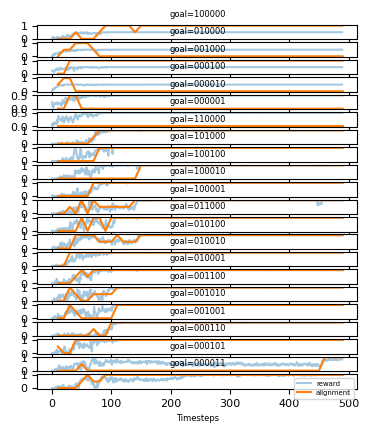

In [8]:
#accepted_goals=["000011", "001001","000110", "000001"]
accepted_goals = ["000011"]*21
labels_to_print = {
                  "naming_game_30msg_alpha10_temp30": "GC-game"}
params = {'legend.fontsize': 5,
          "axes.titlesize":6,
          "axes.labelsize":6,
                  "figure.autolayout": True,
                  'font.size': 8,
                  'pdf.fonttype':42,
                  'ps.fonttype':42}
plt.rcParams.update(params)

cm = 1 / 2.54  # for converting inches to cm
fig_size = (10.48 * cm, 6 * cm) 
figs, axs = plt.subplots(len(accepted_goals),figsize=[fig_size[0], fig_size[1]*2], sharex=True)
counter=0
for gl in range(21):
    
    goal=""
    for b in goals[gl]:
        goal=goal+str(b)

    slice=490

    i = 1
    n_exp = len(results)

    


    for label, result in results[str(gl)].items():
        #if goal in accepted_goals:
        print(result.keys())


        #axs[counter].subplot(len(accepted_goals),1,gl+1)
        axs[counter].plot( result["train_reward"][:slice][0],alpha=0.4,label="reward")
        axs[counter].plot(np.arange(10,slice+10,10),list_align_big[gl][0][:slice//10], label="alignment")
        axs[counter].set_title("goal=" + goal)
        axs[counter].set_ylabel("")
        #axs[counter].set_grid()
        counter+=1
        




            



plt.legend()
plt.xlabel("Timesteps")



#plt.show()


# Uncomment this line for saving the plot
plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)
plt.savefig(os.path.join( "coev_indiv.pdf"), dpi=300, bbox_inches='tight', transparent=True)



In [ ]:
plt.figure(figsize=(6, 22))
for gl in range(21):
    
    goal=""
    for b in goals[gl]:
        goal=goal+str(b)

    slice=50

    i = 1
    n_exp = len(results)




    for label, result in results[str(gl)].items():
        print(result.keys())
        
        
        plt.subplot(21,1,gl+1)
        plt.plot( result["eval_reward"][:slice][0],alpha=0.4,label=label)
        plt.plot(np.arange(1,slice+1),list_align_big[gl][0][:slice])
        plt.title(goal)
if gl == 15:
    plt.legend()
    plt.grid()
    plt.xlabel("Timesteps")
    plt.ylabel("Rewards")
